In [7]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

- chrXII (451785, 457732)
- chrXII (460922, 466869)


# Loading all datasets

In [16]:
flank = 1000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]
data_files_polyA = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" in f and "bw" in f]

print(len(os.listdir(pathDir)))

print(len(data_files_3end))
print(len(data_files_polyA))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

df03a_RDN371_datasets_polyA = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_polyA, gtf=gtf,ranges=flank)
df03b_RDN372_datasets_polyA = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_polyA, gtf=gtf,ranges=flank)
df03_RDN37_polyA = df03a_RDN371_datasets_polyA.drop('nucleotide',axis='columns') + df03b_RDN372_datasets_polyA.drop('nucleotide',axis='columns')

/tmp/ipykernel_10593/3217474729.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
/tmp/ipykernel_10593/3217474729.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])
/home/tturowski/mambaforge/envs/processing/lib/python3.10/site-packages/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

1976
370
370


/home/tturowski/mambaforge/envs/processing/lib/python3.10/site-packages/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t1[name] = getSeqData(gene_name, data_path, name, gtf, ranges=ranges)
/home/tturowski/mambaforge/envs/processing/lib/python3.10/site-packages/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t1[name] = getSeqData(gene_name, data_path, name, gtf, ranges=ranges)
/home/tturowski/mambaforge/envs/processing/lib/python3.10/site-packages/trxtools/BigWig.py:62: Performance

# Rpa190

Experiments: 
['XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end']


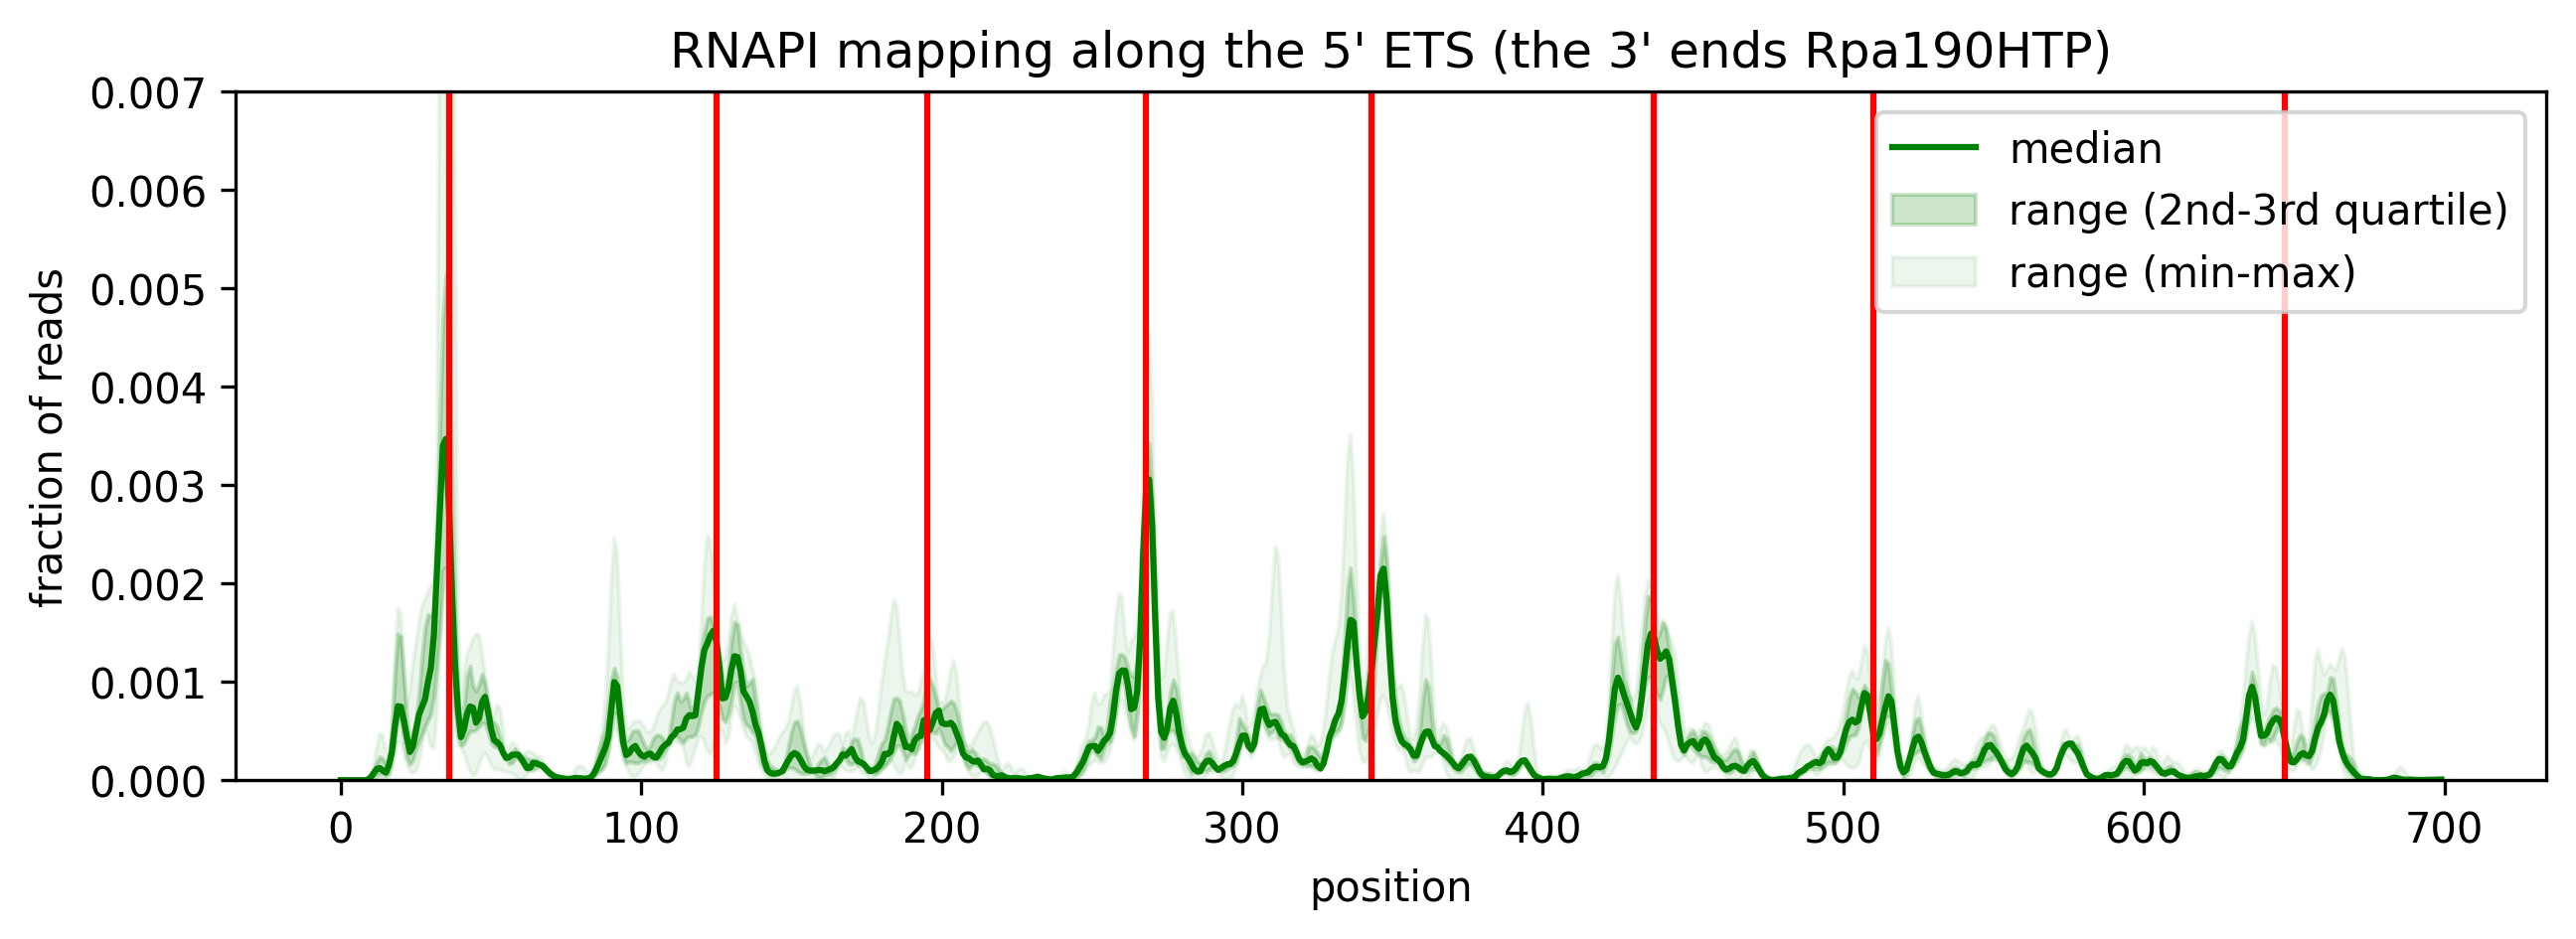

Experiments: 
['XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end']
Experiments: 
['XX000000_Rpa190HTP_wt_none_4_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_1_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end_polyA']
Experiments: 
['XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end']


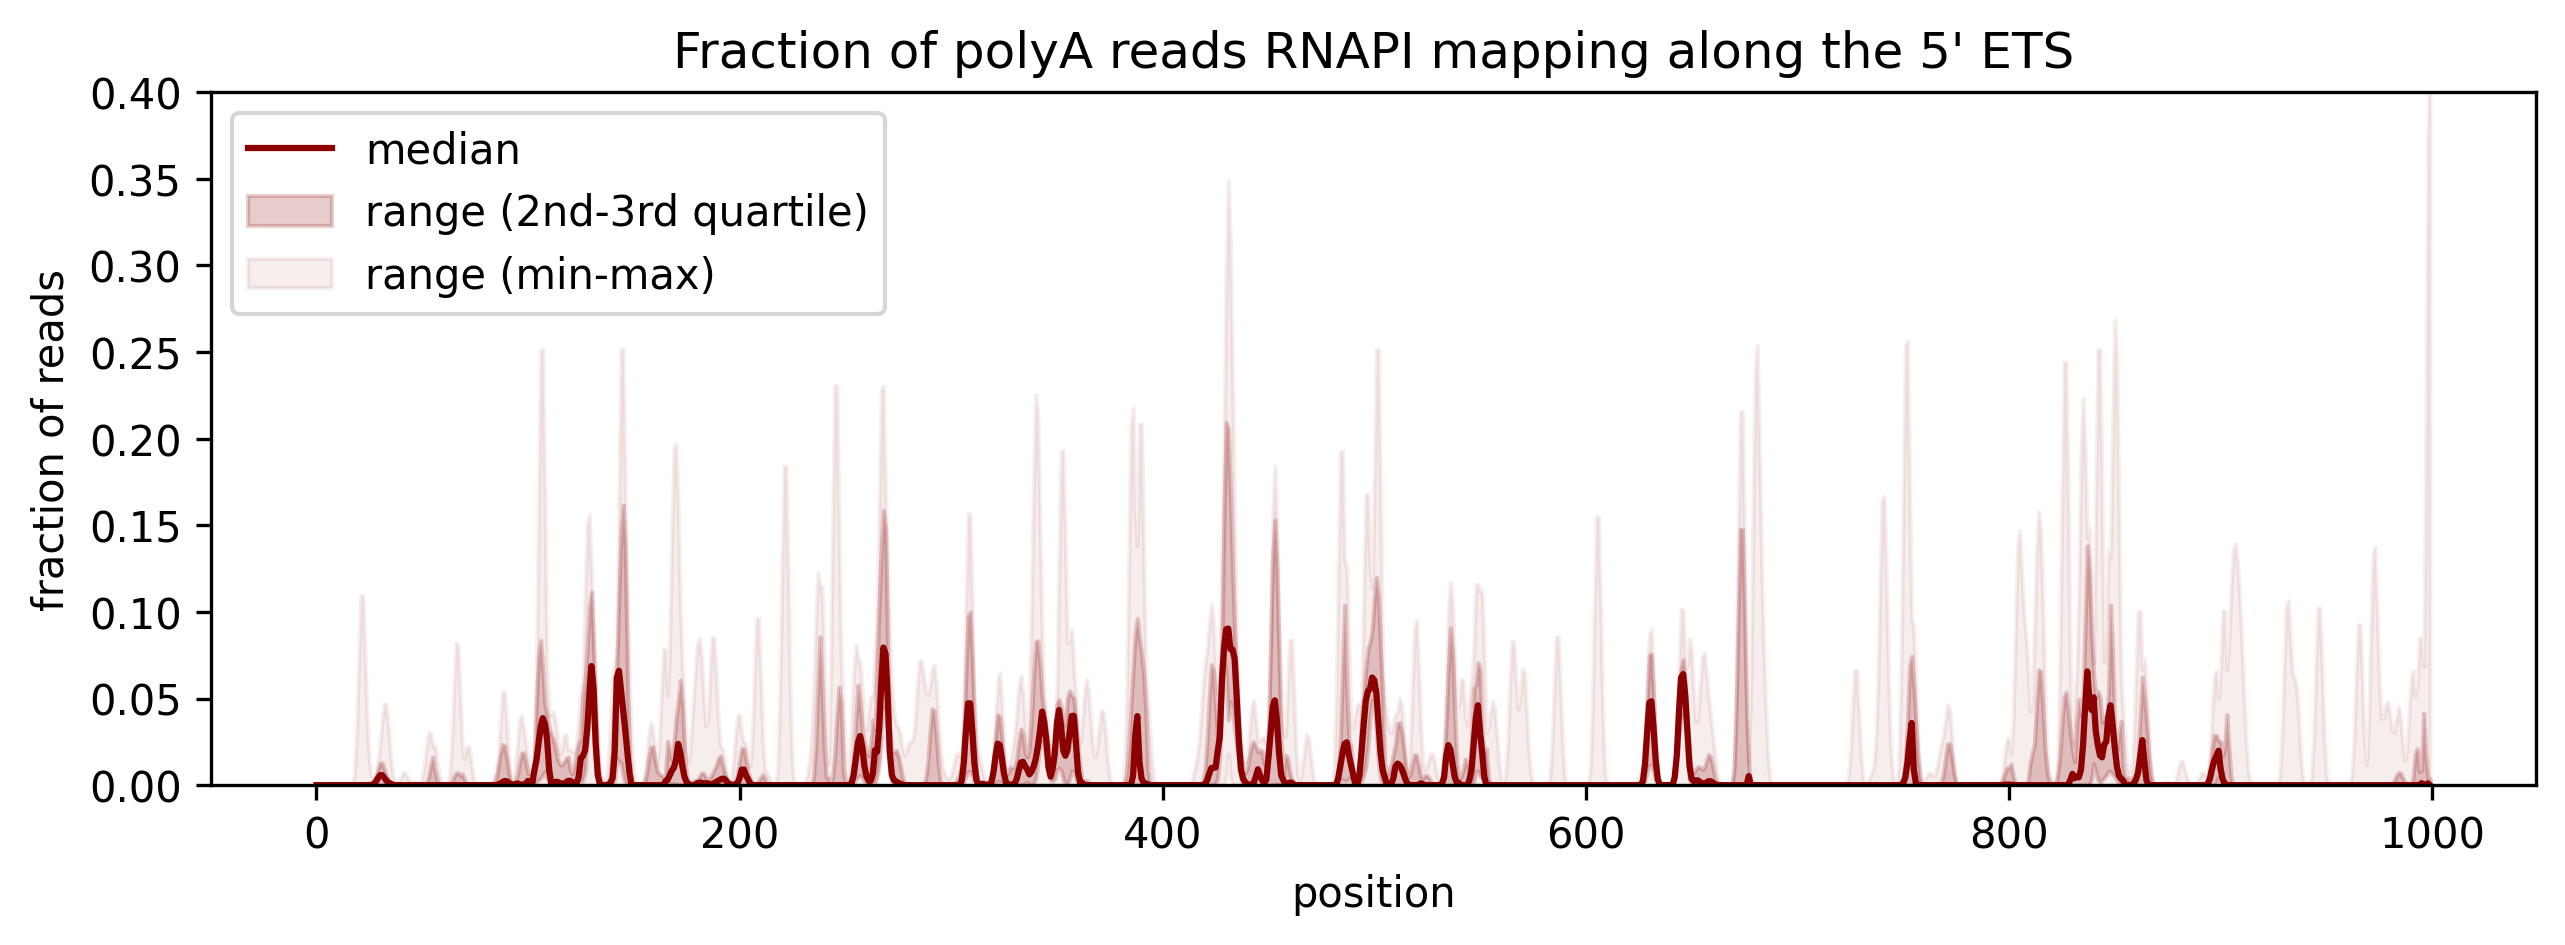

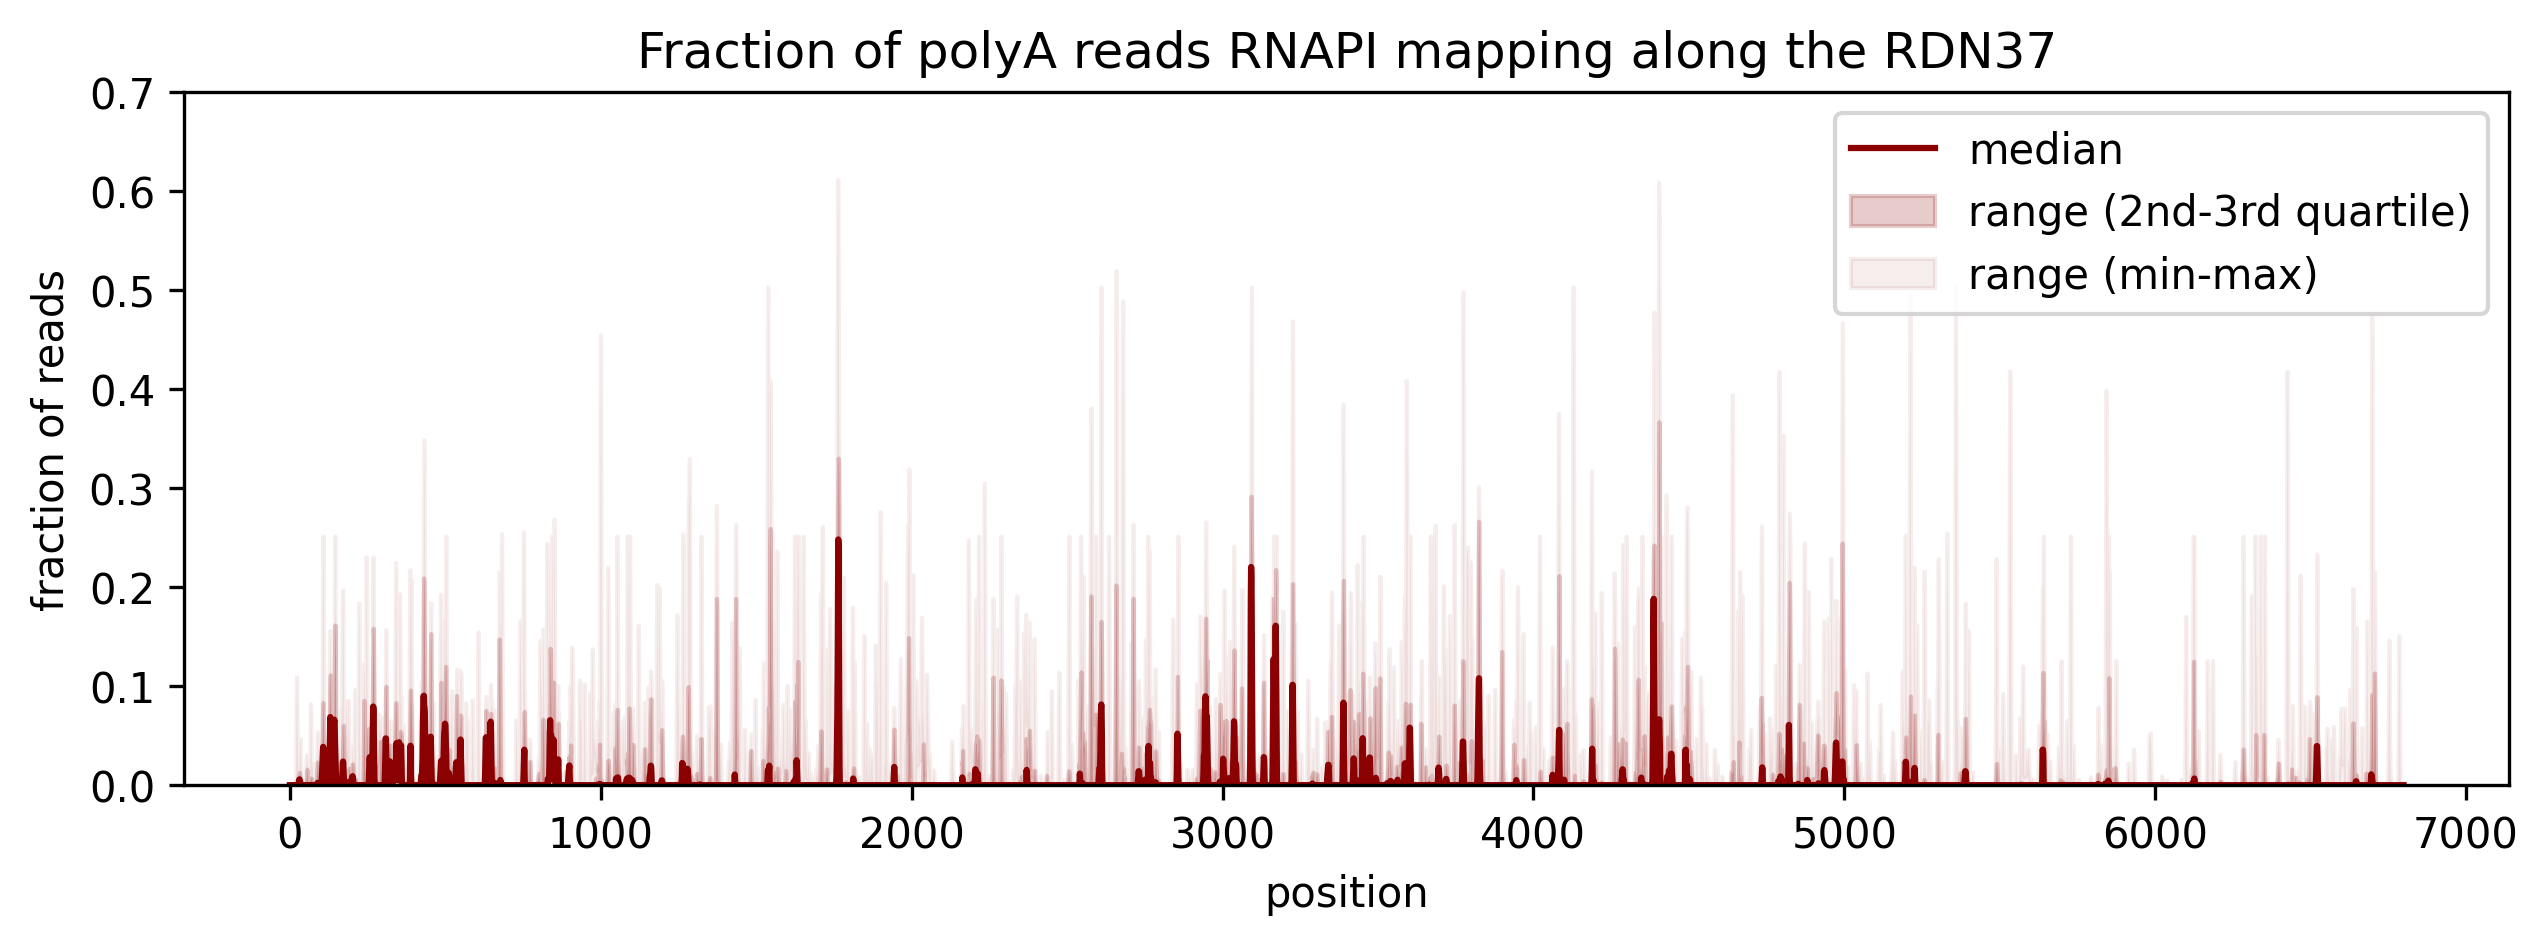

In [91]:

df11_Rpa190_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA',
                                              'Rnt1','rrp44','trf4','air1','rat1'],stats=True)

# PEAKS
peaks = tt.profiles.findPeaks(df11_Rpa190_3end['median'][:7200],order=45,window=80)
# print(peaks)

tt.plotting.plot_as_box_plot(df11_Rpa190_3end, title="RNAPI mapping along the 5' ETS (the 3' ends Rpa190HTP)",
                             dpi=300,ylim=(None,0.007), start=0+300, stop=700+300,figsize=(10,3),
                             h_lines=[i-300 for i in peaks],offset=300)

# peaks_old = [336, 425, 495, 568, 643, 737, 810, 947, 1094, 1169, 1372, 1502, 1561, 1724, 1827, 1902, 2049, 2123, 2249, 2347, 2500, 2598, 2686, 2789, 2908, 2977, 3074, 3258, 3339, 3472, 3640, 3795, 3903, 4018, 4103, 4282, 4363, 4497, 4578, 4650, 4769, 4910, 5041, 5102, 5157, 5237, 5416, 5686, 5752, 5873, 5938, 6107, 6224, 6323, 6495, 6594, 6697, 6796, 6910, 7027]
# print(peaks_old==peaks) #True


# polyA reads

df12_Rpa190_3end_raw = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA',
                                              'Rnt1','rrp44','trf4','air1','rat1'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df13_Rpa190_3end_polyA_raw = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA',
                                              'Rnt1','rrp44','trf4','air1','rat1'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df13_Rpa190_3end_polyA_raw.columns = [i.replace("_polyA","") for i in df13_Rpa190_3end_polyA_raw.columns]

df14_Rpa190_fractionPolyA = df13_Rpa190_3end_polyA_raw / df12_Rpa190_3end_raw

df14_Rpa190_polyA = tt.profiles.preprocess(df14_Rpa190_fractionPolyA.fillna(0.0),let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA',
                                              'Rnt1','rrp44','trf4','air1','rat1'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df14_Rpa190_polyA, title="Fraction of polyA reads RNAPI mapping along the 5' ETS",
                             dpi=300,ylim=(None,0.4), start=0+300, stop=1000+300,color='darkred',figsize=(10,3),
                             offset=300)

tt.plotting.plot_as_box_plot(df14_Rpa190_polyA, title="Fraction of polyA reads RNAPI mapping along the RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300)

# Rpa135

In [121]:
df01_RDN37_3end.filter(like='Rpa135HTP_wt').sum().sort_values(ascending=False)

LP221214_Rpa135HTP_wt_none_2_PROFILE_3end          1403190.0
EP190925_Rpa135HTP_wt_none_3_PROFILE_3end          1349628.0
LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end          827972.0
LP230405_Rpa135HTP_wt_none_1_PROFILE_3end           633998.0
LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end          484729.0
C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end     404819.0
C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end     369317.0
EP240614_Rpa135HTP_wt_none_1_PROFILE_3end           151149.0
seq3-EP240614_Rpa135HTP_wt_none_1_PROFILE_3end      102537.0
EP190925_Rpa135HTP_wt_noUV_none_1_PROFILE_3end       79490.0
dtype: float64

Experiments: 
['LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end', 'seq3-EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end']


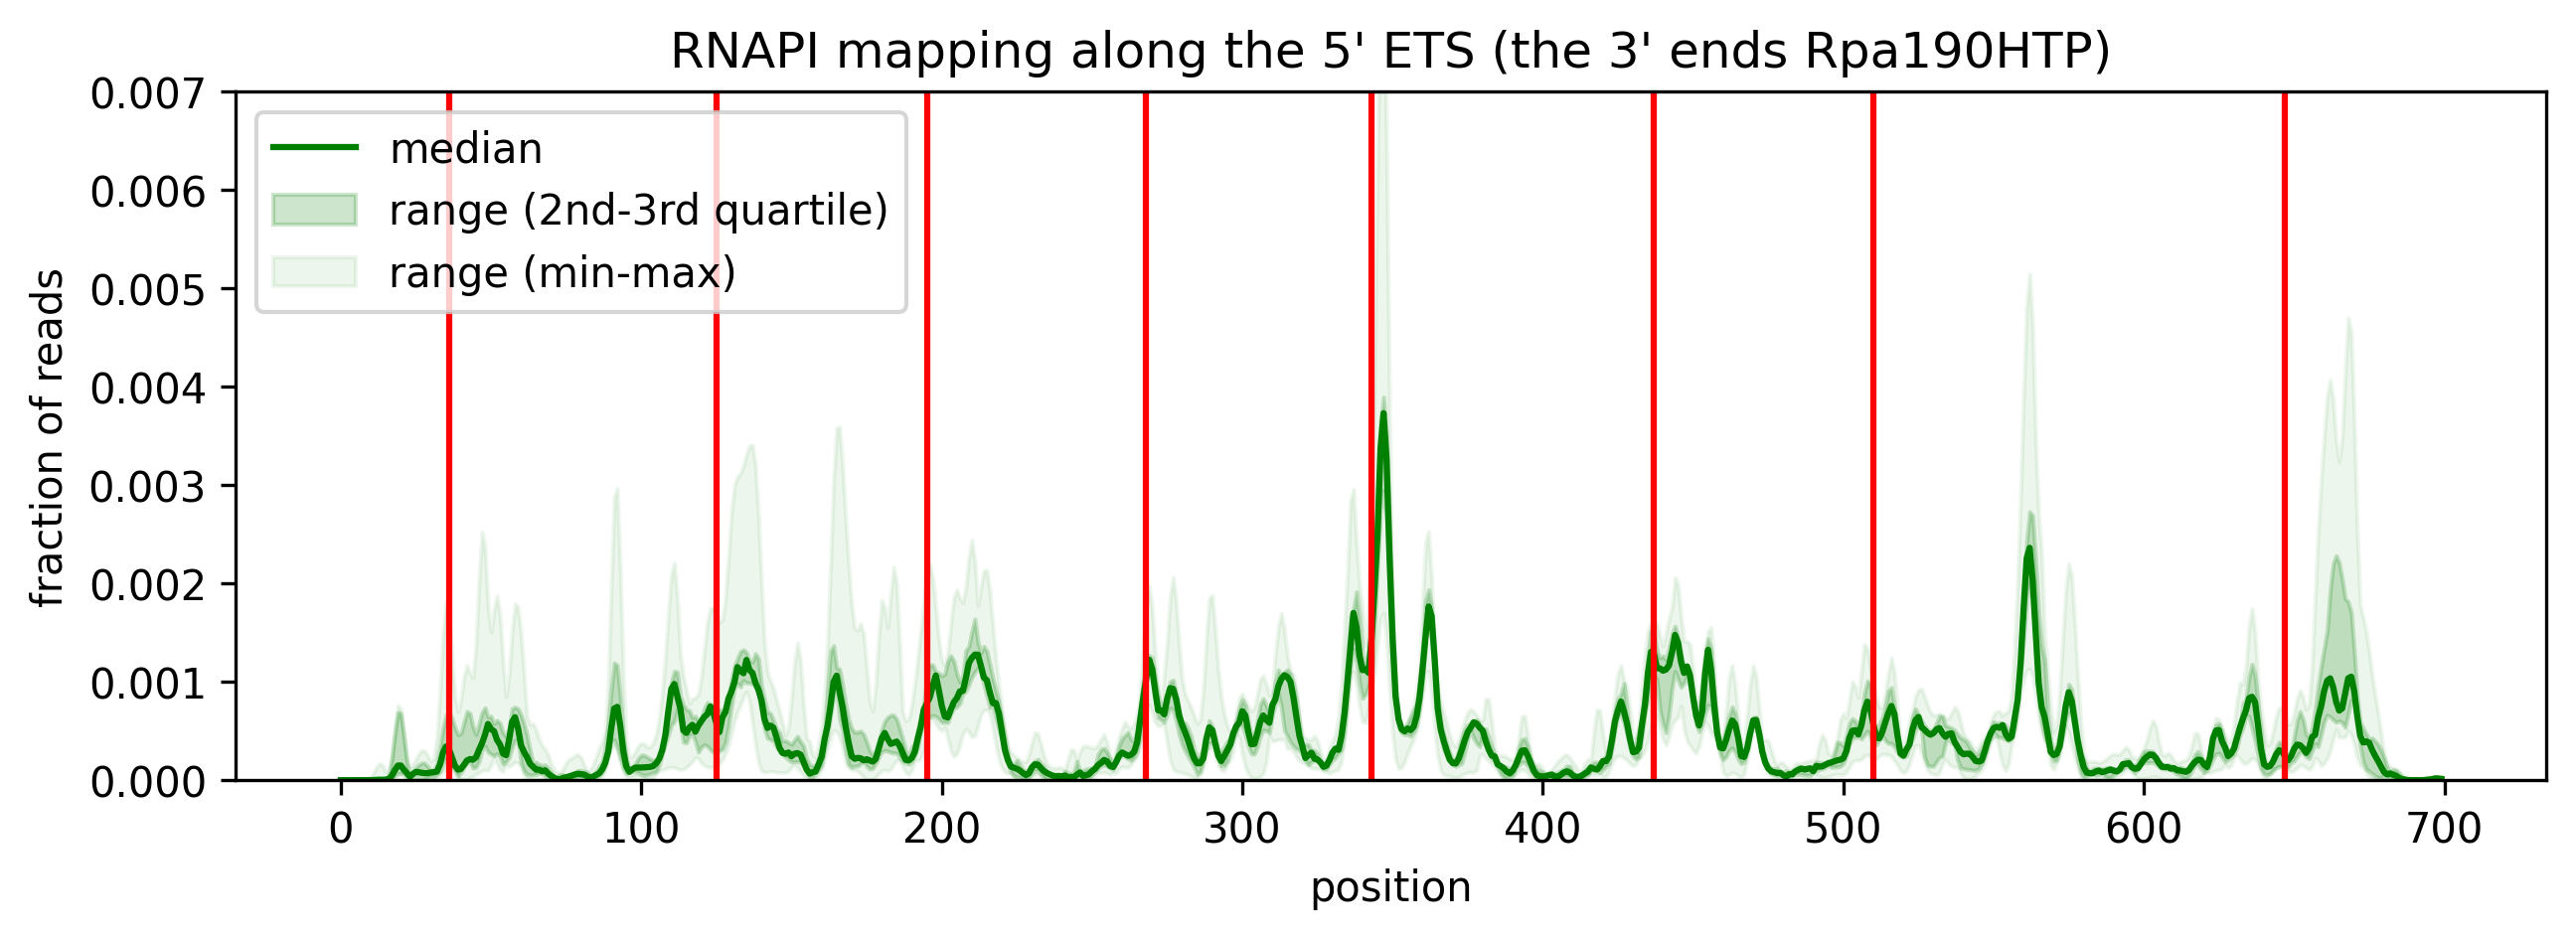

Experiments: 
['LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end', 'seq3-EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end_polyA', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end_polyA', 'seq3-EP240614_Rpa135HTP_wt_none_1_PROFILE_3end_polyA', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end_polyA', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end_polyA', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end_polyA', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end_polyA', 'EP240614_Rpa135HTP_wt_none_1_PROFILE_3end_polyA', 'LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end_polyA']
Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'C

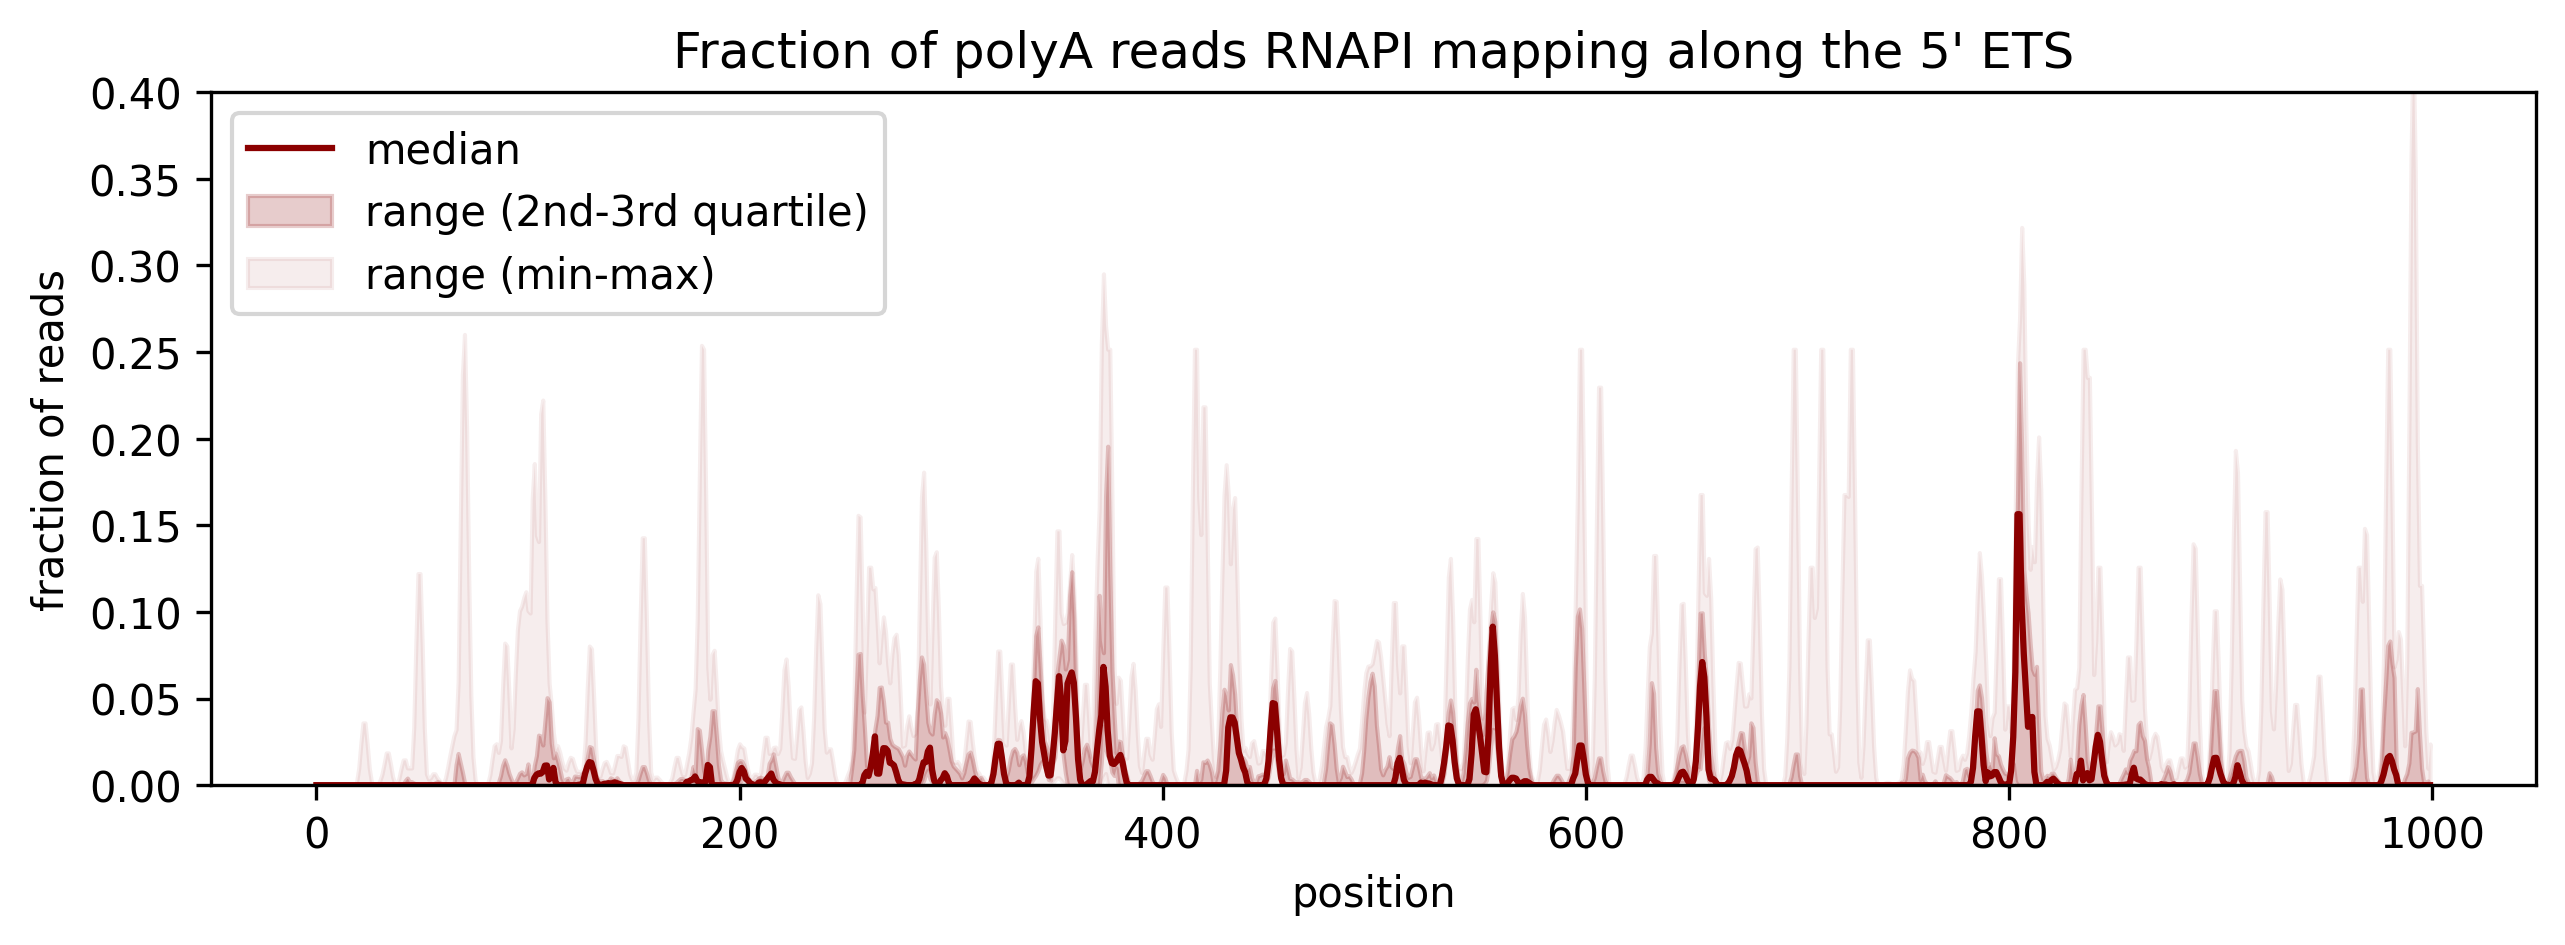

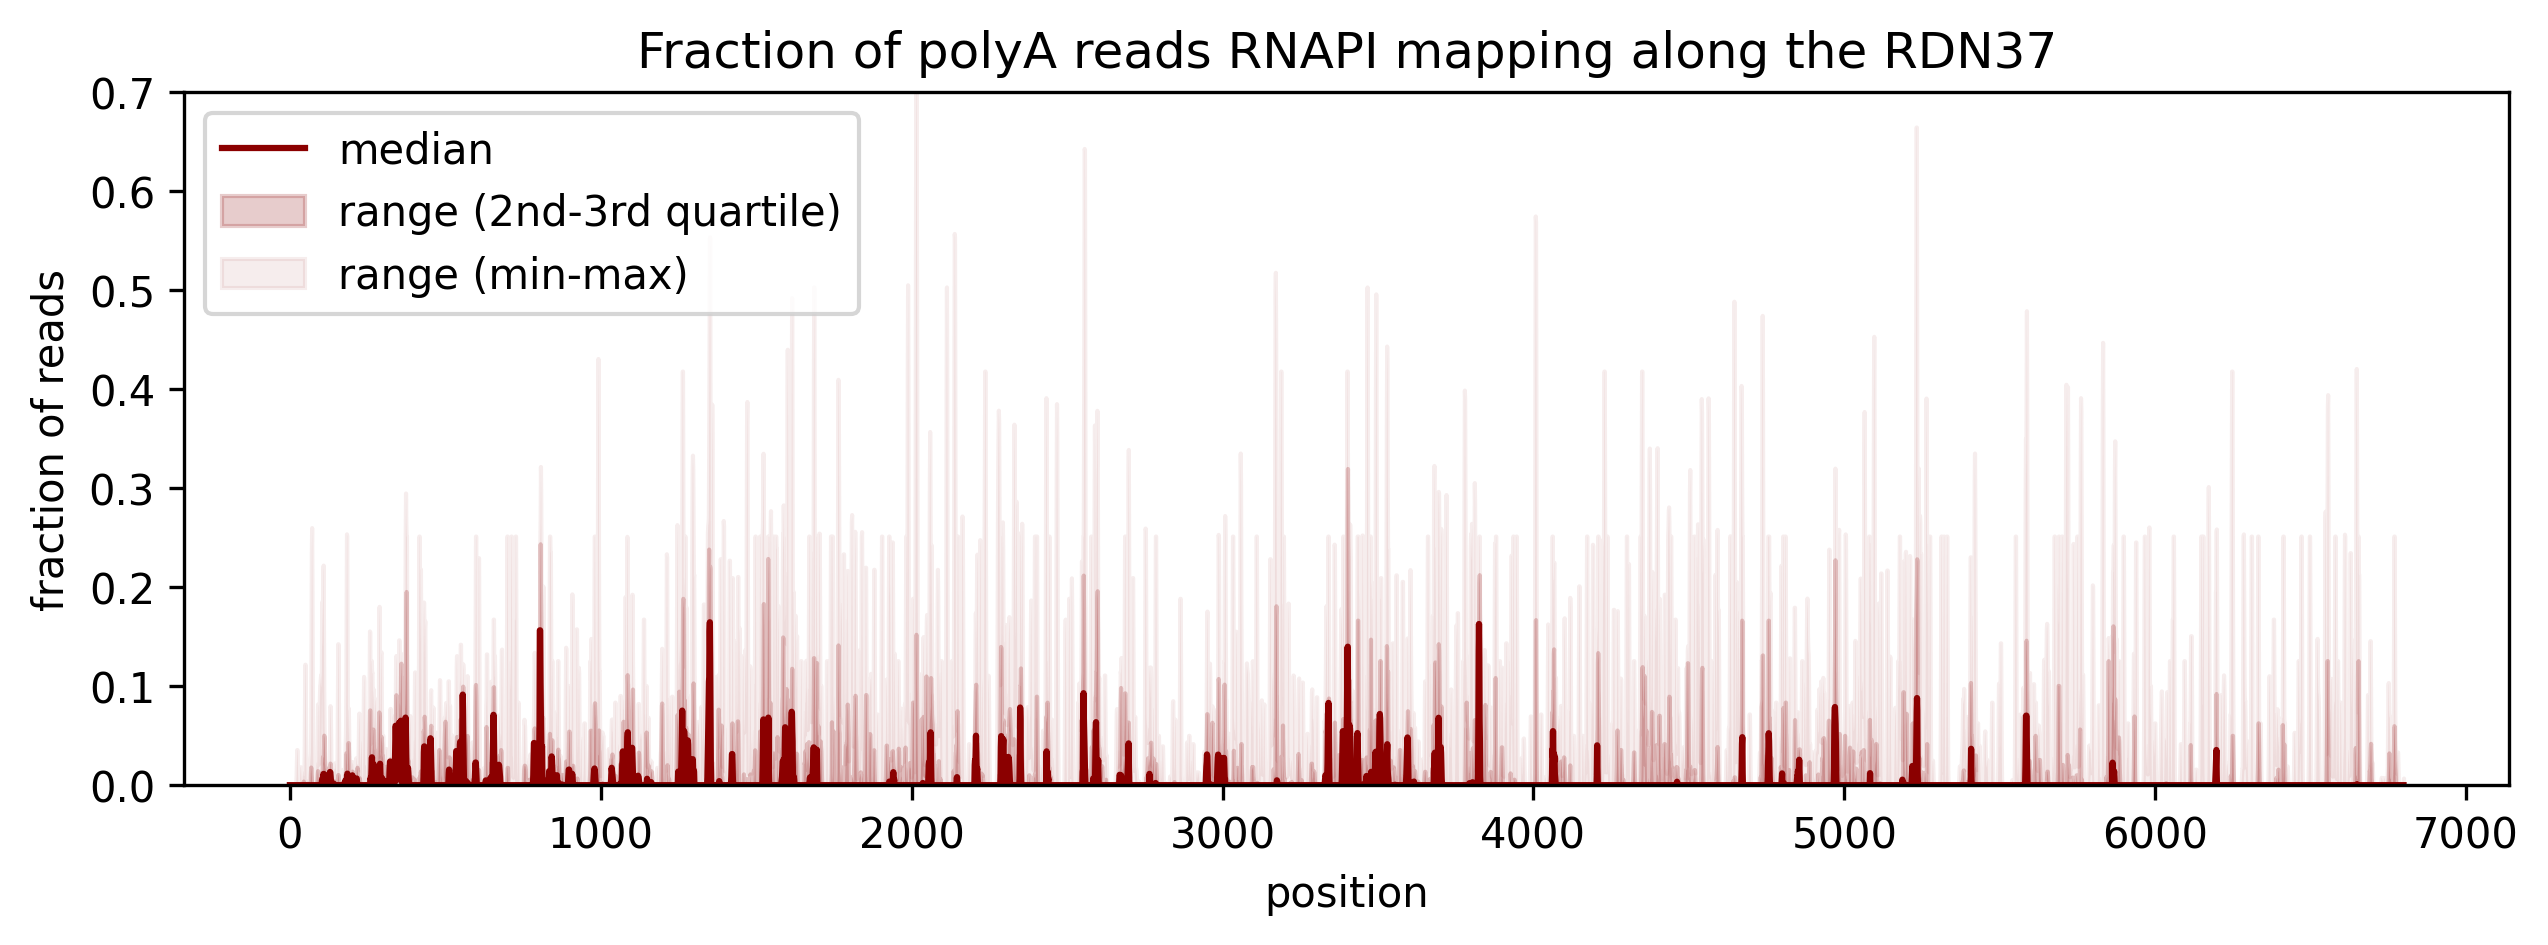

In [124]:
df15_Rpa135_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa135HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA','noUV',
                                              'Rnt1','rrp44','trf4','air1','rat1','Rpa12dC','nsi1d'],stats=True)

tt.plotting.plot_as_box_plot(df15_Rpa135_3end, title="RNAPI mapping along the 5' ETS (the 3' ends Rpa190HTP)",
                             dpi=300,ylim=(None,0.007), start=0+300, stop=700+300,figsize=(10,3),
                             h_lines=[i-300 for i in peaks],offset=300)

# polyA reads

df16_Rpa135_3end_raw = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa135HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA','noUV',
                                              'Rnt1','rrp44','trf4','air1','rat1','Rpa12dC','nsi1d'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df17_Rpa135_3end_polyA_raw = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa135HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA','noUV',
                                              'Rnt1','rrp44','trf4','air1','rat1','Rpa12dC','nsi1d'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df17_Rpa135_3end_polyA_raw.columns = [i.replace("_polyA","") for i in df17_Rpa135_3end_polyA_raw.columns]

df18_Rpa190_fractionPolyA = df17_Rpa135_3end_polyA_raw / df16_Rpa135_3end_raw

df19_Rpa135_polyA = tt.profiles.preprocess(df18_Rpa190_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA','noUV',
                                              'Rnt1','rrp44','trf4','air1','rat1','Rpa12dC','nsi1d'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df19_Rpa135_polyA, title="Fraction of polyA reads RNAPI mapping along the 5' ETS",
                             dpi=300,ylim=(None,0.4), start=0+300, stop=1000+300,color='darkred',figsize=(10,3),
                             offset=300)

tt.plotting.plot_as_box_plot(df19_Rpa135_polyA, title="Fraction of polyA reads RNAPI mapping along the RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300)

# Rnt1-AID

In [34]:
df01_RDN37_3end.filter(like='Rnt1').sum().sort_values(ascending=False)

EP240606_Rpa190HTP_Rnt1-AID_4h_2_PROFILE_3end         222959.0
seq2-EP240606_Rpa190HTP_Rnt1-AID_4h_2_PROFILE_3end    214054.0
seq4-EP240606_Rpa190HTP_Rnt1-AID_4h_2_PROFILE_3end    201422.0
EP240313_Rpa190HTP_Rnt1-AID_4h_1_PROFILE_3end          12873.0
EP240313_Rpa190HTP_Rnt1-AID_2h_1_PROFILE_3end           9814.0
EP240614_Rpa135HTP_Rnt1-AID_4h_3_PROFILE_3end           8250.0
seq3-EP240614_Rpa135HTP_Rnt1-AID_4h_3_PROFILE_3end      8058.0
EP240614_Rpa135HTP_Rnt1-AID_0h_4_PROFILE_3end           7067.0
EP240313_Rpa190HTP_Rnt1-AID_0h_1_PROFILE_3end           6730.0
seq3-EP240614_Rpa135HTP_Rnt1-AID_0h_4_PROFILE_3end      6570.0
seq3-EP240614_Rpa135HTP_Rnt1-AID_0h_3_PROFILE_3end      6370.0
seq3-EP240614_Rpa135HTP_Rnt1-AID_4h_4_PROFILE_3end      4702.0
EP240614_Rpa135HTP_Rnt1-AID_0h_3_PROFILE_3end           4648.0
EP240614_Rpa135HTP_Rnt1-AID_4h_4_PROFILE_3end           2971.0
seq4-EP240606_Rpa190HTP_Rnt1-AID_0h_2_PROFILE_3end      1988.0
EP240606_Rpa190HTP_Rnt1-AID_0h_2_PROFILE_3end          

Experiments: 
['EP240313_Rpa190HTP_Rnt1-AID_0h_1_PROFILE_3end']
Experiments: 
['EP240313_Rpa190HTP_Rnt1-AID_4h_1_PROFILE_3end']


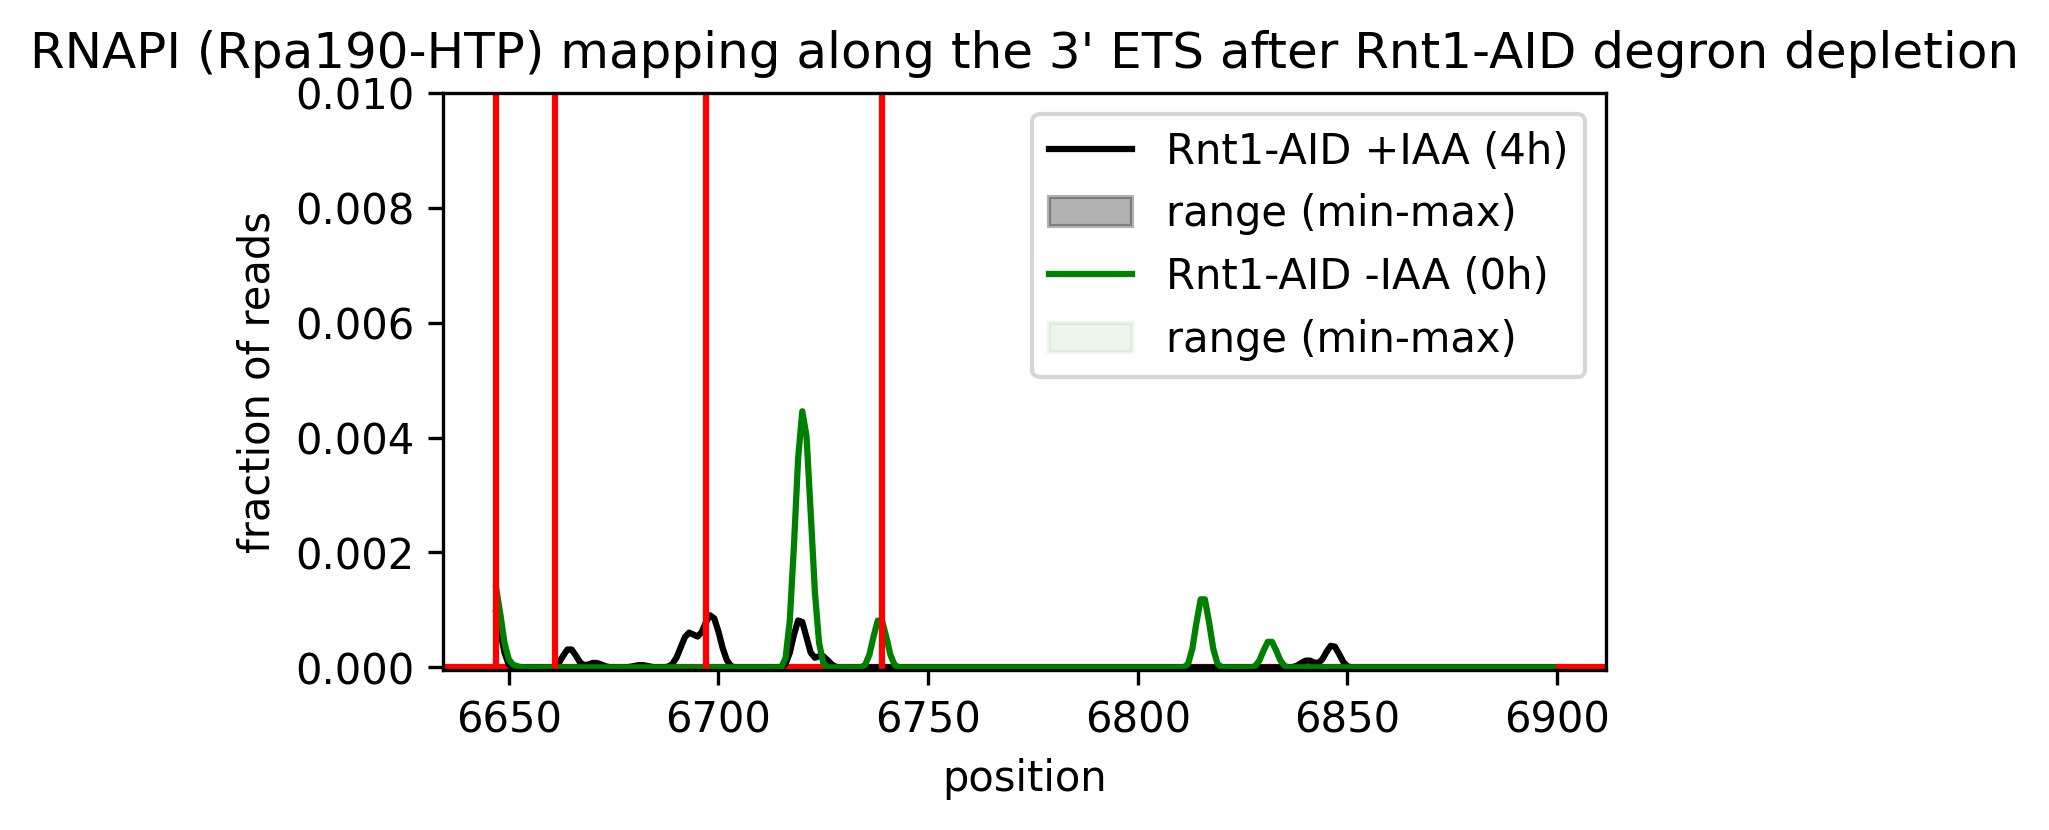

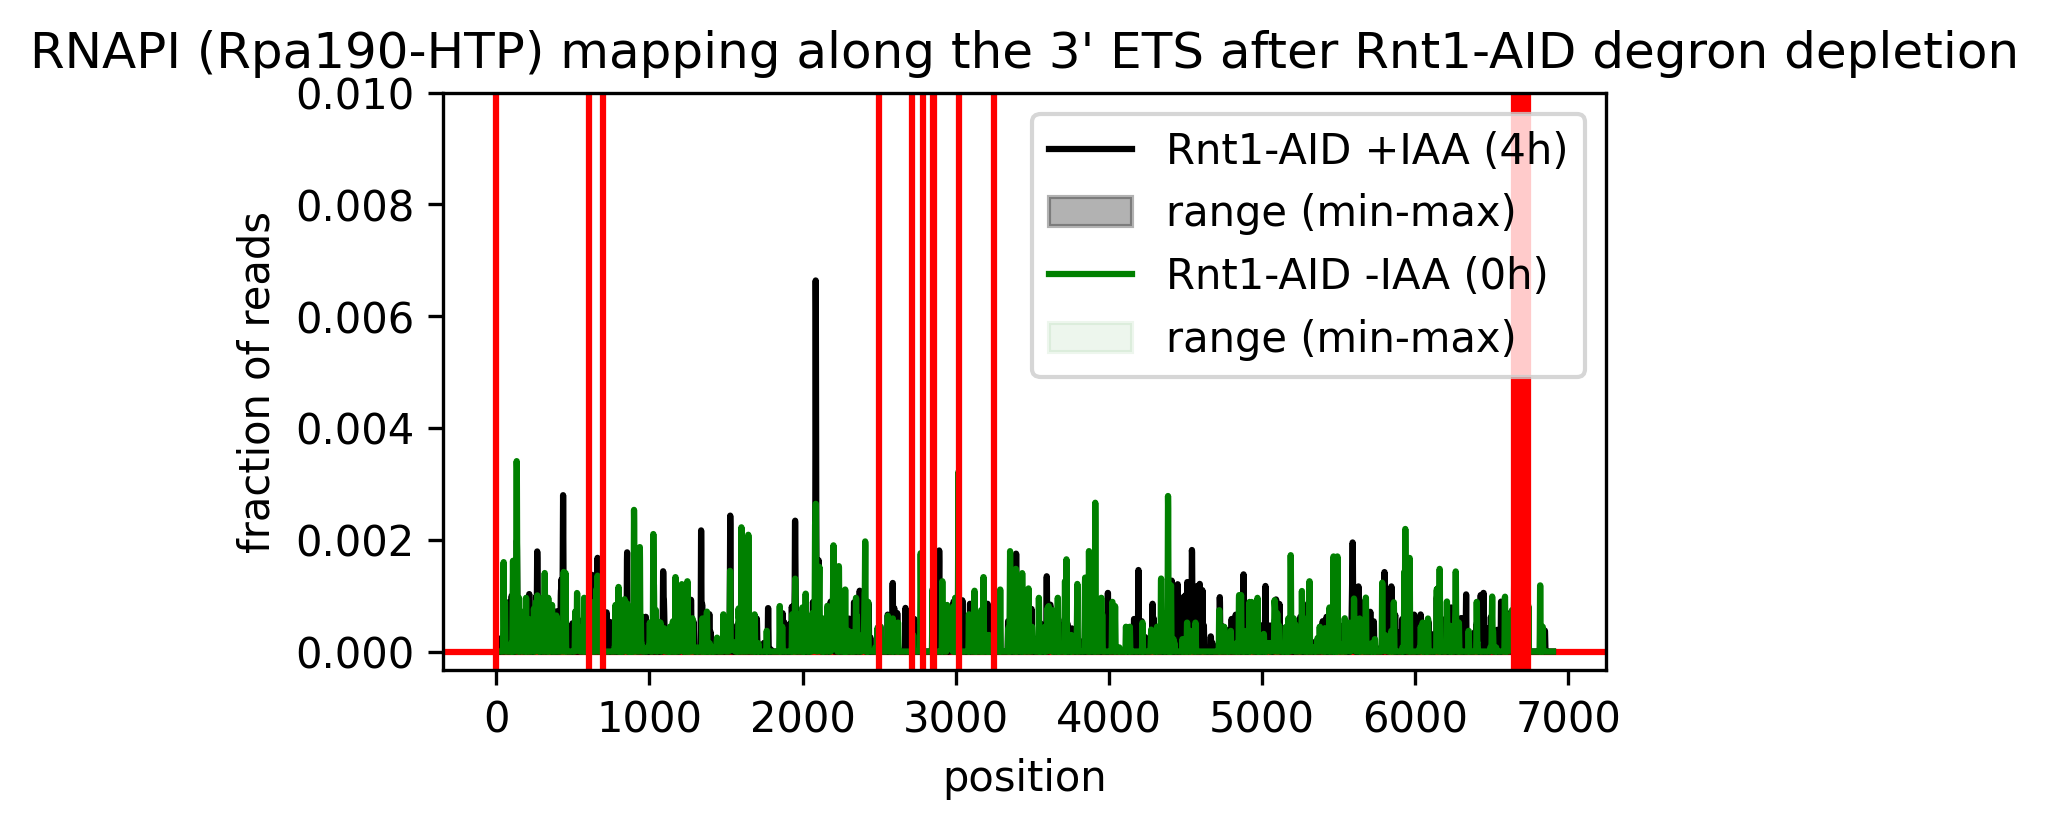

In [63]:
#only March data
df21_Rpa190_3end_Rnt1AID_0h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','Rnt1-AID_0h'], 
                                     let_out=['EP240606'],stats=True)

df22_Rpa190_3end_Rnt1AID_4h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','Rnt1-AID_4h'], 
                                     let_out=['EP240606'],stats=True)

tt.plotting.plot_to_compare(ref=df21_Rpa190_3end_Rnt1AID_0h, df=df22_Rpa190_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa190-HTP) mapping along the 3' ETS after Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=6647+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1A-3ETS.png')

tt.plotting.plot_to_compare(ref=df21_Rpa190_3end_Rnt1AID_0h, df=df22_Rpa190_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa190-HTP) mapping along the 3' ETS after Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1A-RDN37.png')

Experiments: 
['seq4-EP240606_Rpa190HTP_Rnt1-AID_0h_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_Rnt1-AID_0h_2_PROFILE_3end', 'EP240606_Rpa190HTP_Rnt1-AID_0h_2_PROFILE_3end']
Experiments: 
['seq4-EP240606_Rpa190HTP_Rnt1-AID_4h_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_Rnt1-AID_4h_2_PROFILE_3end', 'EP240606_Rpa190HTP_Rnt1-AID_4h_2_PROFILE_3end']


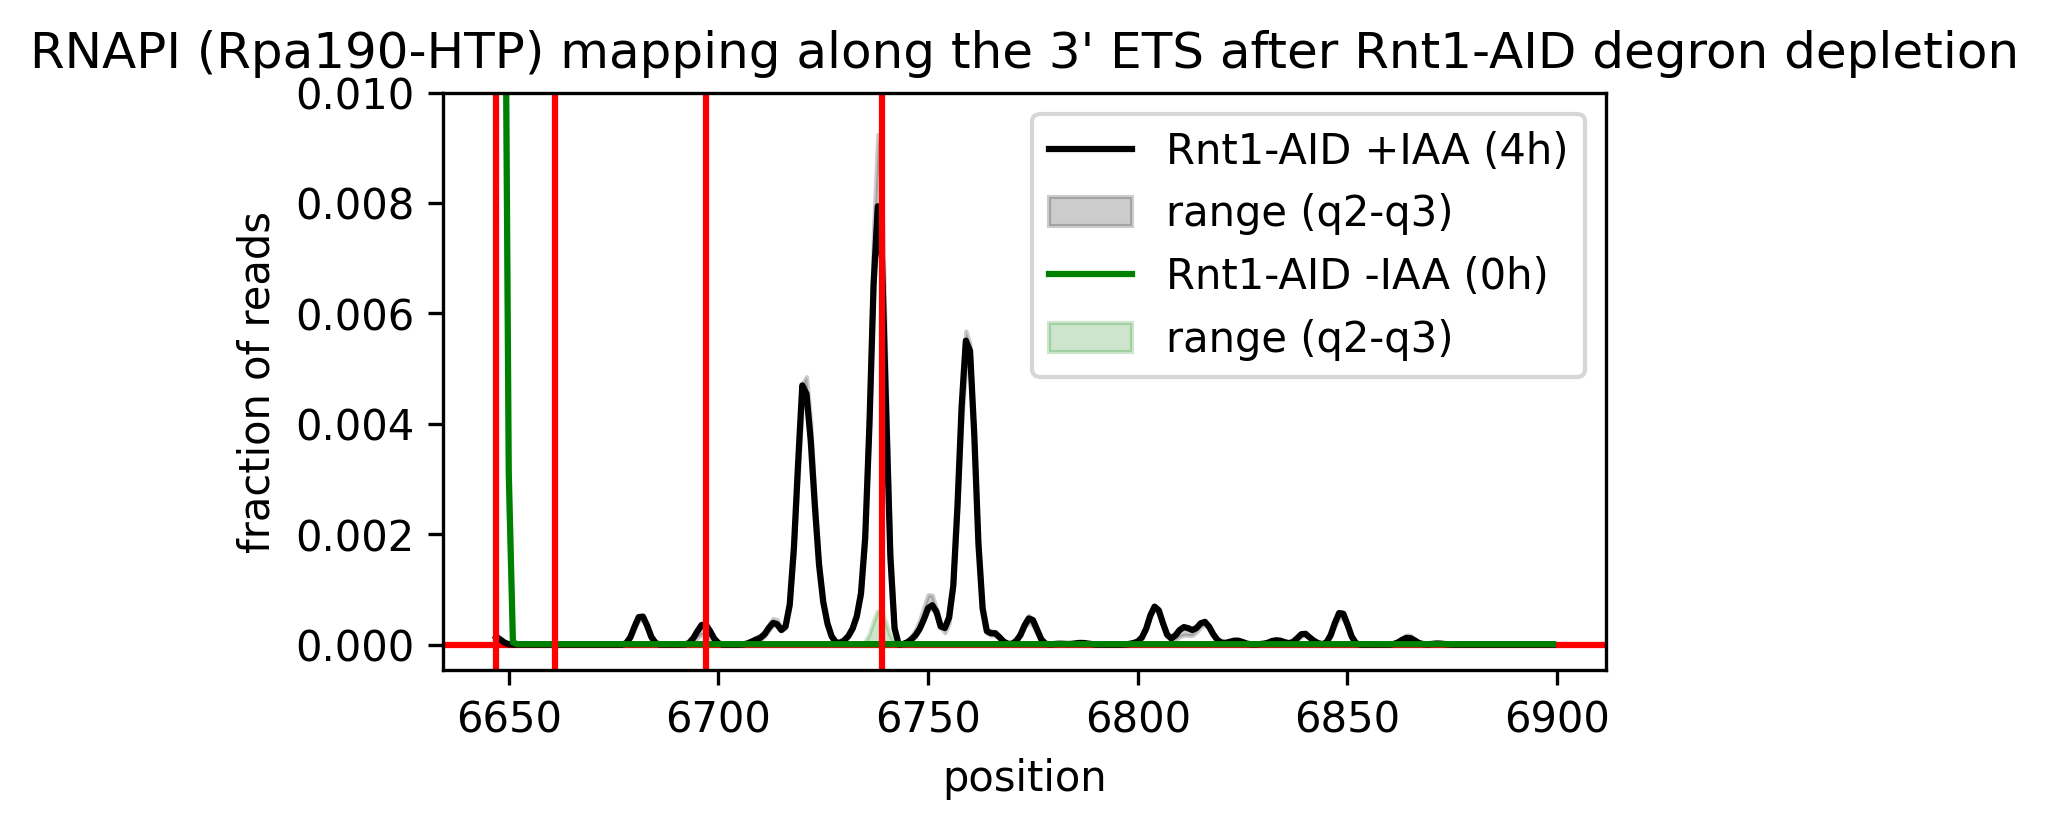

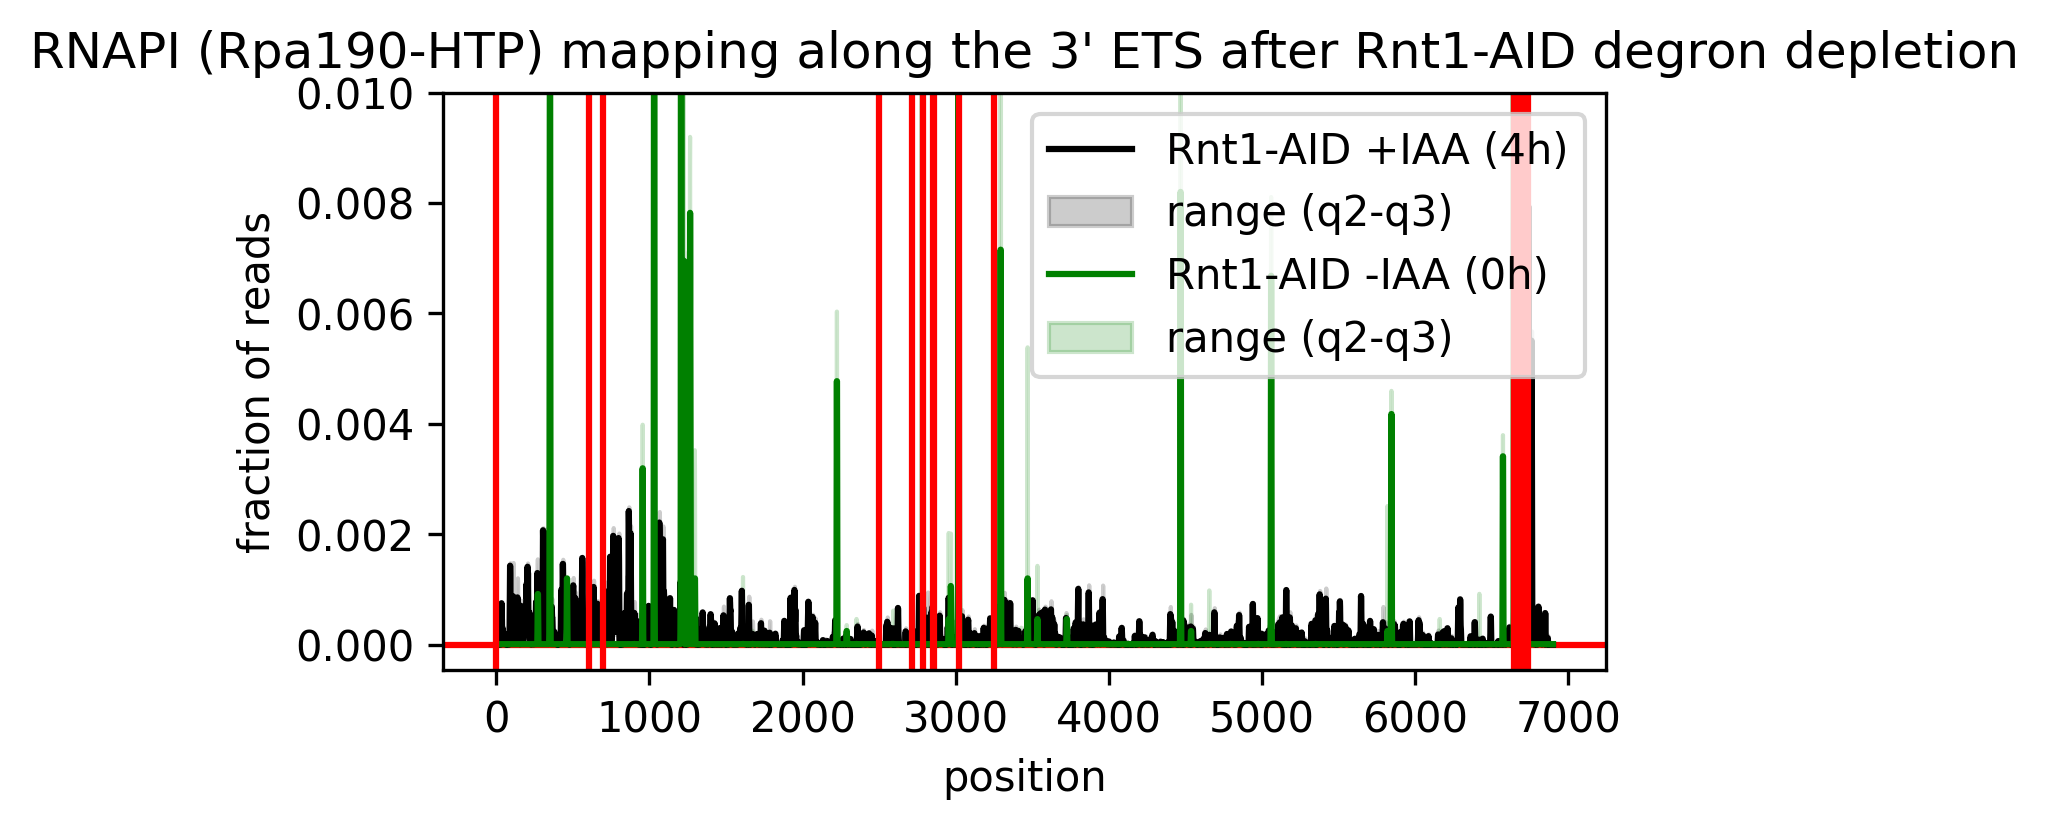

In [62]:
# it does not seem to work, specially 0h time point

df21_Rpa190_3end_Rnt1AID_0h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','Rnt1-AID_0h'], 
                                     let_out=['EP240313'],stats=True)

df22_Rpa190_3end_Rnt1AID_4h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','Rnt1-AID_4h'], 
                                     let_out=['EP240313'],stats=True)

tt.plotting.plot_to_compare(ref=df21_Rpa190_3end_Rnt1AID_0h, df=df22_Rpa190_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa190-HTP) mapping along the 3' ETS after Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=6647+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1A-3ETS-Jun.png')

tt.plotting.plot_to_compare(ref=df21_Rpa190_3end_Rnt1AID_0h, df=df22_Rpa190_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa190-HTP) mapping along the 3' ETS after Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1A-RDN37-Jun.png')

Experiments: 
['seq3-EP240614_Rpa135HTP_Rnt1-AID_0h_3_PROFILE_3end', 'EP240614_Rpa135HTP_Rnt1-AID_0h_4_PROFILE_3end', 'EP240614_Rpa135HTP_Rnt1-AID_0h_3_PROFILE_3end', 'seq3-EP240614_Rpa135HTP_Rnt1-AID_0h_4_PROFILE_3end']
Experiments: 
['seq3-EP240614_Rpa135HTP_Rnt1-AID_4h_3_PROFILE_3end', 'seq3-EP240614_Rpa135HTP_Rnt1-AID_4h_4_PROFILE_3end', 'EP240614_Rpa135HTP_Rnt1-AID_4h_3_PROFILE_3end', 'EP240614_Rpa135HTP_Rnt1-AID_4h_4_PROFILE_3end']


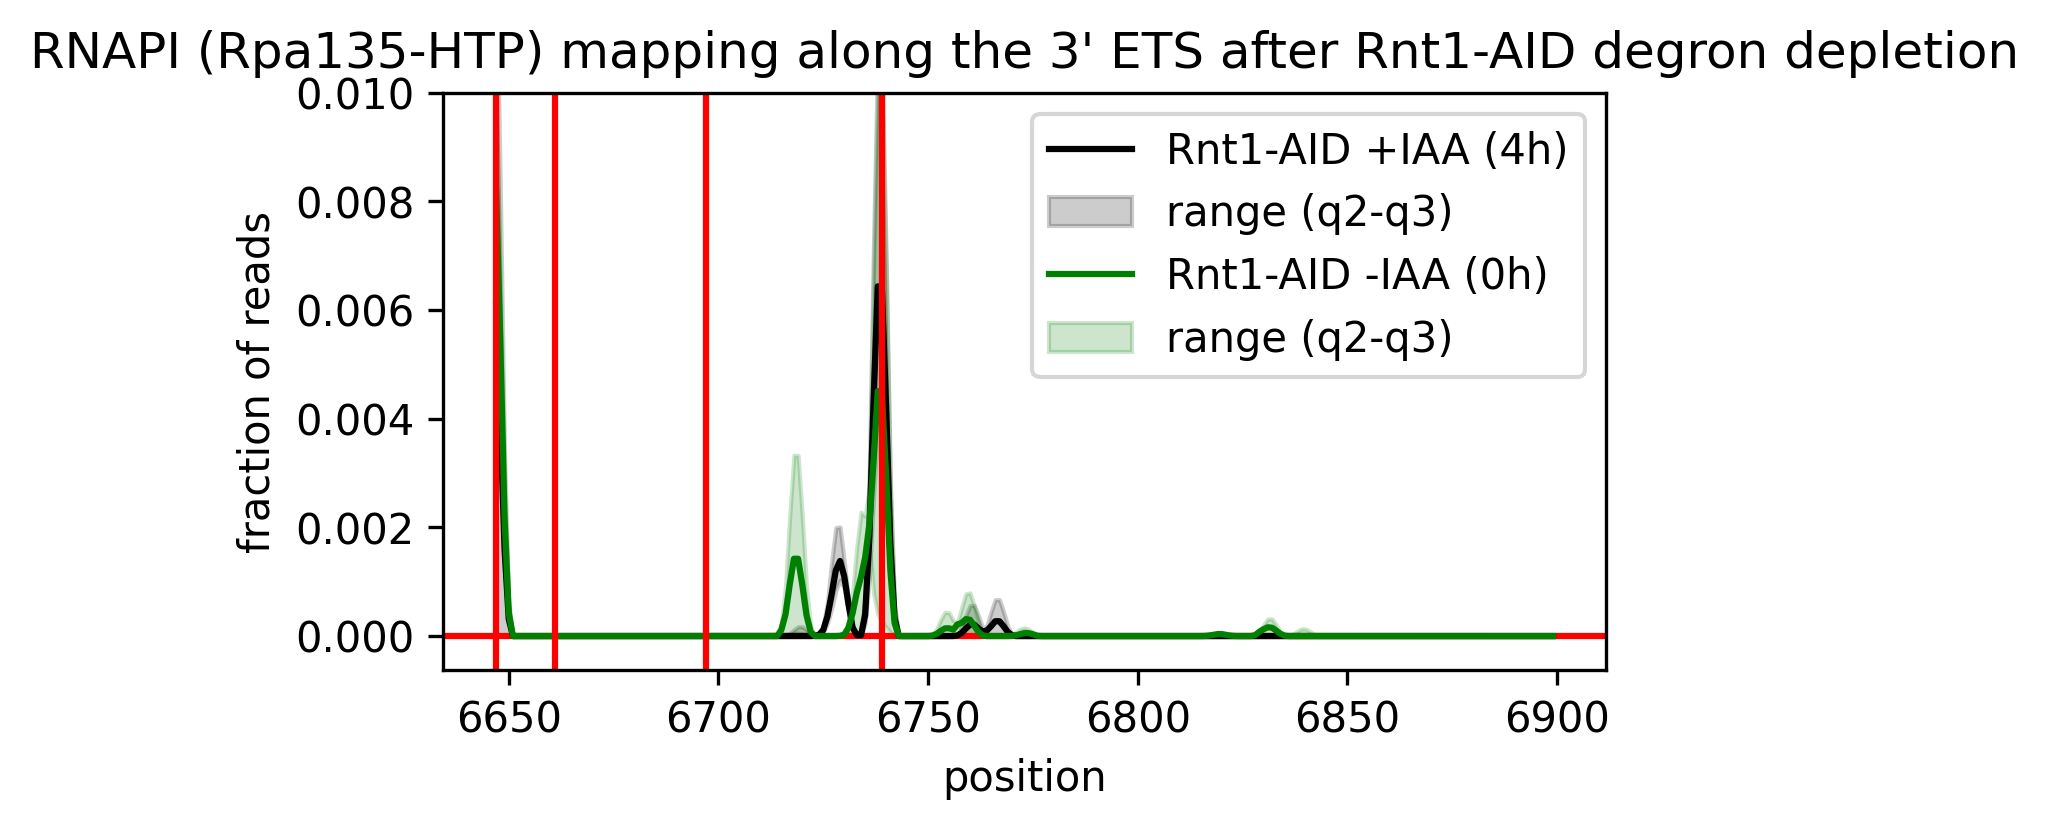

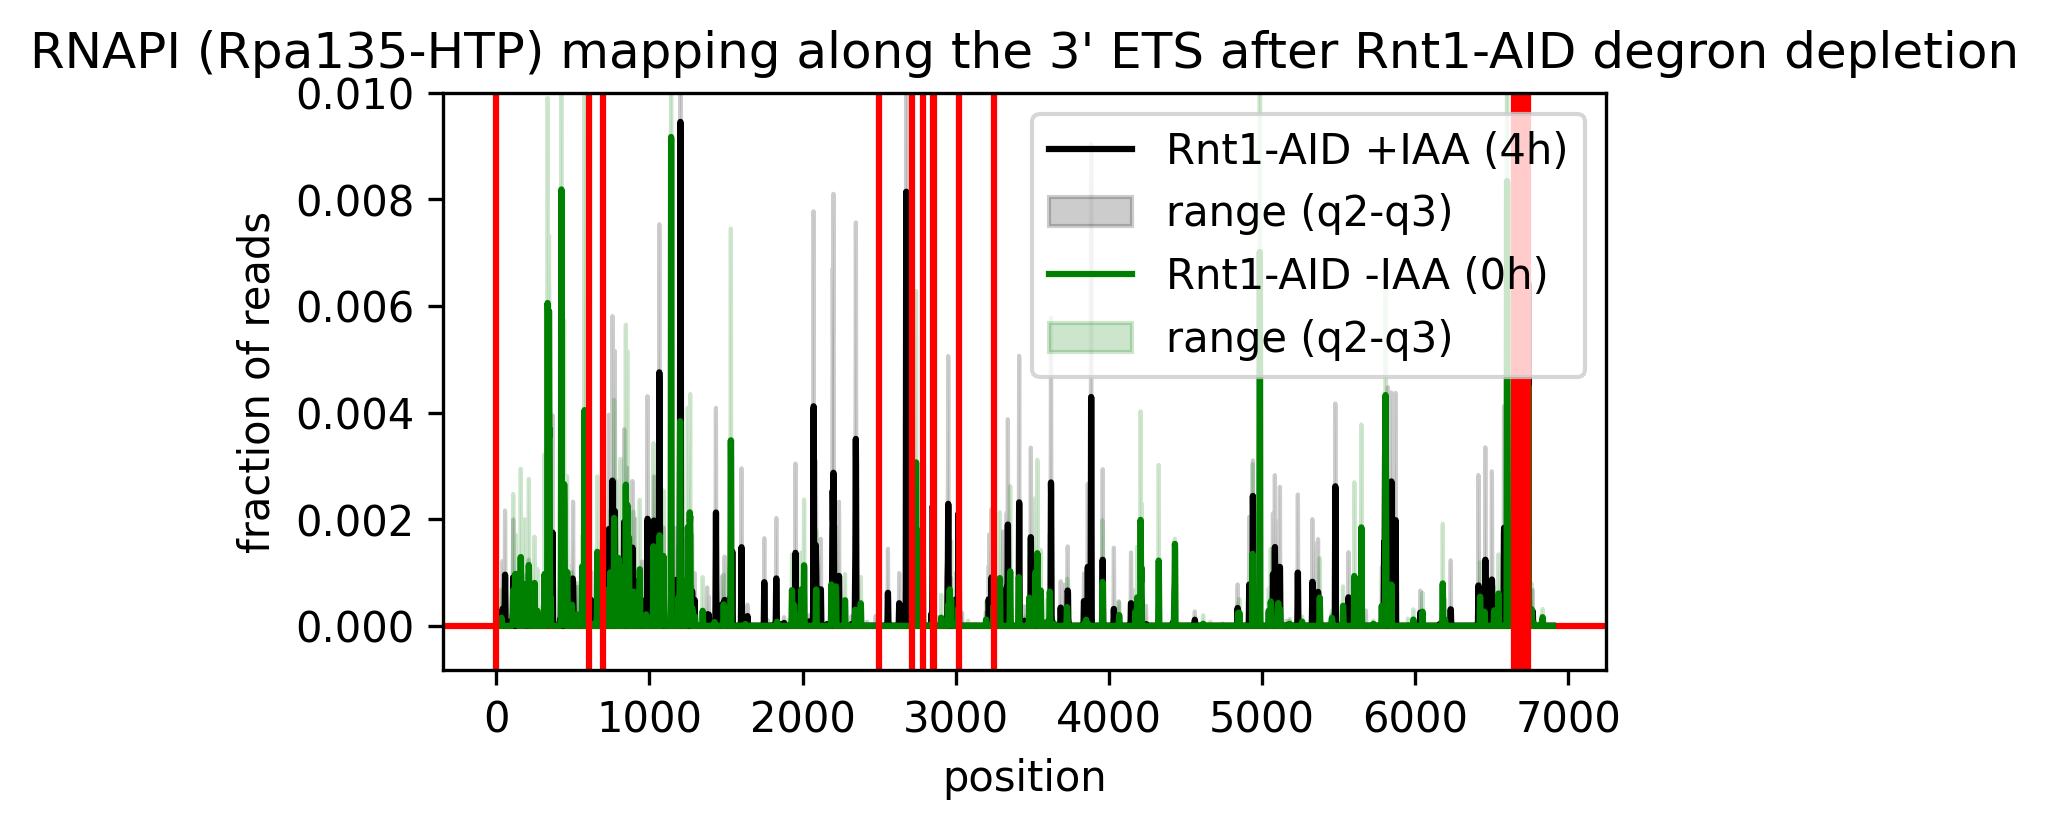

In [75]:
df23_Rpa135_3end_Rnt1AID_0h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa135HTP','Rnt1-AID_0h'], 
                                     let_out=[],stats=True)

df24_Rpa135_3end_Rnt1AID_4h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa135HTP','Rnt1-AID_4h'], 
                                     let_out=[],stats=True)

tt.plotting.plot_to_compare(ref=df23_Rpa135_3end_Rnt1AID_0h, df=df24_Rpa135_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa135-HTP) mapping along the 3' ETS after Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=6647+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1B-3ETS.png')

tt.plotting.plot_to_compare(ref=df23_Rpa135_3end_Rnt1AID_0h, df=df24_Rpa135_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa135-HTP) mapping along the 3' ETS after Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1B-RDN37.png')

# trf4ts-trf5d

In [77]:
df01_RDN37_3end.filter(like='trf4').sum().sort_values(ascending=False)

seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end    171427.0
seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end    167673.0
EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end         165924.0
seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end       153137.0
seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end       117492.0
EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end            114522.0
seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end     90849.0
EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end          72377.0
seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end     70509.0
EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end             31010.0
seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end        30503.0
seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end        29359.0
seq3-EP240614_Rpa190HTP_trf4ts-trf5∆_25C_3_PROFILE_3end          976.0
EP240614_Rpa190HTP_trf4ts-trf5∆_25C_3_PROFILE_3end               582.0
seq3-E

Experiments: 
['seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end']
Experiments: 
['seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end']


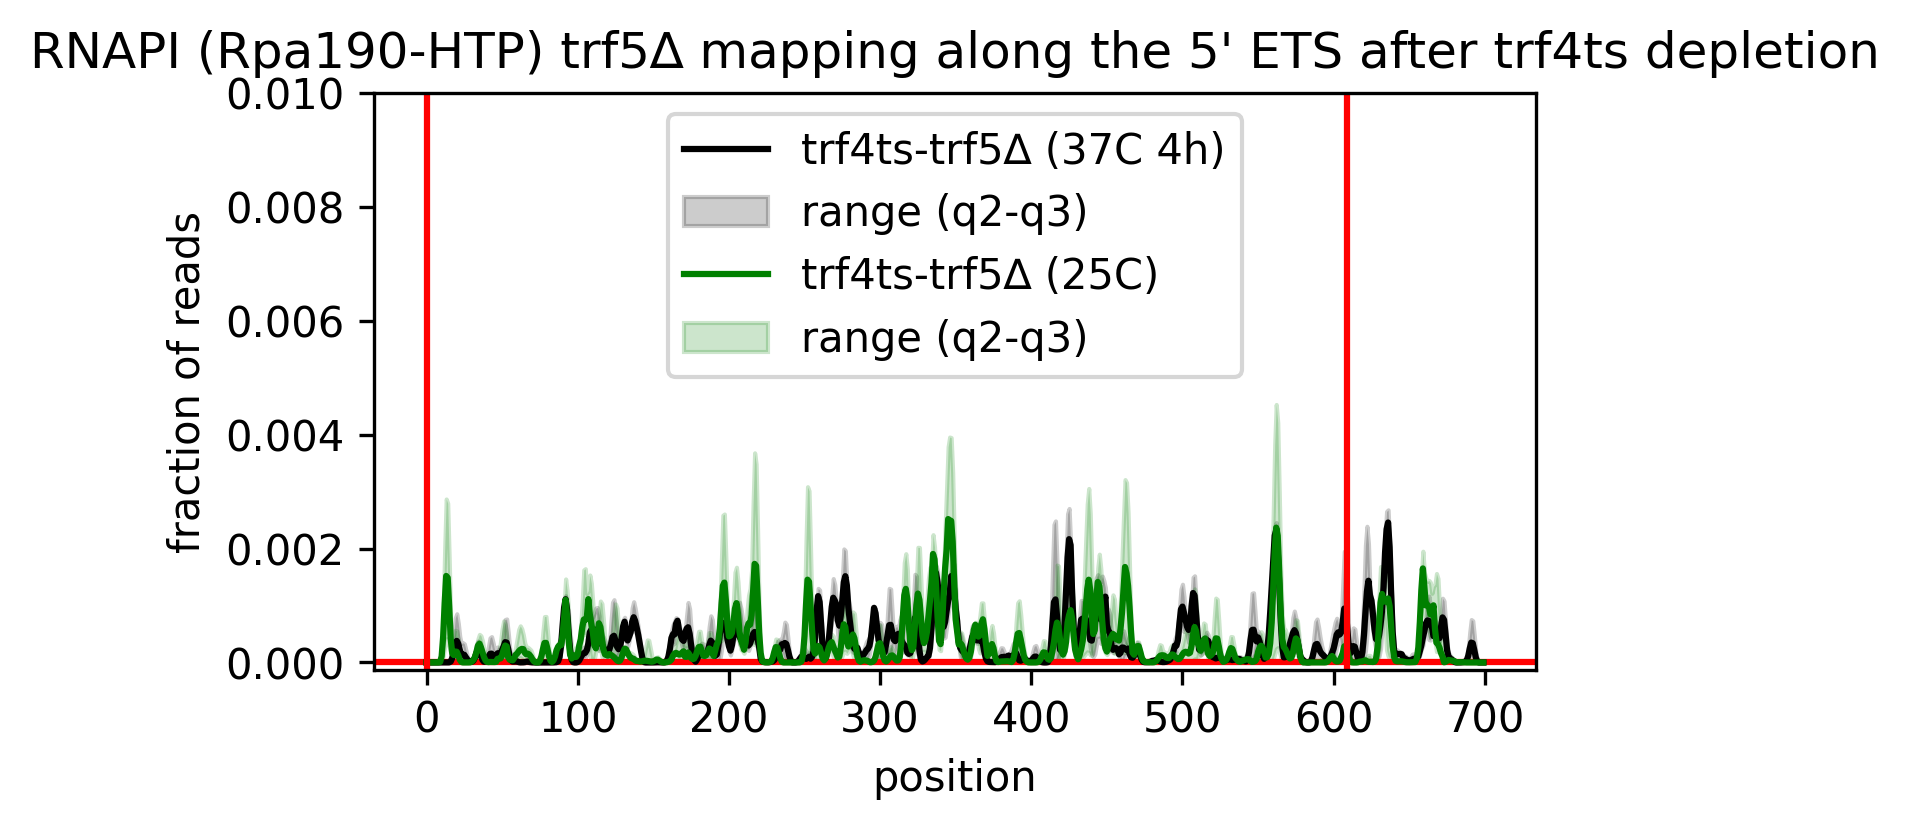

In [108]:
df31_Rpa190_3end_trf4ts_trf5d_0h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','trf4ts-trf5','25C','seq'], 
                                     let_out=['seq3'],stats=True)

df32_Rpa190_3end_trf4ts_trf5d_4h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','trf4ts-trf5','37C','seq'], 
                                     let_out=['seq3'],stats=True)

tt.plotting.plot_to_compare(ref=df31_Rpa190_3end_trf4ts_trf5d_0h, df=df32_Rpa190_3end_trf4ts_trf5d_4h,figsize=(5,2.5),ref_label="trf4ts-trf5∆ (25C)",label="trf4ts-trf5∆ (37C 4h)",
                           title="RNAPI (Rpa190-HTP) trf5∆ mapping along the 5' ETS after trf4ts depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=700+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R1B-3ETS.png')

# tt.plotting.plot_to_compare(ref=df31_Rpa190_3end_trf4ts_trf5d_0h, df=df32_Rpa190_3end_trf4ts_trf5d_4h,figsize=(5,2.5),ref_label="trf4ts-trf5∆ (25C)",label="trf4ts-trf5∆ (37C 4h)",
#                            title="RNAPI (Rpa190-HTP) trf5∆ mapping along the rRNA after trf4ts depletion",
#                            dpi=300,offset=300, ylim=(None,0.01),
#                            start=0+300, stop=6900+300,
#                            h_lines=[i-300 for i in cleavage_sites.values()],
#                            fname='Fig_R1B-RDN37.png')

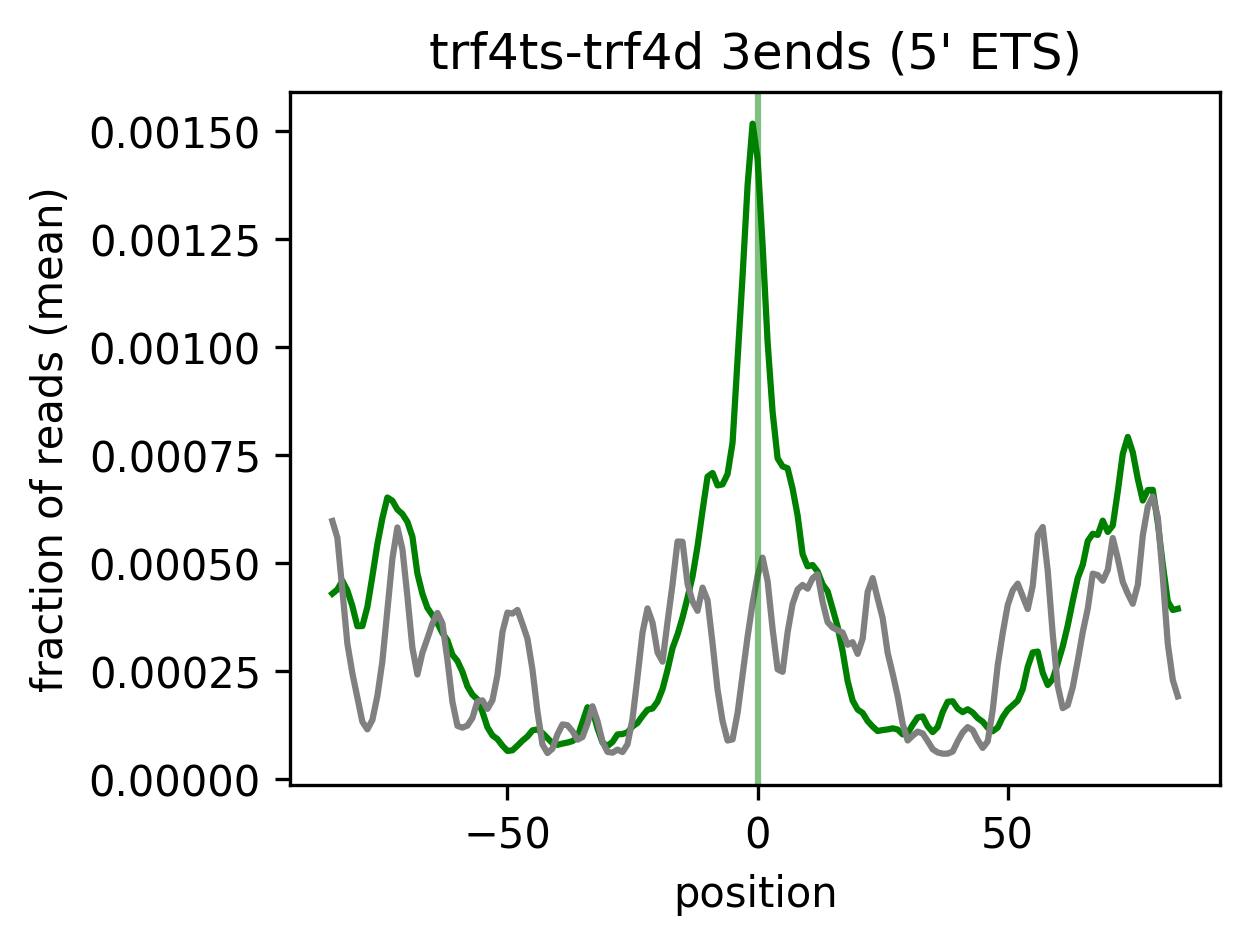

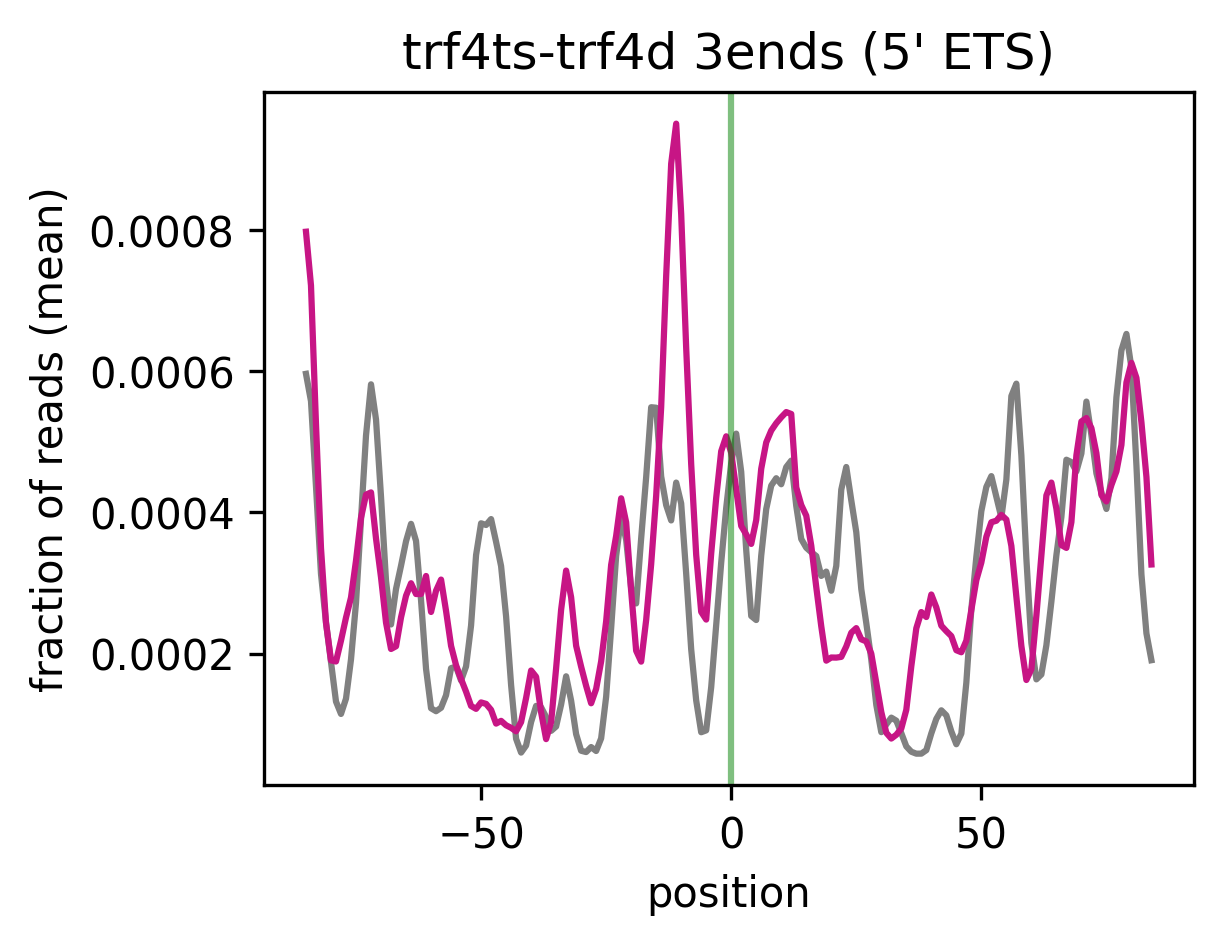

In [109]:
stop=1000
window = 85
elem=" (5' ETS)"

# tt.plotting.cumulativePeaks(df11_Rpa190_3end, df2=df31_Rpa190_3end_trf4ts_trf5d_0h, local_pos=[i for i in peaks if i != 643], dpi=300,
#                         title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
#                         color1='green', color2="grey", lc='green',fname="Fig_R2Amedian.png",use='median')

tt.plotting.cumulativePeaks(df11_Rpa190_3end, df2=df31_Rpa190_3end_trf4ts_trf5d_0h, local_pos=[i for i in peaks if i != 643], dpi=300,
                        title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
                        color1='green', color2="grey", lc='green',fname="Fig_R2Amean.png")

# tt.plotting.cumulativePeaks(df31_Rpa190_3end_trf4ts_trf5d_0h, df2=df32_Rpa190_3end_trf4ts_trf5d_4h, local_pos=[i for i in peaks if i != 643], dpi=300,
#                         title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
#                         color1='grey', color2="mediumvioletred", lc='green',fname="Fig_R2Bmedian.png",use='median')

tt.plotting.cumulativePeaks(df31_Rpa190_3end_trf4ts_trf5d_0h, df2=df32_Rpa190_3end_trf4ts_trf5d_4h, local_pos=[i for i in peaks if i != 643], dpi=300,
                        title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
                        color1='grey', color2="mediumvioletred", lc='green',fname="Fig_R2Bmean.png")

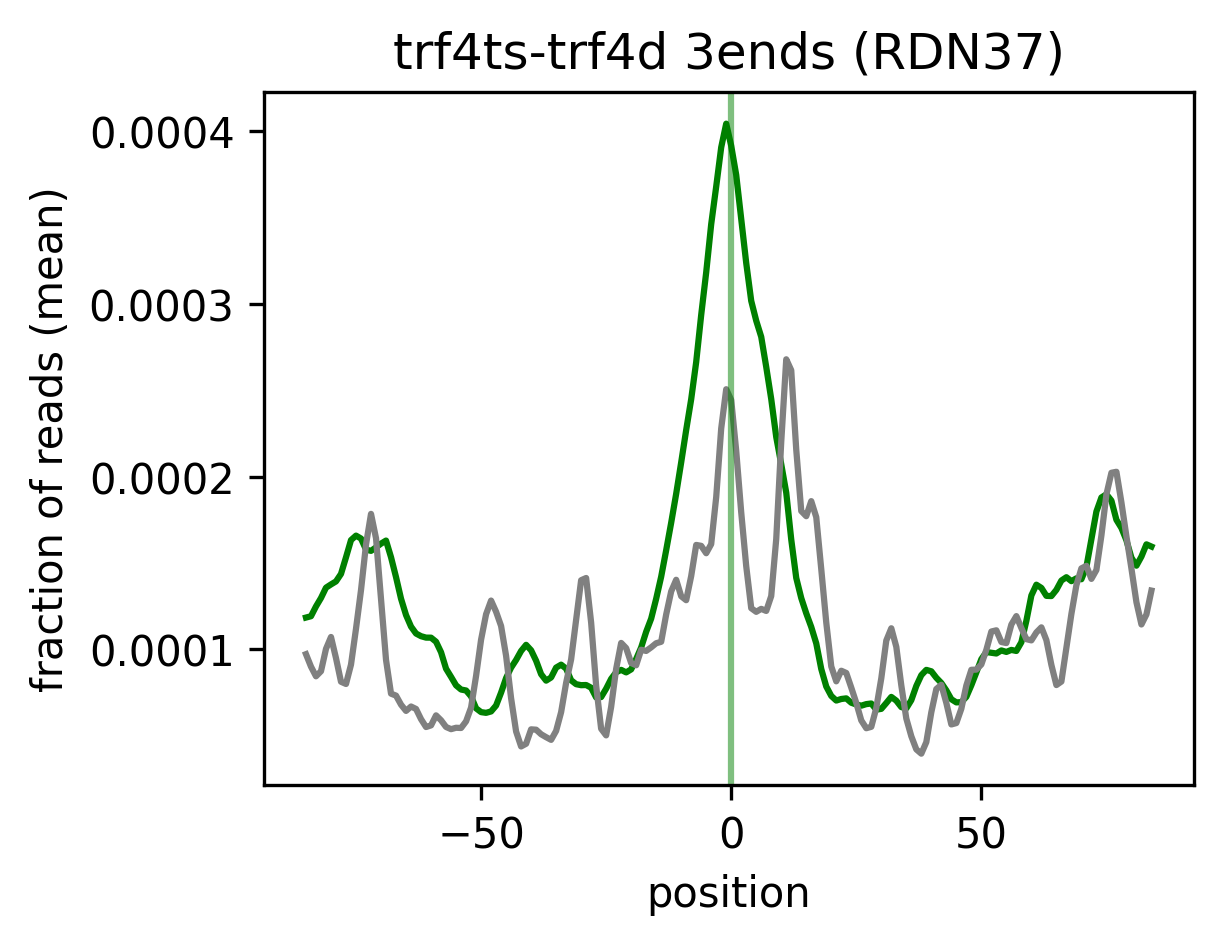

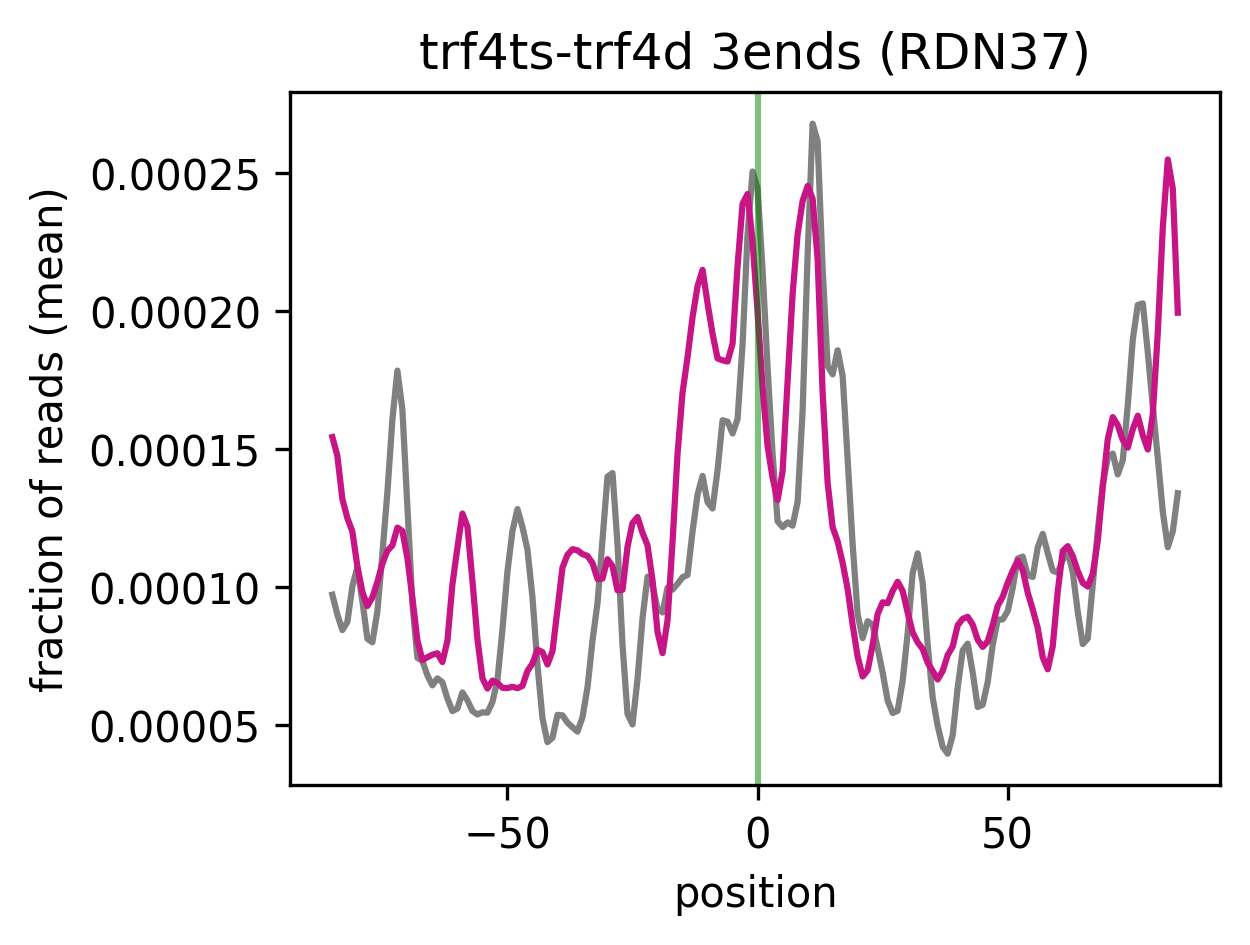

In [110]:
window = 85
stop=7100
elem=" (RDN37)"

# tt.plotting.cumulativePeaks(df11_Rpa190_3end, df2=df31_Rpa190_3end_trf4ts_trf5d_0h, local_pos=[i for i in peaks if i != 643], dpi=300,
#                         title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
#                         color1='green', color2="grey", lc='green',fname="Fig_R2Cmedian.png",use='median')

tt.plotting.cumulativePeaks(df11_Rpa190_3end, df2=df31_Rpa190_3end_trf4ts_trf5d_0h, local_pos=[i for i in peaks if i != 643], dpi=300,
                        title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
                        color1='green', color2="grey", lc='green',fname="Fig_R2Cmean.png")

# tt.plotting.cumulativePeaks(df31_Rpa190_3end_trf4ts_trf5d_0h, df2=df32_Rpa190_3end_trf4ts_trf5d_4h, local_pos=[i for i in peaks if i != 643], dpi=300,
#                         title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
#                         color1='grey', color2="mediumvioletred", lc='green',fname="Fig_R2Dmedian.png",use='median')

tt.plotting.cumulativePeaks(df31_Rpa190_3end_trf4ts_trf5d_0h, df2=df32_Rpa190_3end_trf4ts_trf5d_4h, local_pos=[i for i in peaks if i != 643], dpi=300,
                        title="trf4ts-trf4d 3ends"+elem, start=None, stop=stop, window=window, figsize=(4,3),
                        color1='grey', color2="mediumvioletred", lc='green',fname="Fig_R2Dmean.png")

Experiments: 
['seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end']
Experiments: 
['seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end_polyA', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end_polyA', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end_polyA', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end_polyA']
Experiments: 
['seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end']


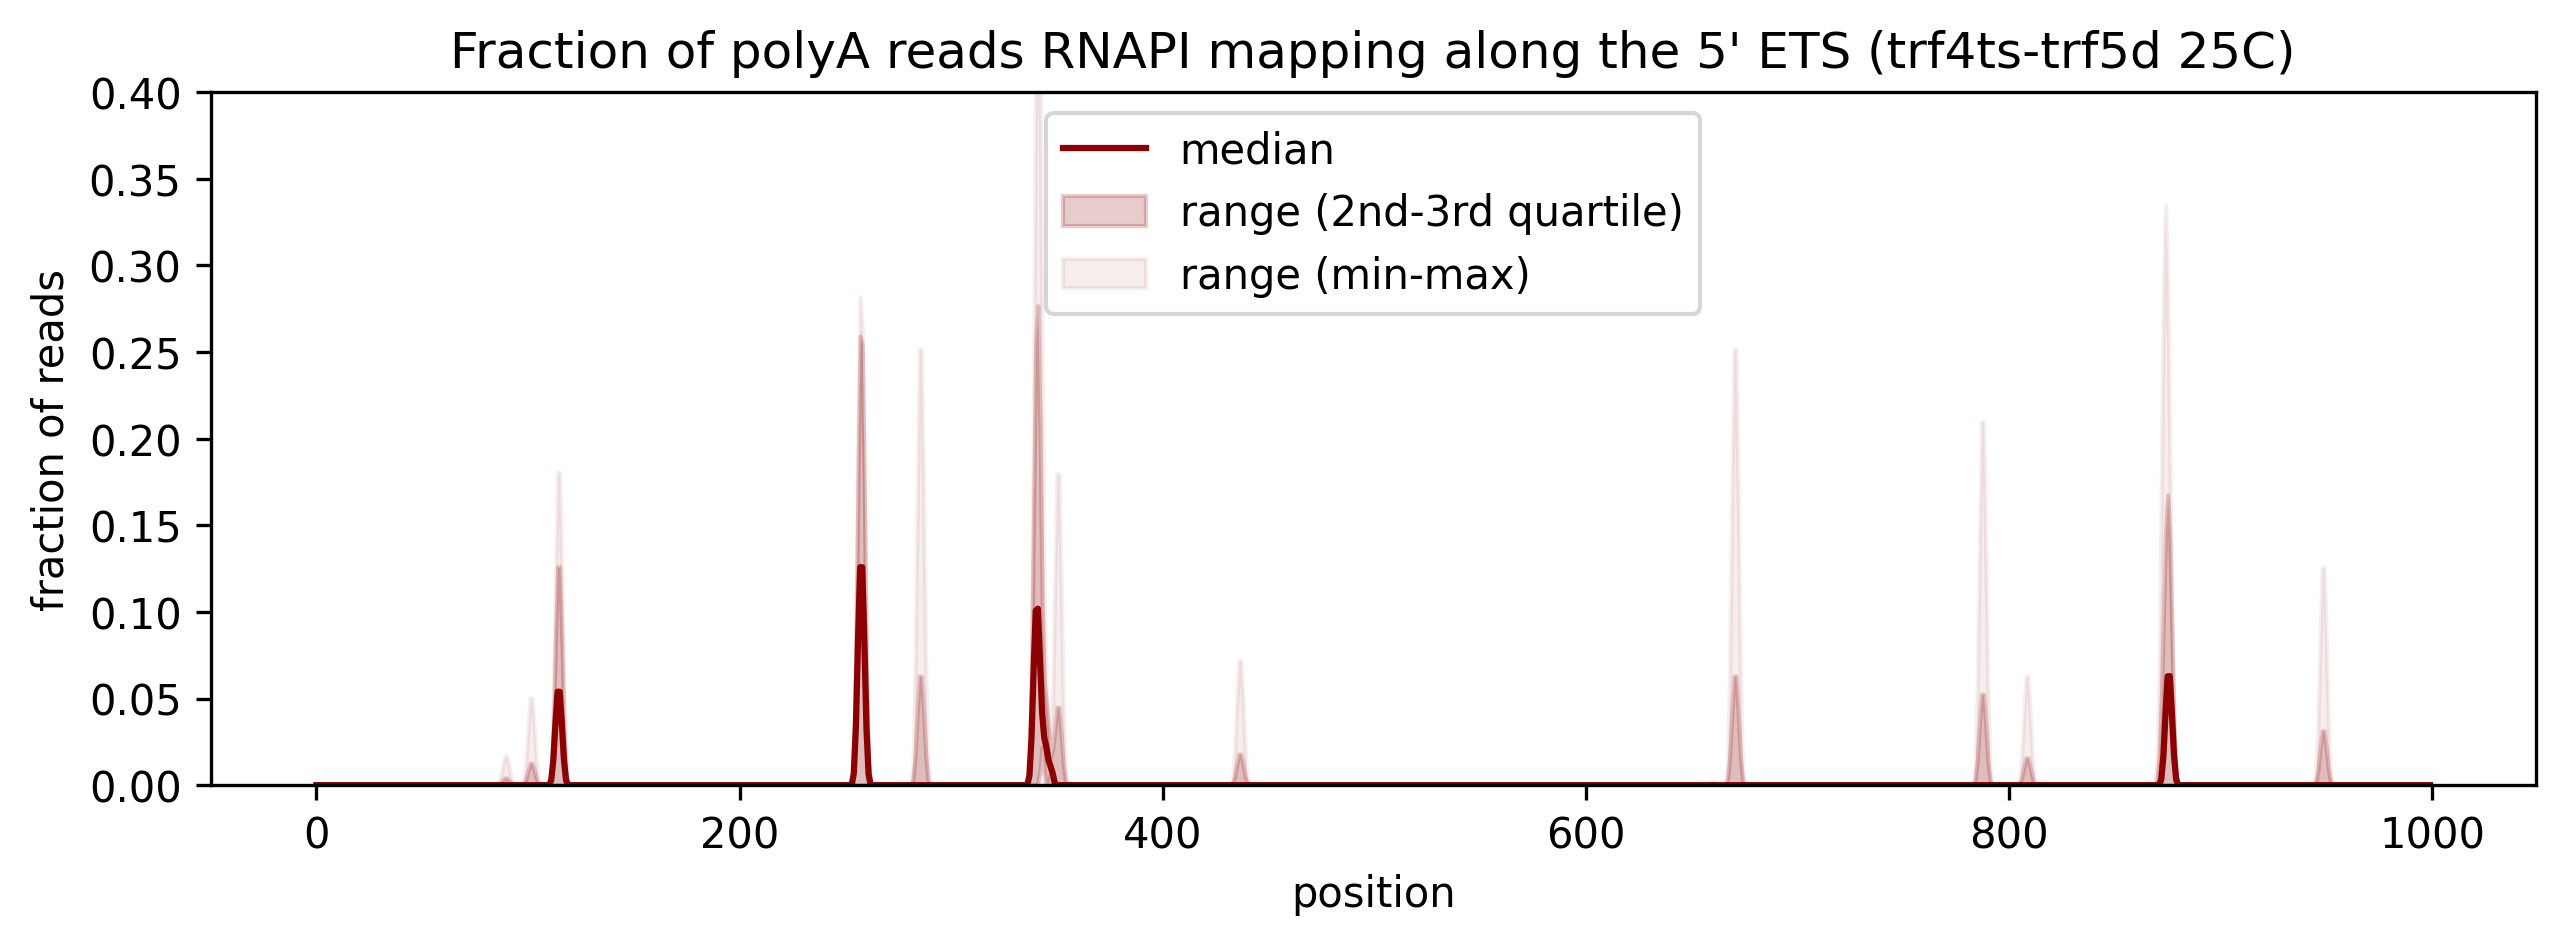

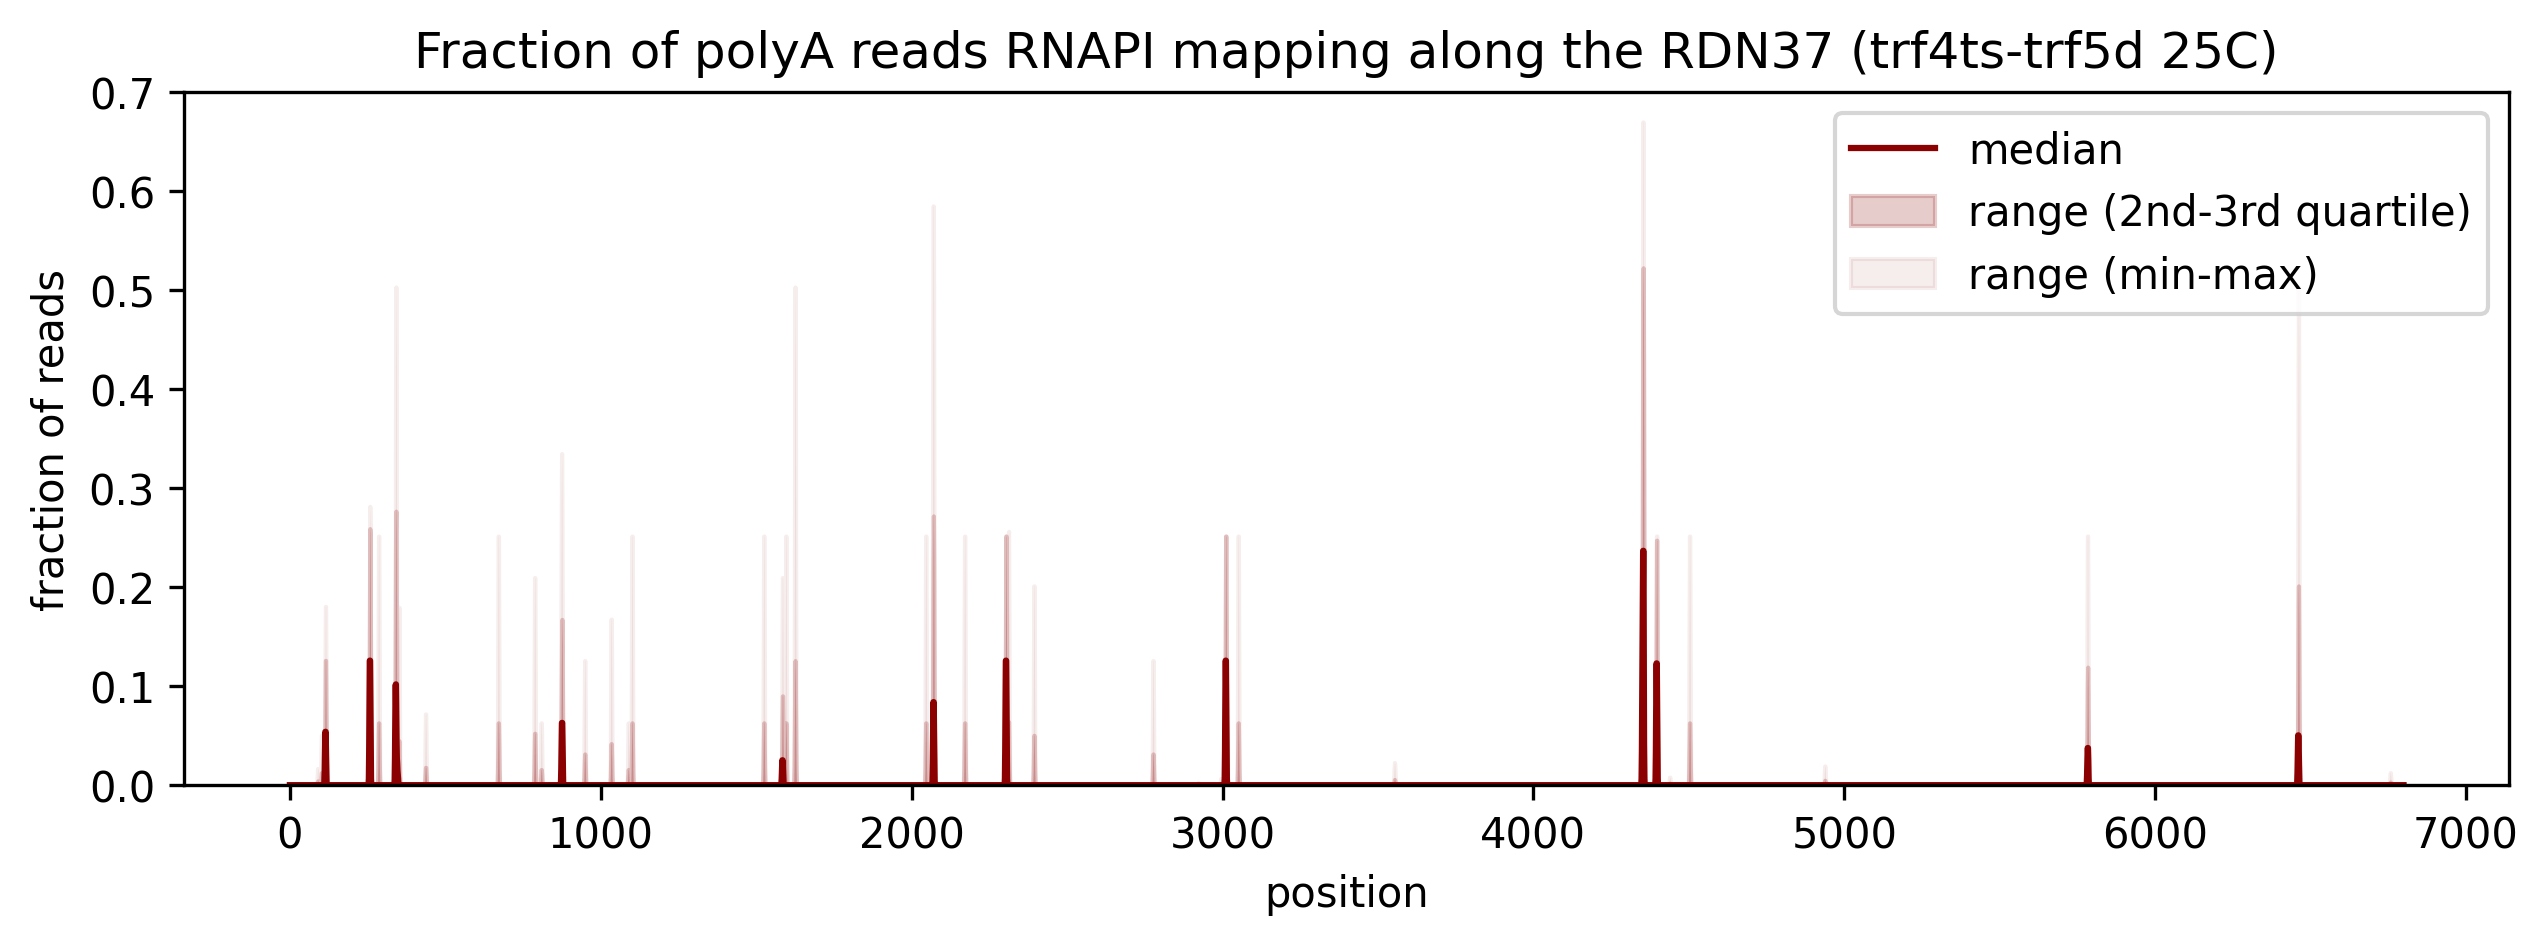

Experiments: 
['seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end']
Experiments: 
['seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end_polyA', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end_polyA', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_2_PROFILE_3end_polyA', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_37C-4h_1_PROFILE_3end_polyA']
Experiments: 
['seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end', 'seq2-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_1_PROFILE_3end', 'seq4-EP240606_Rpa190HTP_trf4ts-trf5∆_25C_2_PROFILE_3end']


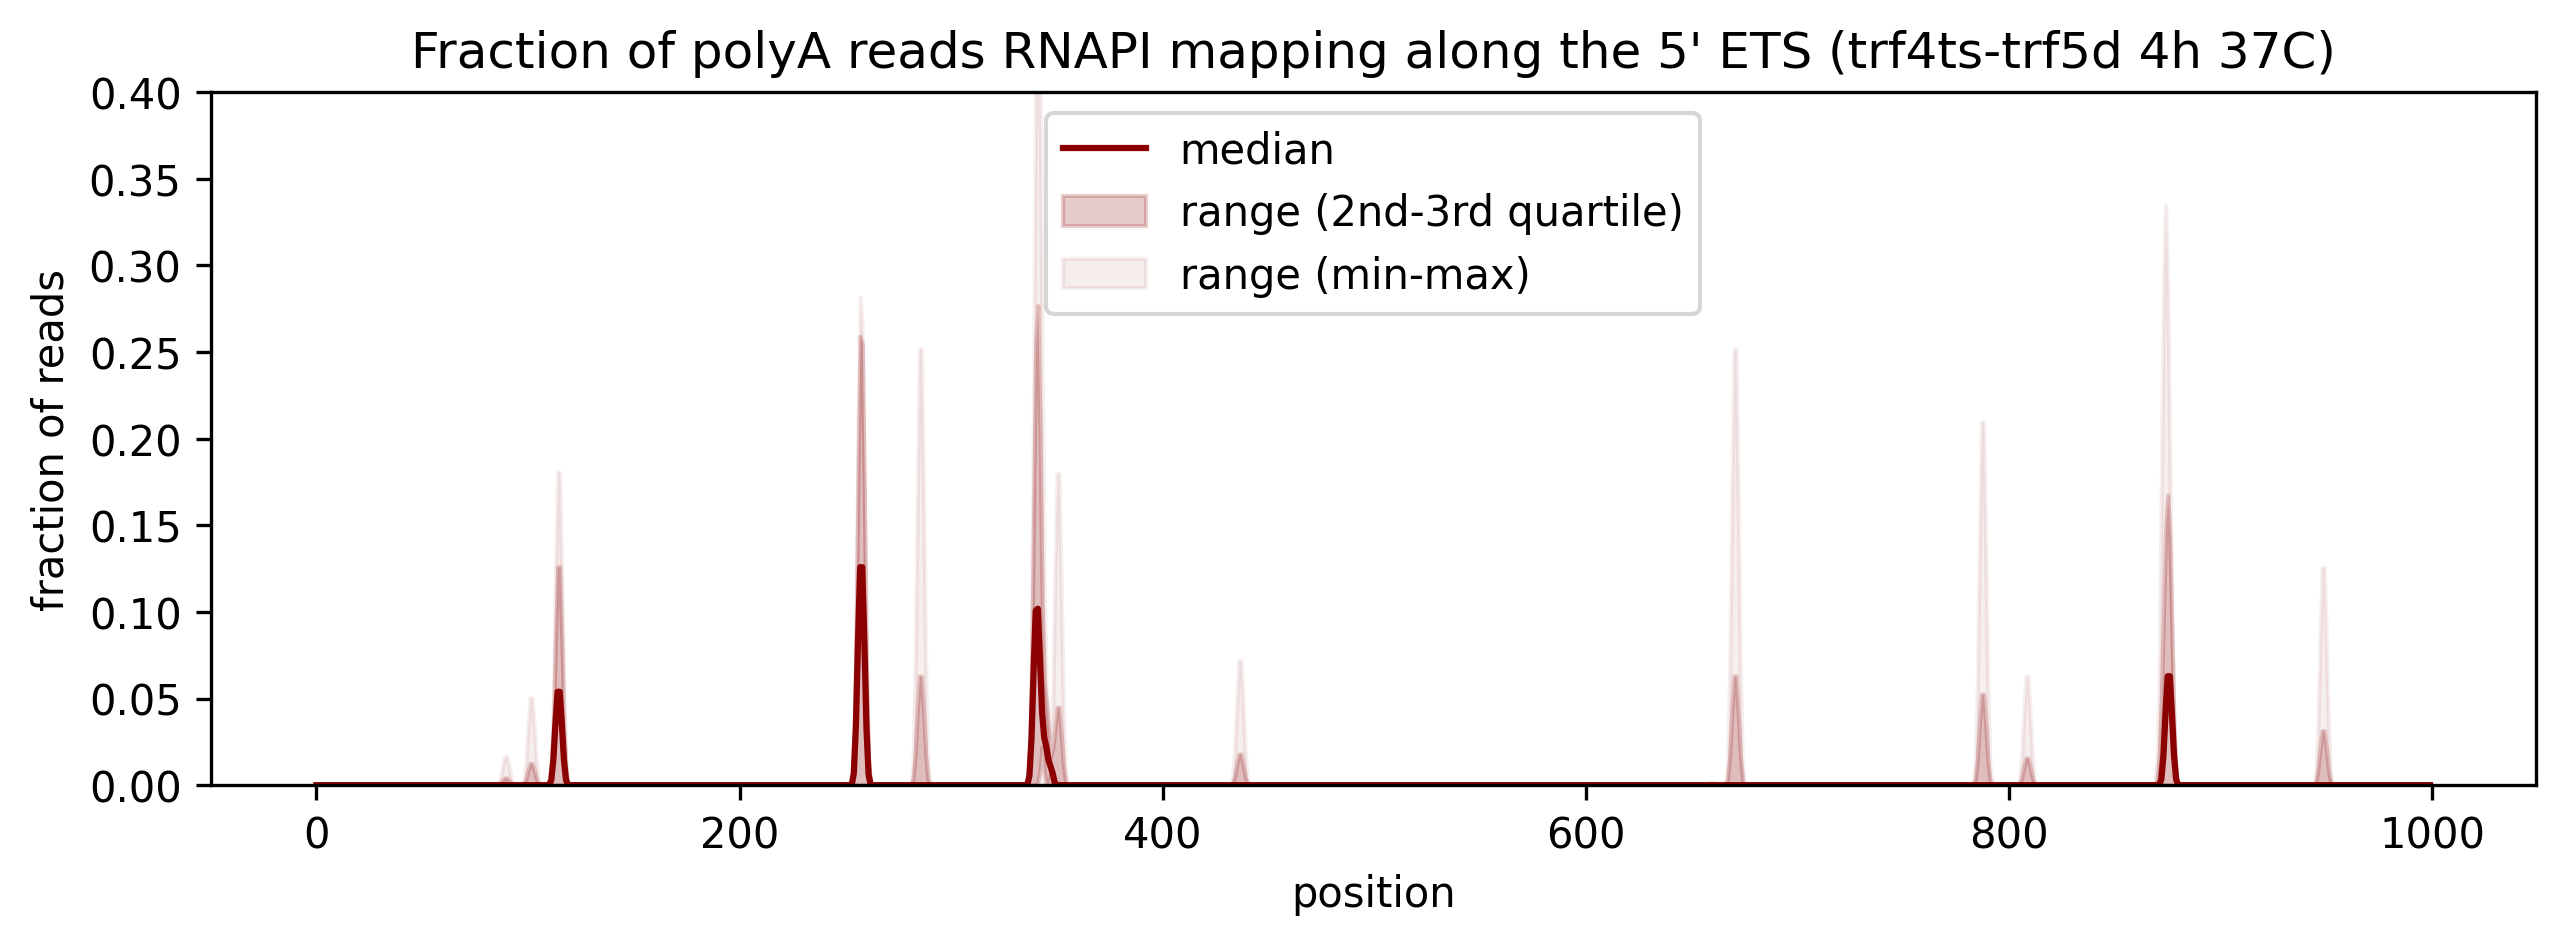

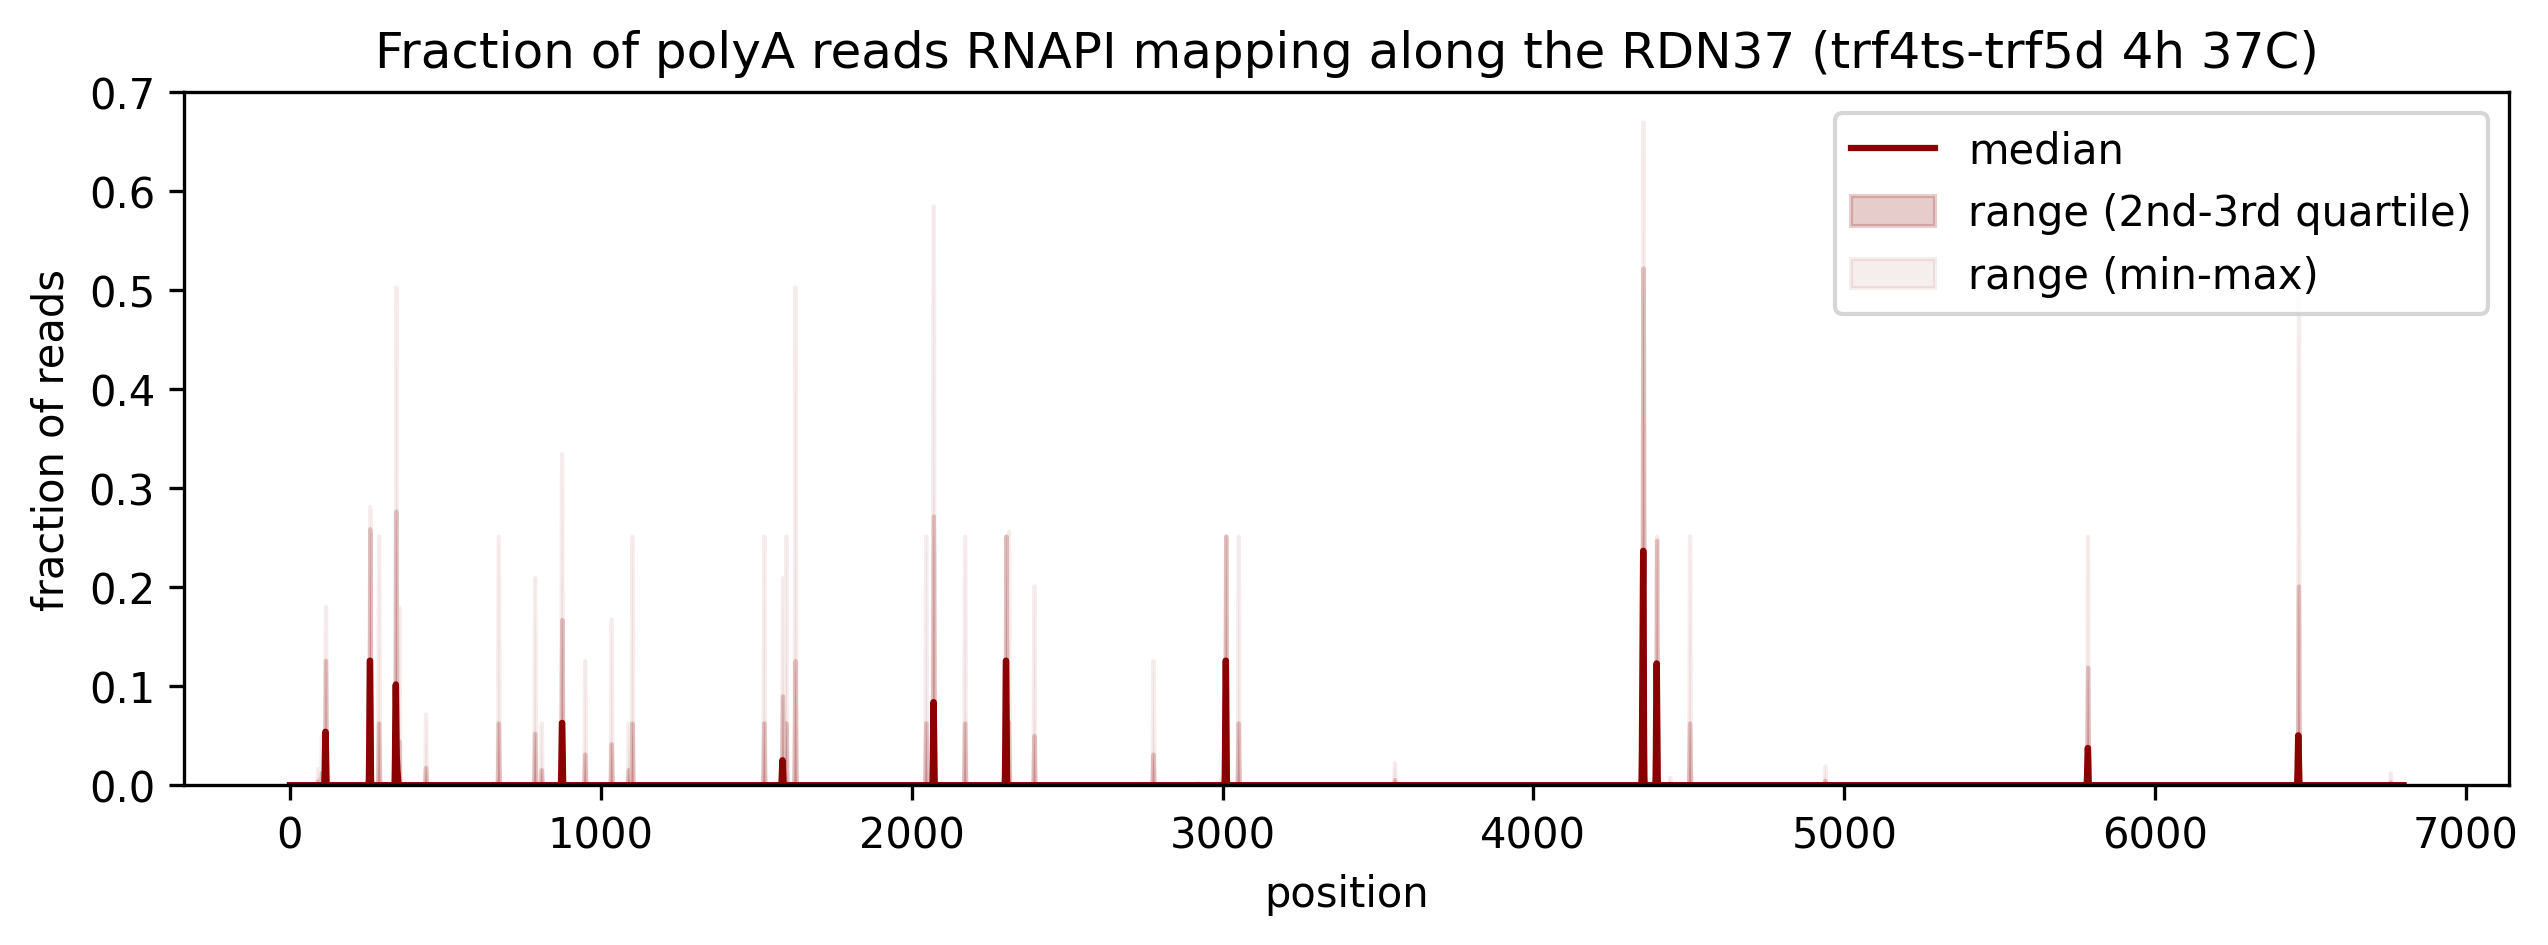

In [111]:
# polyA reads

# trf4ts-trf5d 25C
df33_Rpa190_3end_trf4ts_trf5d_0h_raw = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','trf4ts-trf5','25C','seq'], let_out=['seq3'], stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df34_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw = tt.profiles.preprocess(df03_RDN37_polyA,
                                     let_in=['Rpa190HTP','trf4ts-trf5','25C','seq'], let_out=['seq3'], stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)


df34_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw.columns = [i.replace("_polyA","") for i in df34_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw.columns]

df35_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw = df34_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw / df33_Rpa190_3end_trf4ts_trf5d_0h_raw

df36_Rpa190_3end_trf4ts_trf5d_0h_polyA = tt.profiles.preprocess(df35_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw.fillna(0.0),let_in=['Rpa190HTP'], 
                                     stats=True, smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df36_Rpa190_3end_trf4ts_trf5d_0h_polyA, title="Fraction of polyA reads RNAPI mapping along the 5' ETS (trf4ts-trf5d 25C)",
                             dpi=300,ylim=(None,0.4), start=0+300, stop=1000+300,color='darkred',figsize=(10,3),
                             offset=300,)

tt.plotting.plot_as_box_plot(df36_Rpa190_3end_trf4ts_trf5d_0h_polyA, title="Fraction of polyA reads RNAPI mapping along the RDN37 (trf4ts-trf5d 25C)",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300, fname="Fig_R2E_25C.png")

# trf4ts-trf5d 4h 37C
df37_Rpa190_3end_trf4ts_trf5d_4h_raw = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','trf4ts-trf5','37C','seq'], let_out=['seq3'], stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df38_Rpa190_3end_trf4ts_trf5d_4h_polyA_raw = tt.profiles.preprocess(df03_RDN37_polyA,
                                     let_in=['Rpa190HTP','trf4ts-trf5','37C','seq'], let_out=['seq3'], stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)


df38_Rpa190_3end_trf4ts_trf5d_4h_polyA_raw.columns = [i.replace("_polyA","") for i in df38_Rpa190_3end_trf4ts_trf5d_4h_polyA_raw.columns]

df39_Rpa190_3end_trf4ts_trf5d_4h_polyA_raw = df38_Rpa190_3end_trf4ts_trf5d_4h_polyA_raw / df37_Rpa190_3end_trf4ts_trf5d_4h_raw

df310_Rpa190_3end_trf4ts_trf5d_4h_polyA = tt.profiles.preprocess(df35_Rpa190_3end_trf4ts_trf5d_0h_polyA_raw.fillna(0.0),let_in=['Rpa190HTP'], 
                                     stats=True, smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df310_Rpa190_3end_trf4ts_trf5d_4h_polyA, title="Fraction of polyA reads RNAPI mapping along the 5' ETS (trf4ts-trf5d 4h 37C)",
                             dpi=300,ylim=(None,0.4), start=0+300, stop=1000+300,color='darkred',figsize=(10,3),
                             offset=300)

tt.plotting.plot_as_box_plot(df310_Rpa190_3end_trf4ts_trf5d_4h_polyA, title="Fraction of polyA reads RNAPI mapping along the RDN37 (trf4ts-trf5d 4h 37C)",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300, fname="Fig_R2E_37C.png")

In [112]:
# Rrp44-exo
# rat1-1
# air1d-air2d

# Rrp44-exo

In [113]:
df01_RDN37_3end.filter(like='rrp44').sum().sort_values(ascending=False)

EP240806_Rpa135HTP_Rpa12dC-rrp44D551N_none_3_PROFILE_3end         757380.0
EP240806_Rpa135HTP_rrp44D551N_none_4_PROFILE_3end                 752945.0
EP240806_Rpa190HTP_rrp44D551N_none_3_PROFILE_3end                 152742.0
seq1-EP240524_Rpa190HTP_rrp44D551N_none_1_PROFILE_3end             20718.0
seq1-EP240524_Rpa190HTP_rrp44D551N_none_2_PROFILE_3end             18625.0
seq4-EP240524_Rpa190HTP_rrp44D551N_none_1_PROFILE_3end             13467.0
seq1-EP240524_Rpa135HTP_Rpa12dC-rrp44D551N_none_1_PROFILE_3end     11395.0
seq4-EP240524_Rpa190HTP_rrp44D551N_none_2_PROFILE_3end              7437.0
seq1-EP240524_Rpa135HTP_rrp44D551N_none_2_PROFILE_3end              5204.0
seq4-EP240524_Rpa135HTP_rrp44D551N_none_2_PROFILE_3end              5107.0
seq4-EP240524_Rpa135HTP_Rpa12dC-rrp44D551N_none_1_PROFILE_3end      5062.0
seq3-EP240614_Rpa135HTP_rrp44D551N_none_3_PROFILE_3end              2034.0
EP240614_Rpa135HTP_rrp44D551N_none_3_PROFILE_3end                   1505.0
seq4-EP240524_Rpa135HTP_r

<Axes: >

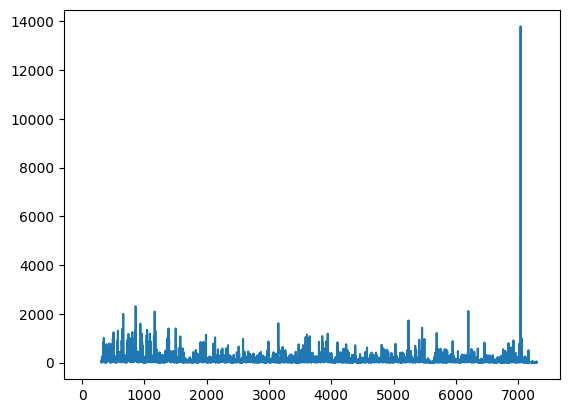

In [127]:
df01_RDN37_3end['EP240806_Rpa135HTP_rrp44D551N_none_4_PROFILE_3end'].plot()

Experiments: 
['EP240806_Rpa190HTP_rrp44D551N_none_3_PROFILE_3end']
Experiments: 
['EP240806_Rpa135HTP_rrp44D551N_none_4_PROFILE_3end']
Experiments: 
['EP240806_Rpa135HTP_Rpa12dC-rrp44D551N_none_3_PROFILE_3end']


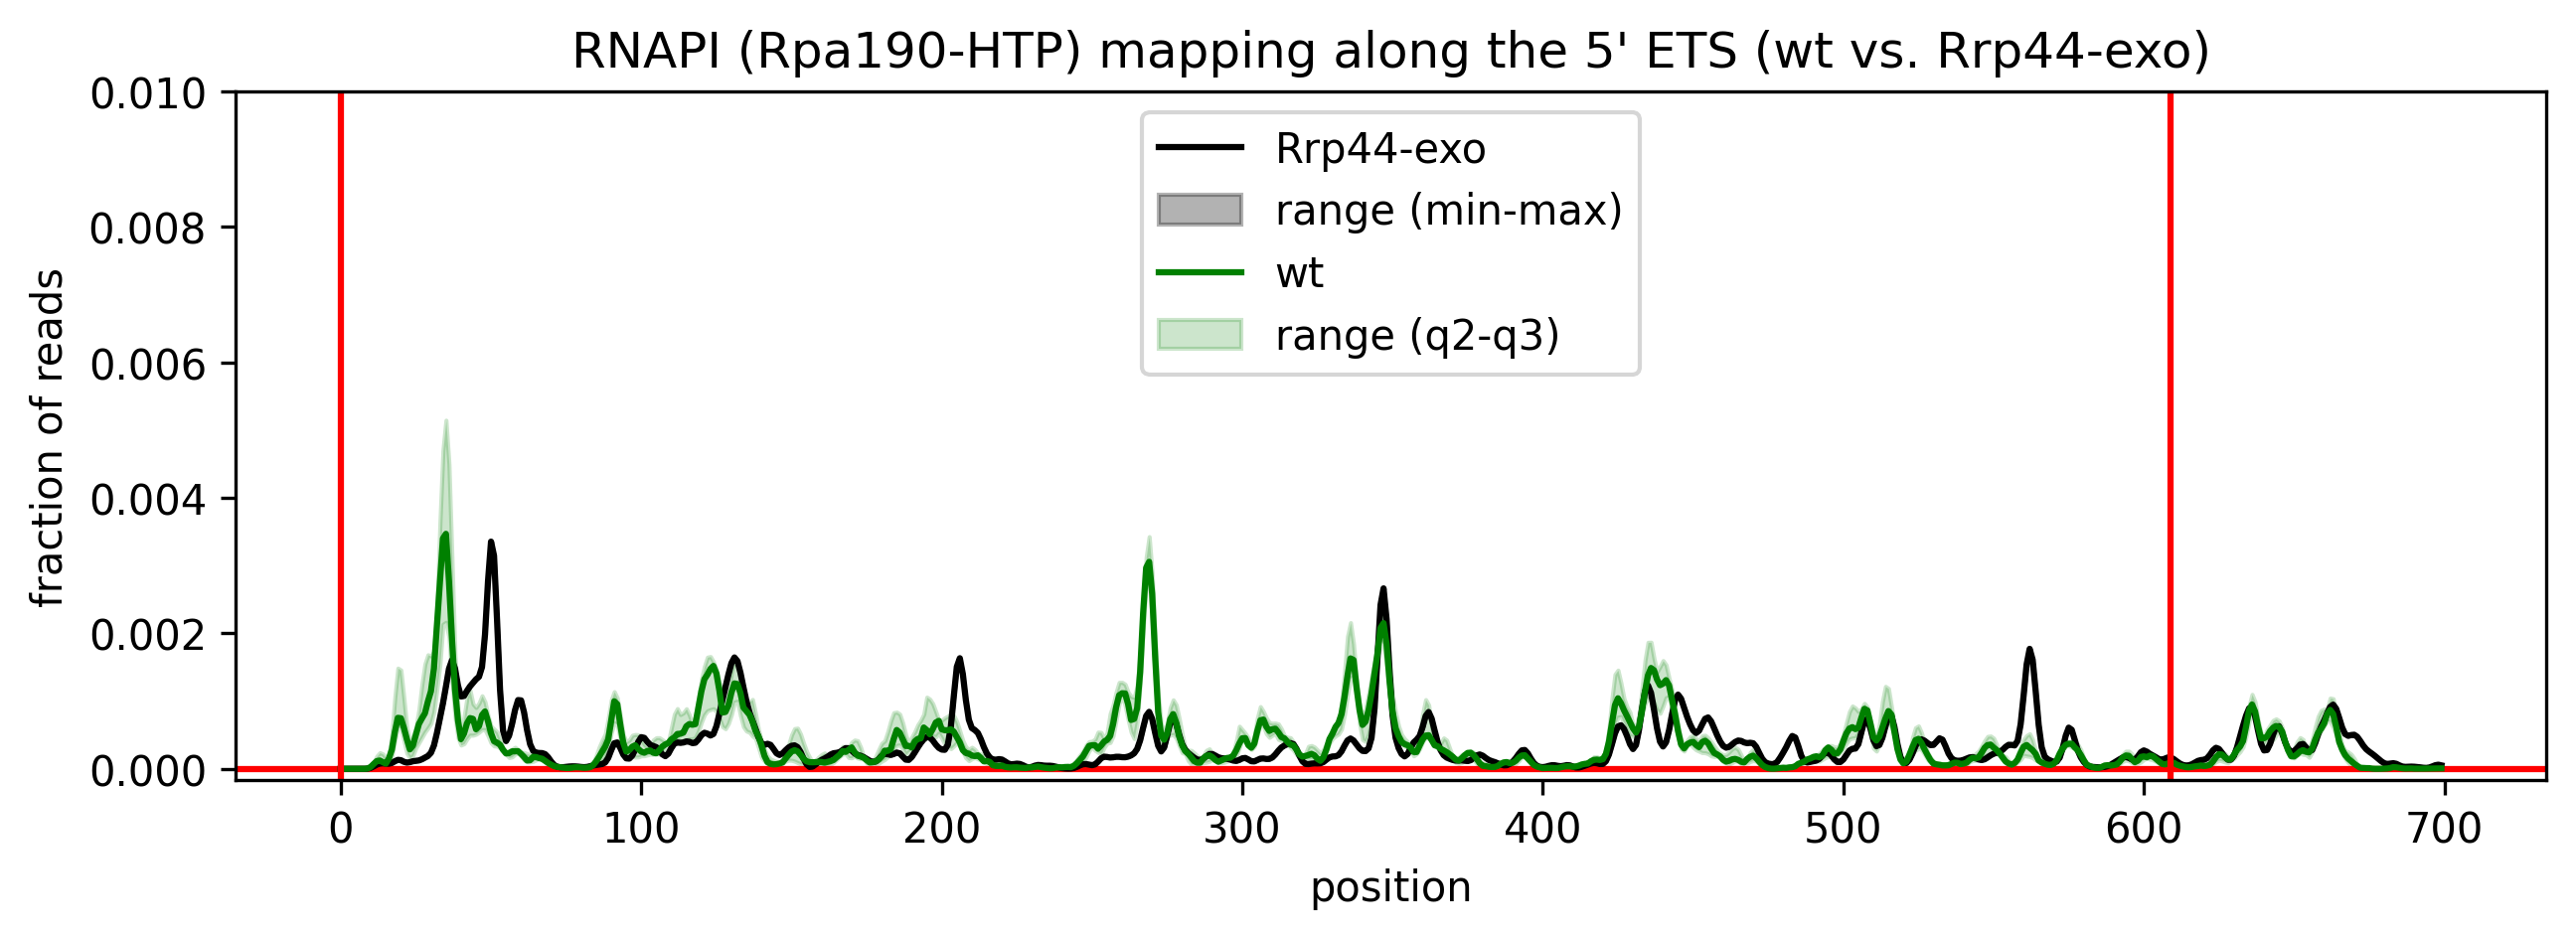

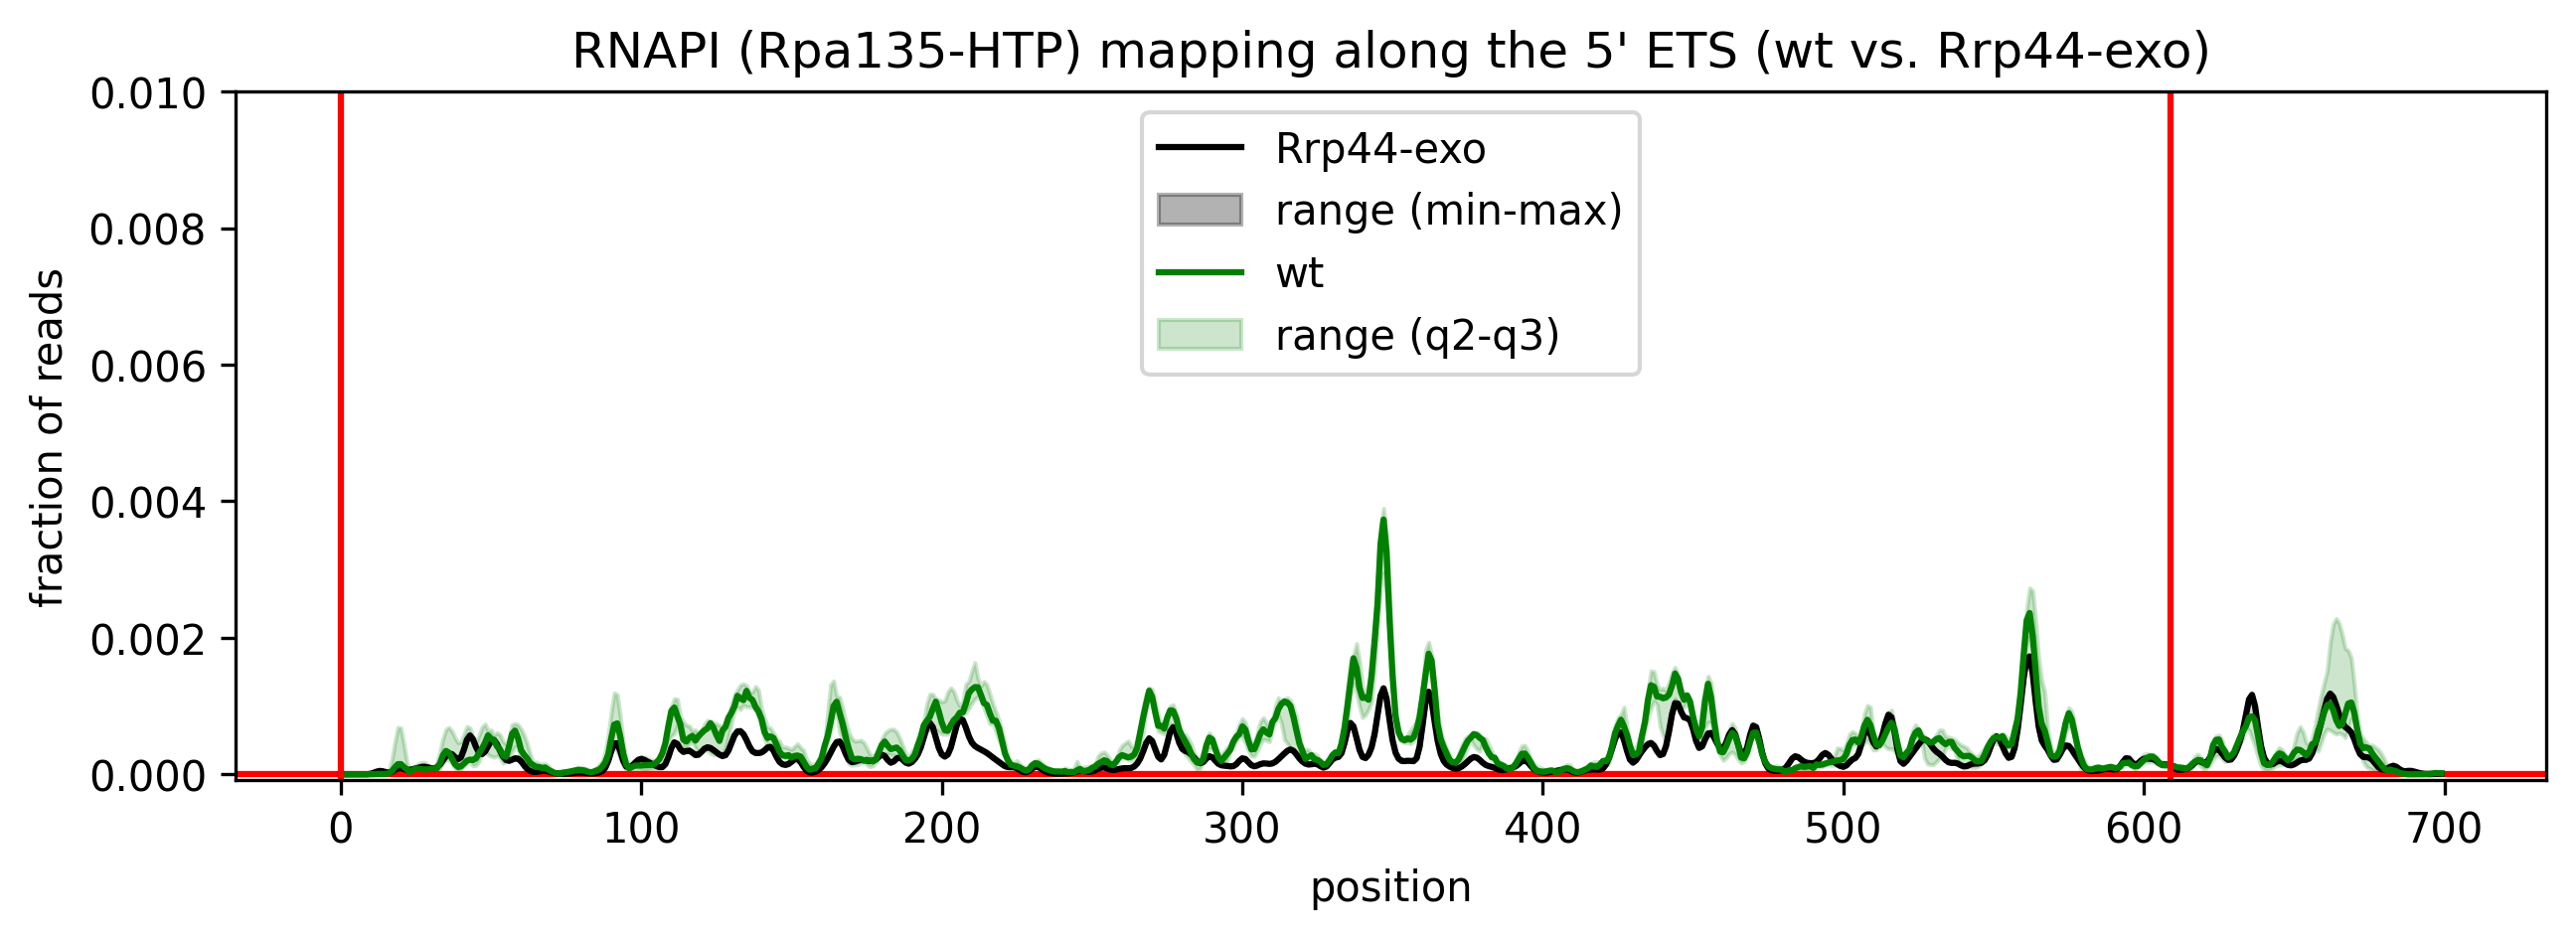

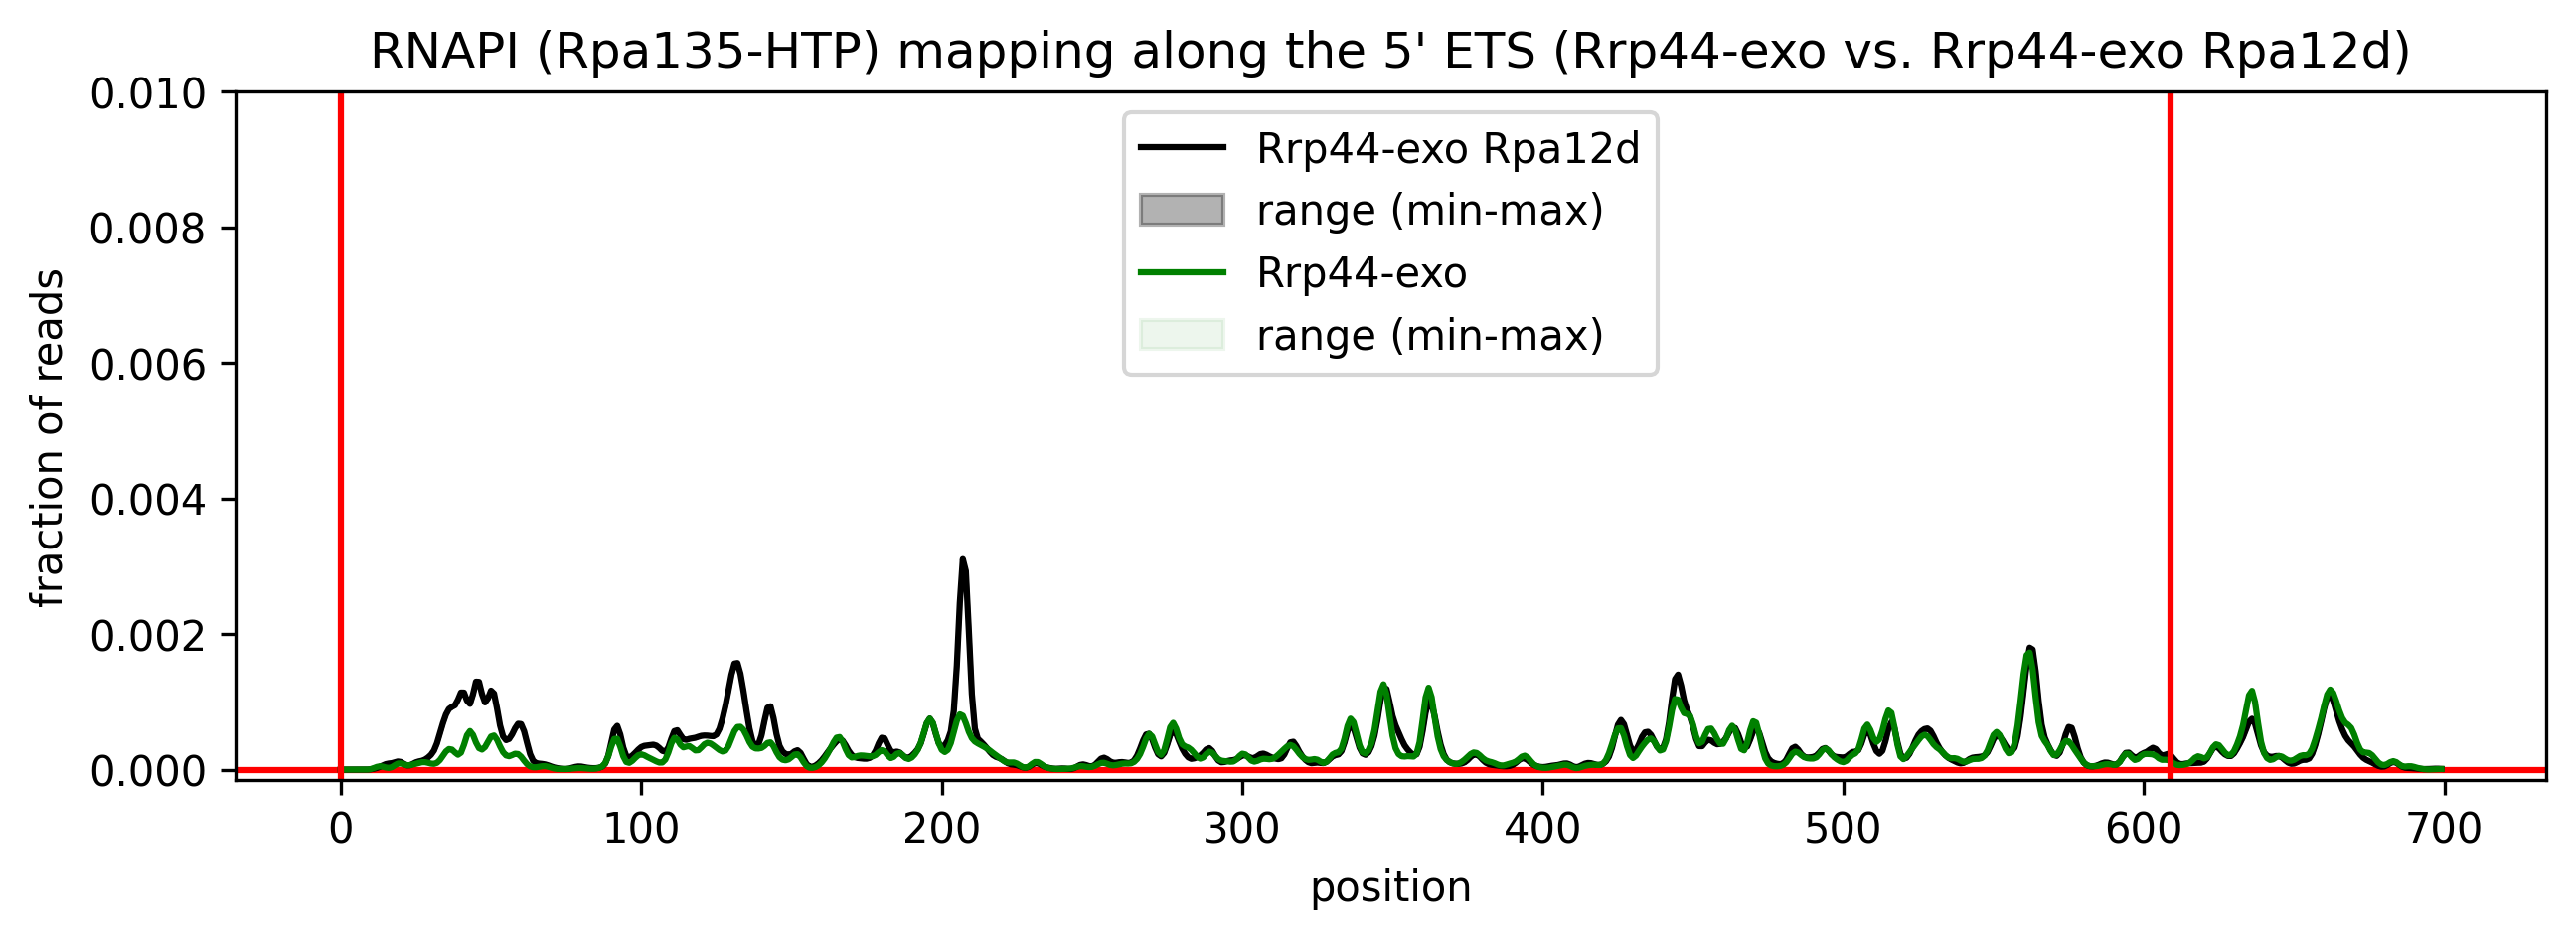

In [132]:
df41_Rpa190_rrp44D551N_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','rrp44D551N','EP240806'],let_out=['EP240614'], 
                                     stats=True)

df42_Rpa135_rrp44D551N_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa135HTP','rrp44D551N','EP240806'], let_out=['Rpa12dC','EP240614'], 
                                     stats=True)

df43_Rpa135_Rpa12d_rrp44D551N_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa135HTP','Rpa12dC-rrp44D551N','EP240806'], let_out=['EP240614'],
                                     stats=True)

tt.plotting.plot_to_compare(ref=df11_Rpa190_3end, df=df41_Rpa190_rrp44D551N_3end,figsize=(10,3),ref_label="wt",label="Rrp44-exo",
                           title="RNAPI (Rpa190-HTP) mapping along the 5' ETS (wt vs. Rrp44-exo)",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=700+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R3A_5ETS.png')

tt.plotting.plot_to_compare(ref=df15_Rpa135_3end, df=df42_Rpa135_rrp44D551N_3end,figsize=(10,3),ref_label="wt",label="Rrp44-exo",
                           title="RNAPI (Rpa135-HTP) mapping along the 5' ETS (wt vs. Rrp44-exo)",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=700+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R3B_5ETS.png')

tt.plotting.plot_to_compare(ref=df42_Rpa135_rrp44D551N_3end, df=df43_Rpa135_Rpa12d_rrp44D551N_3end,figsize=(10,3),ref_label="Rrp44-exo",label="Rrp44-exo Rpa12d",
                           title="RNAPI (Rpa135-HTP) mapping along the 5' ETS (Rrp44-exo vs. Rrp44-exo Rpa12d)",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=0+300, stop=700+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_R3C_5ETS.png')

# Rpa135 wt and Rpa12dC

Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end_polyA', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end_polyA']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end_polyA', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end_polyA']
Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']


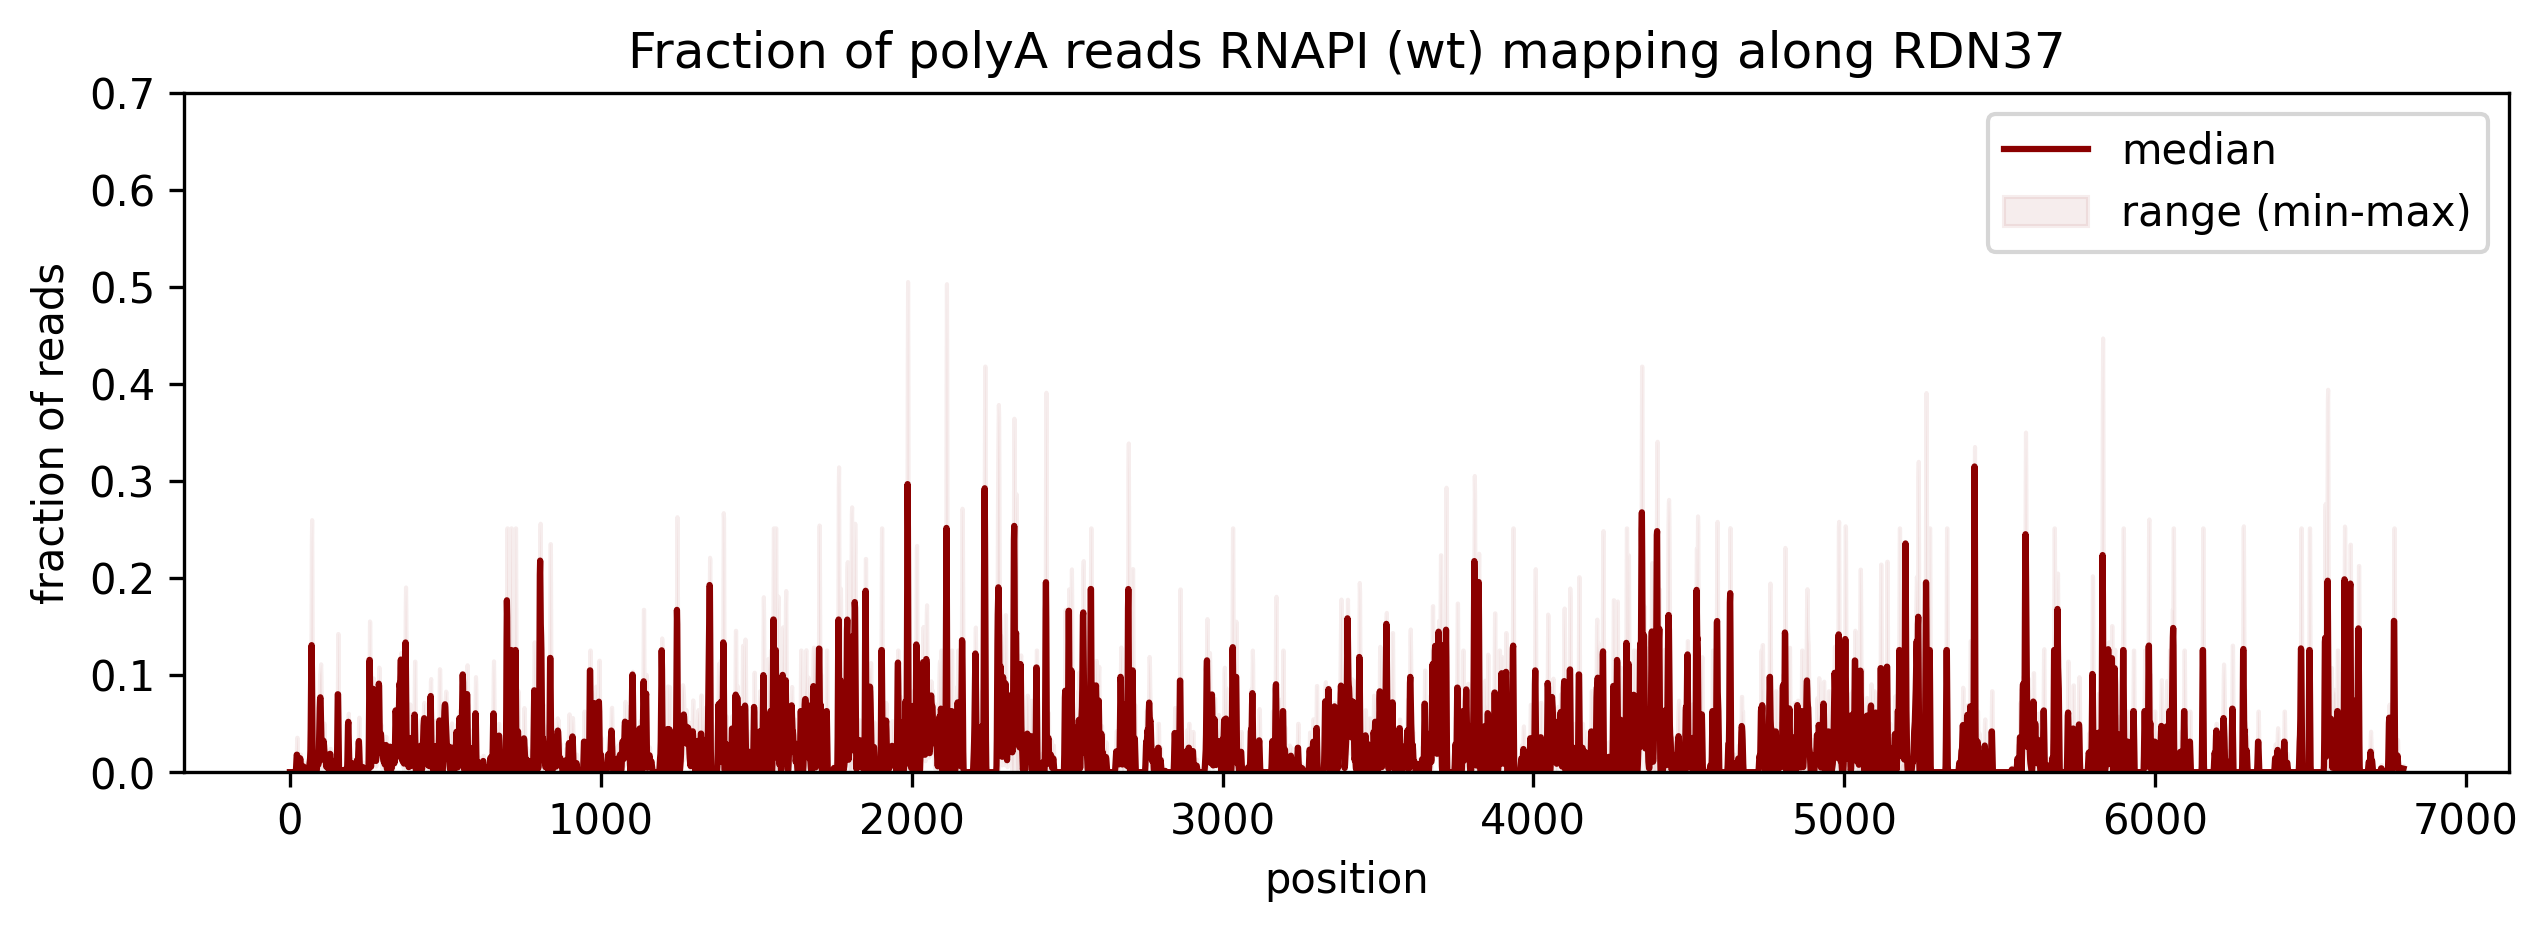

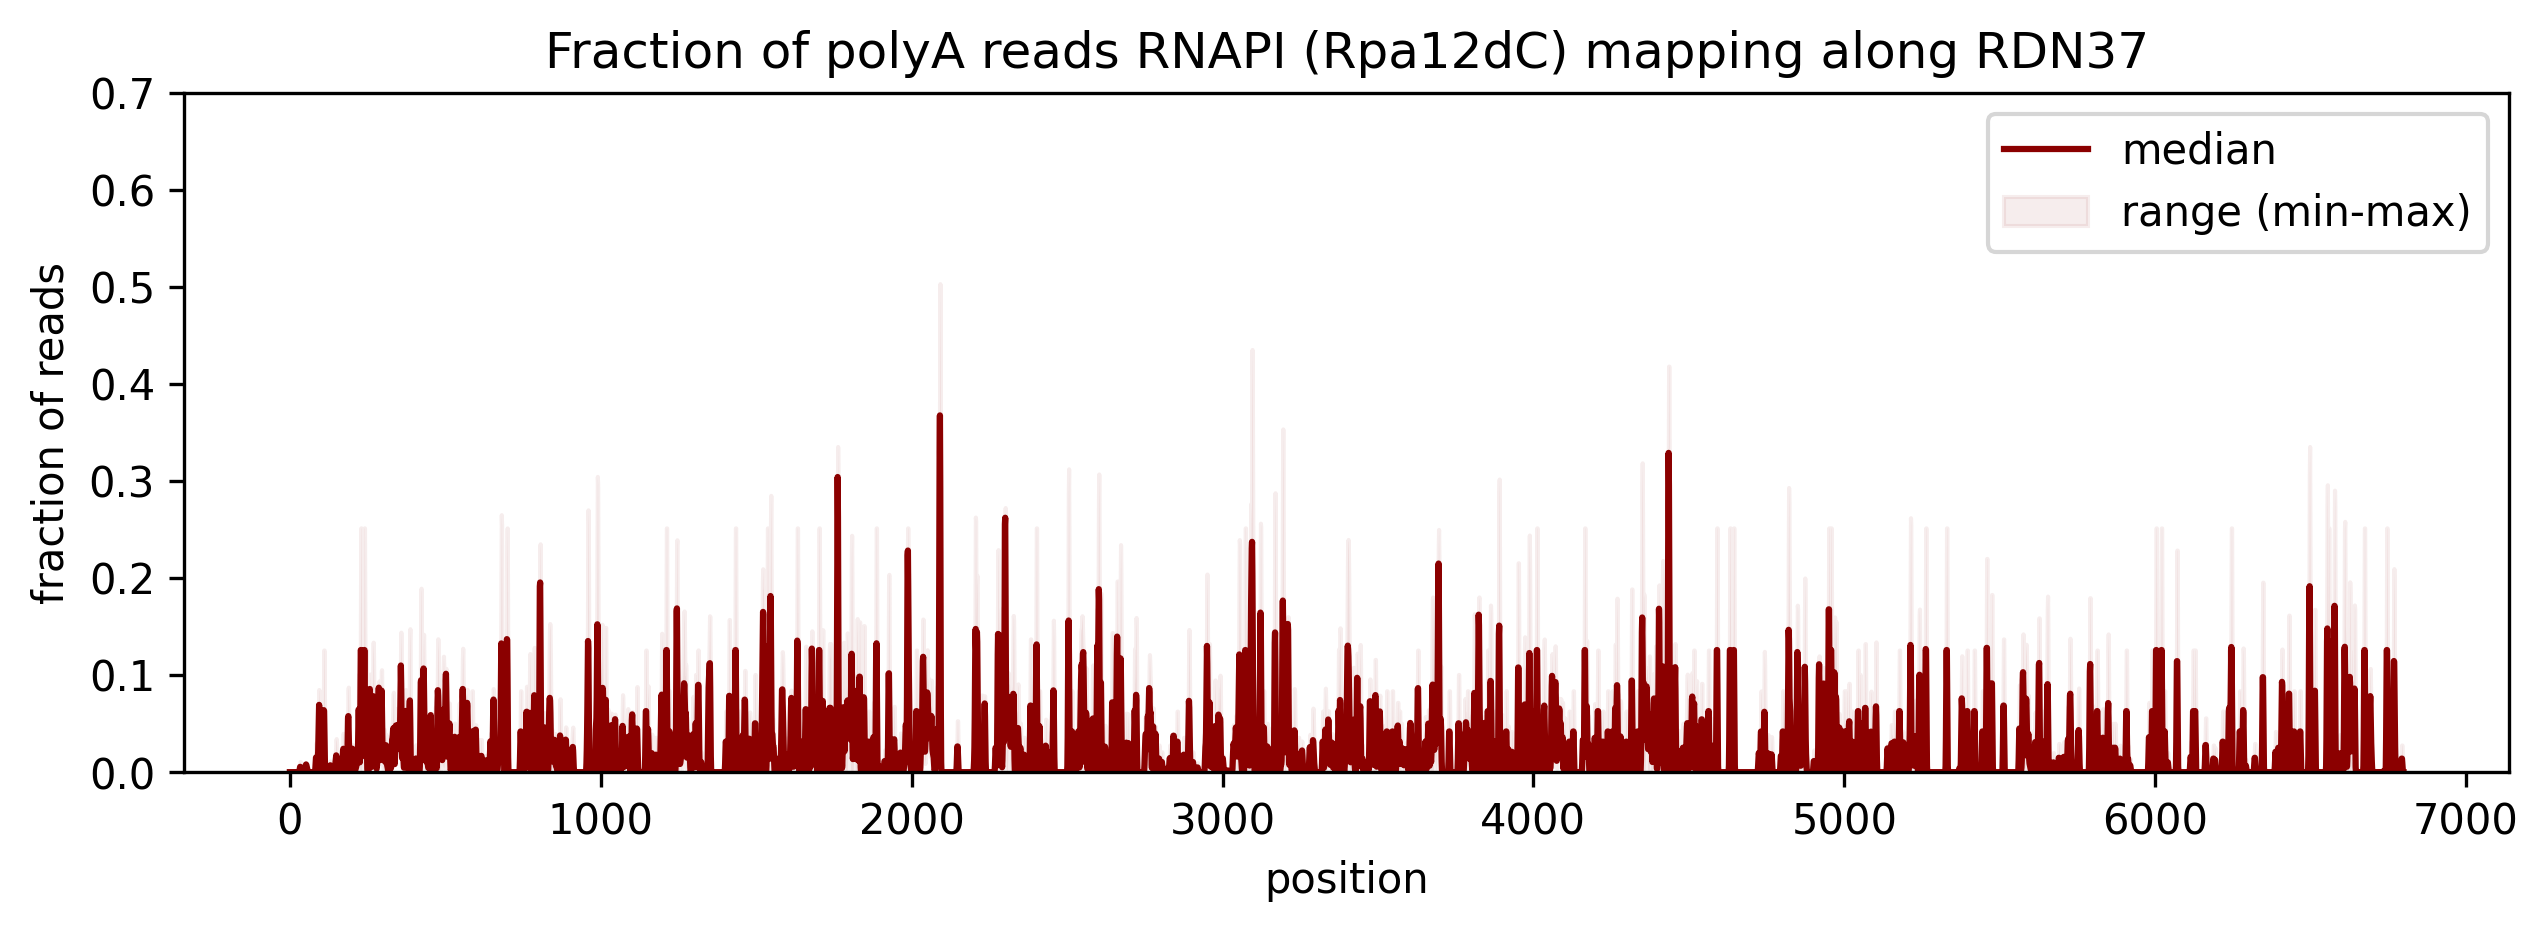

In [ ]:
df41_Rpa135_3end = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df51_Rpa135_Rpa12dC_3end = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df52_Rpa135_Rpa12dC_3end_polyA = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA.columns = [i.replace("_polyA","") for i in df42_Rpa135_3end_polyA.columns]
df43_Rpa135_fractionPolyA = df42_Rpa135_3end_polyA / df41_Rpa135_3end

df52_Rpa135_Rpa12dC_3end_polyA.columns = [i.replace("_polyA","") for i in df52_Rpa135_Rpa12dC_3end_polyA.columns]
df53_Rpa135_Rpa12dC_fractionPolyA = df52_Rpa135_Rpa12dC_3end_polyA / df51_Rpa135_Rpa12dC_3end

df44_polyA = tt.profiles.preprocess(df43_Rpa135_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_wt'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

df54_Rpa12dC_polyA = tt.profiles.preprocess(df53_Rpa135_Rpa12dC_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_Rpa12dC'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df44_polyA, title="Fraction of polyA reads RNAPI (wt) mapping along RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_polyA_wt.png')

tt.plotting.plot_as_box_plot(df54_Rpa12dC_polyA, title="Fraction of polyA reads RNAPI (Rpa12dC) mapping along RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_polyA_a12dC.png')

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

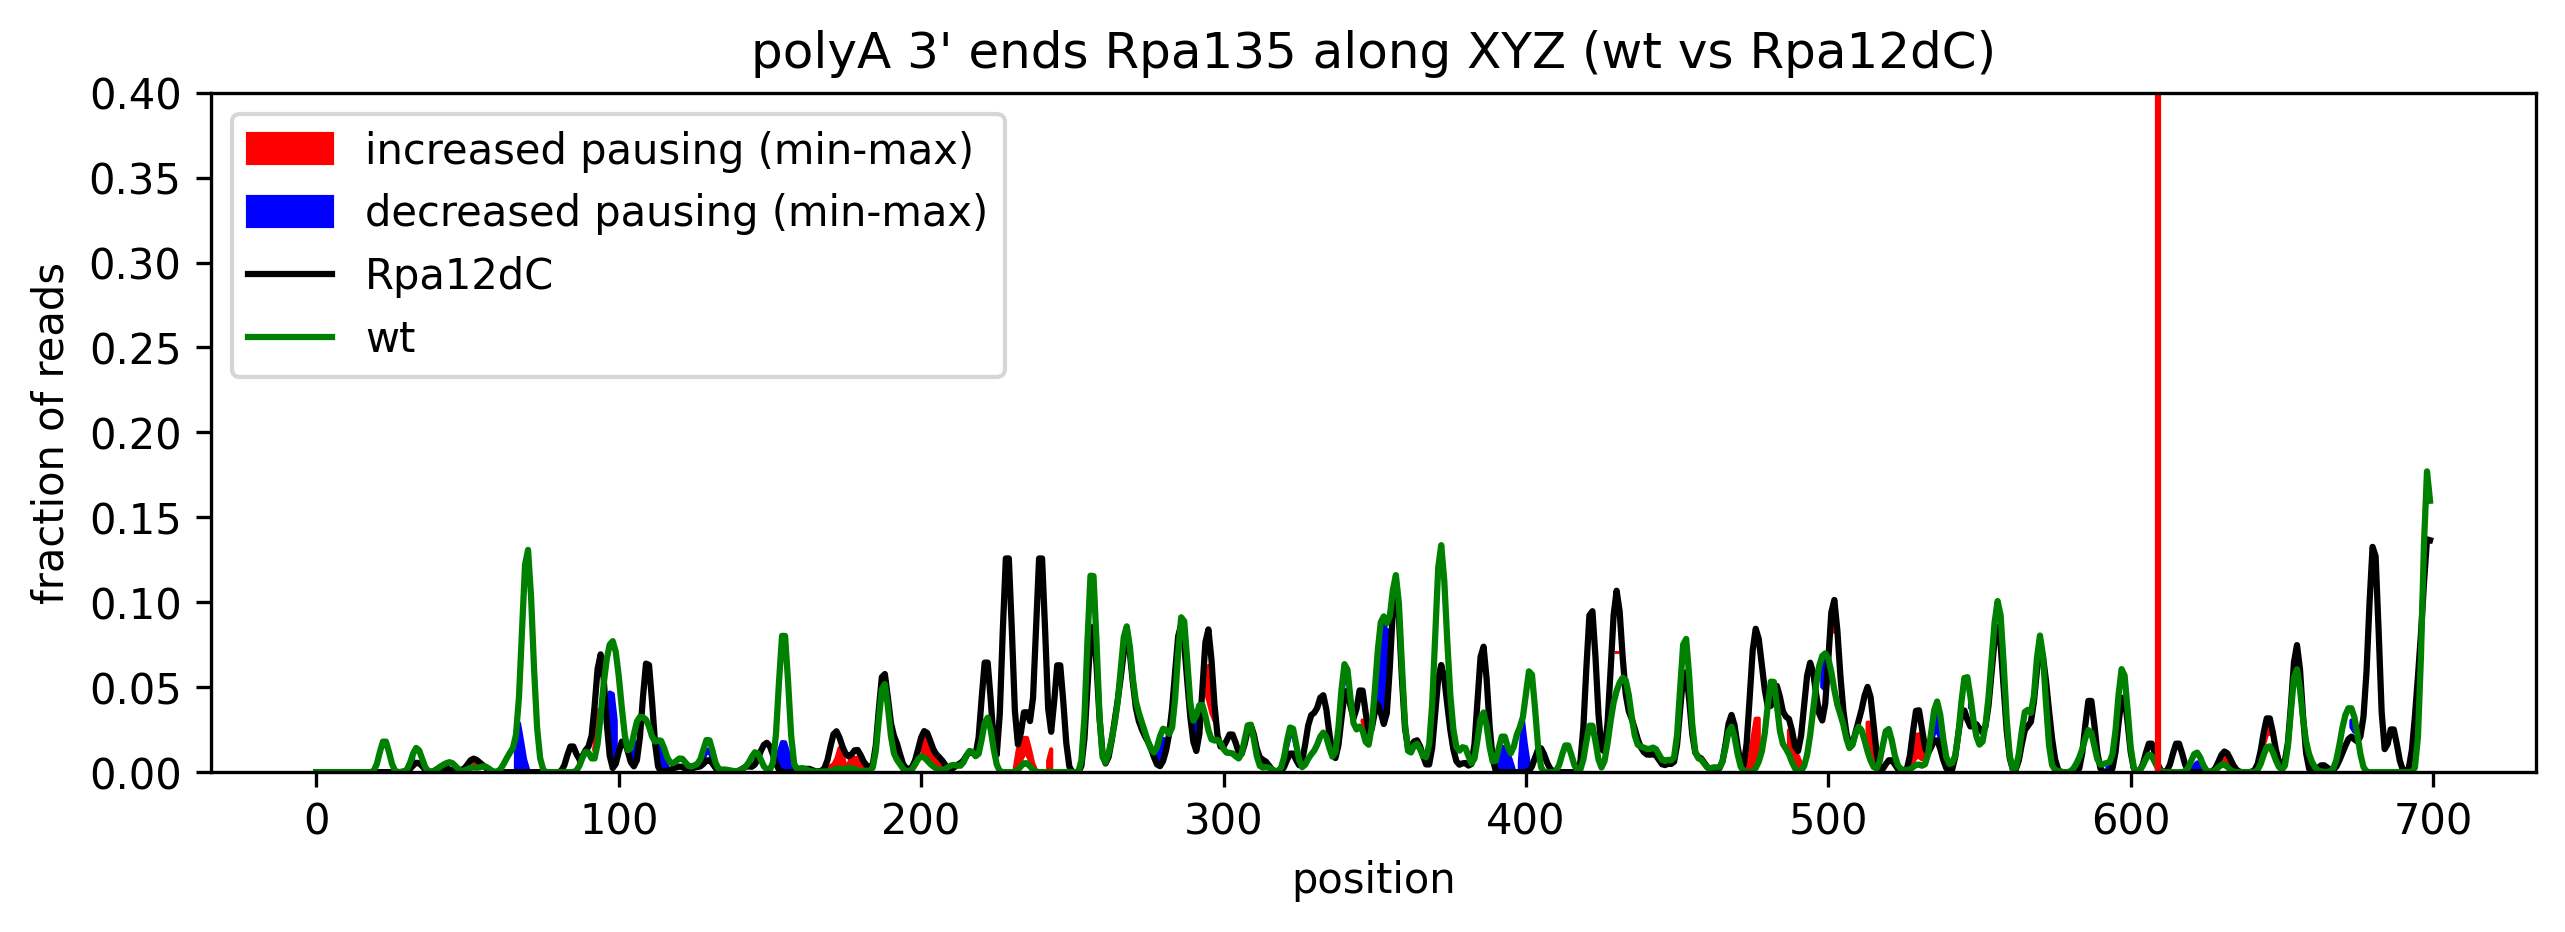

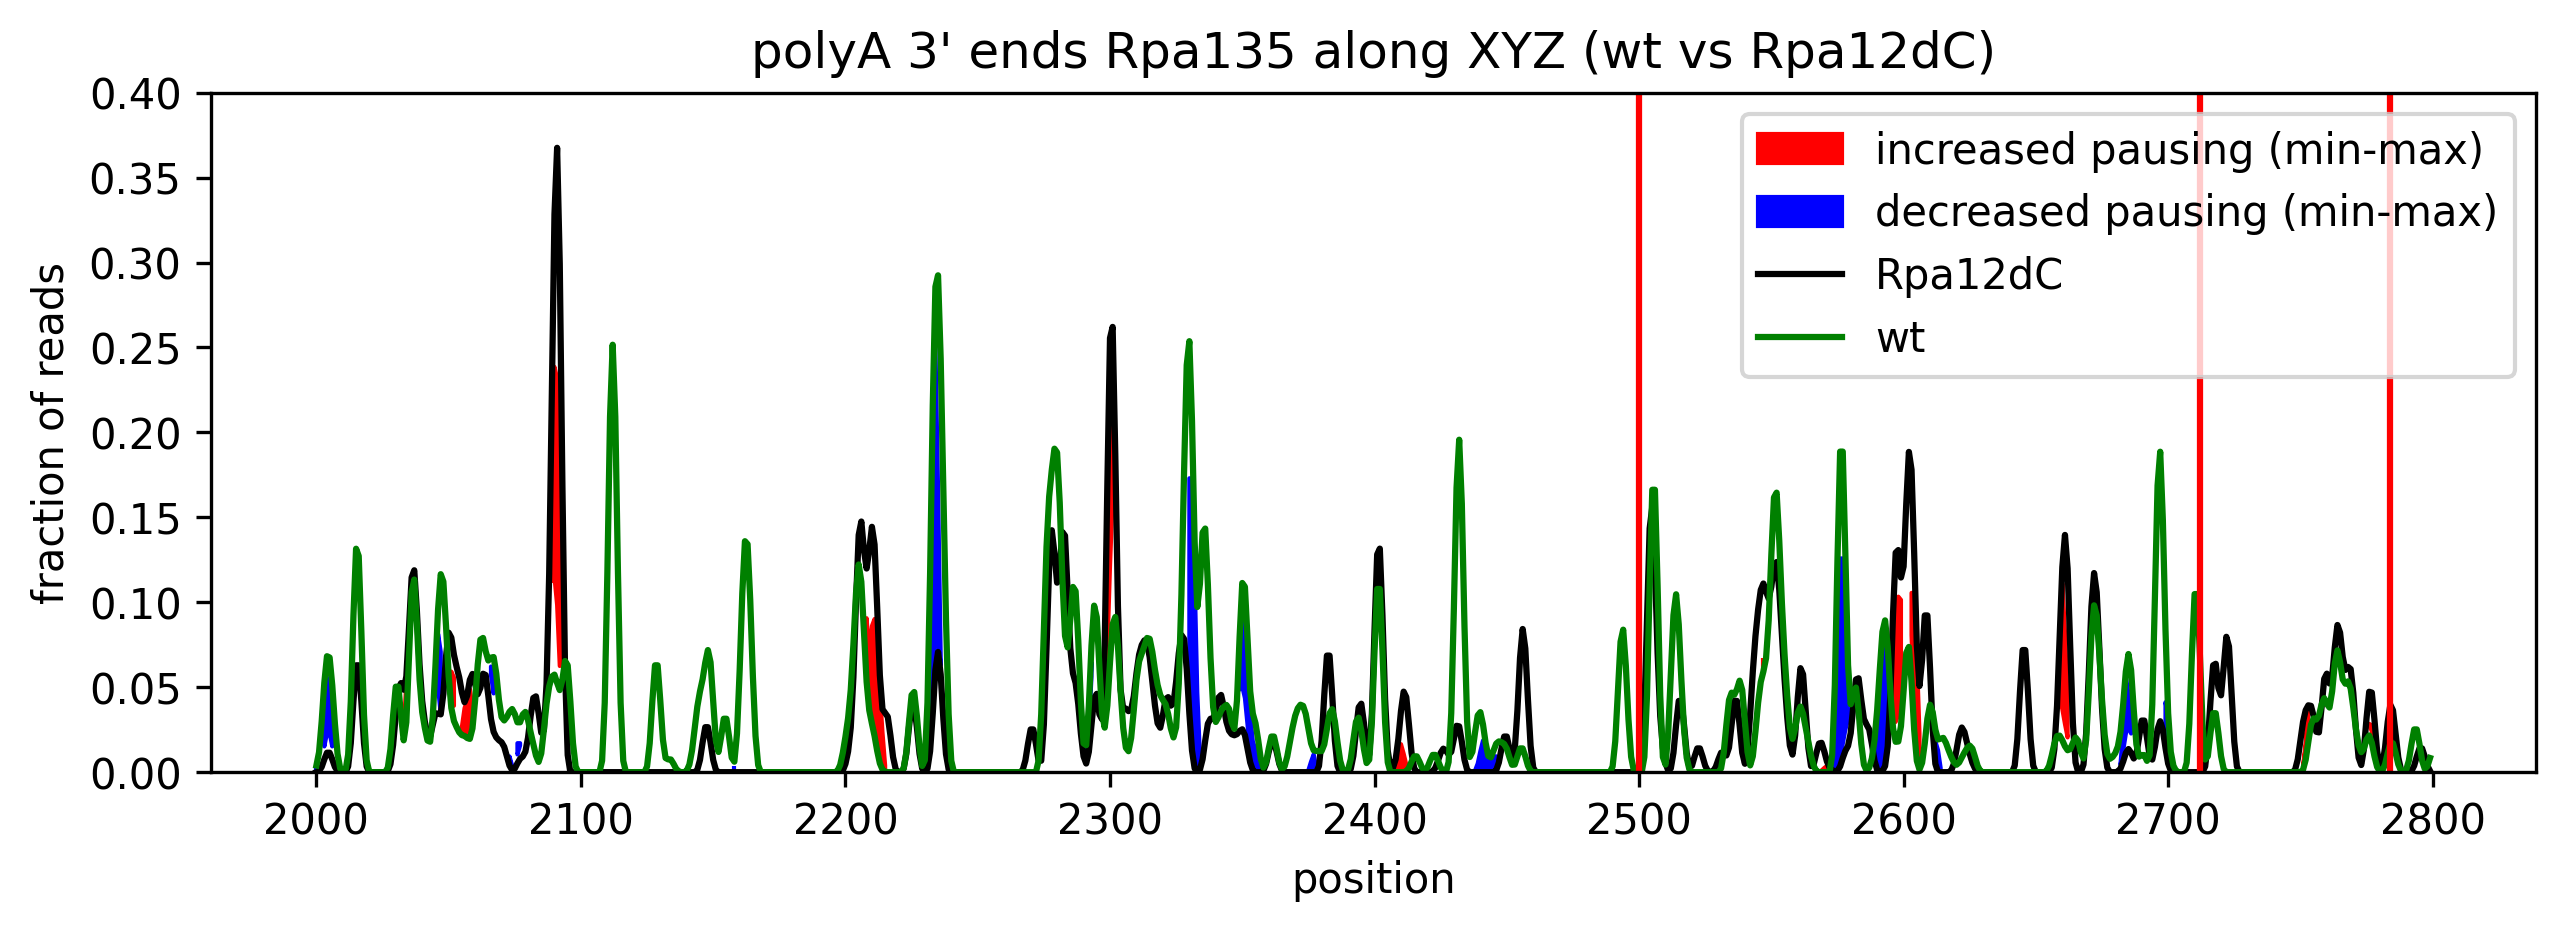

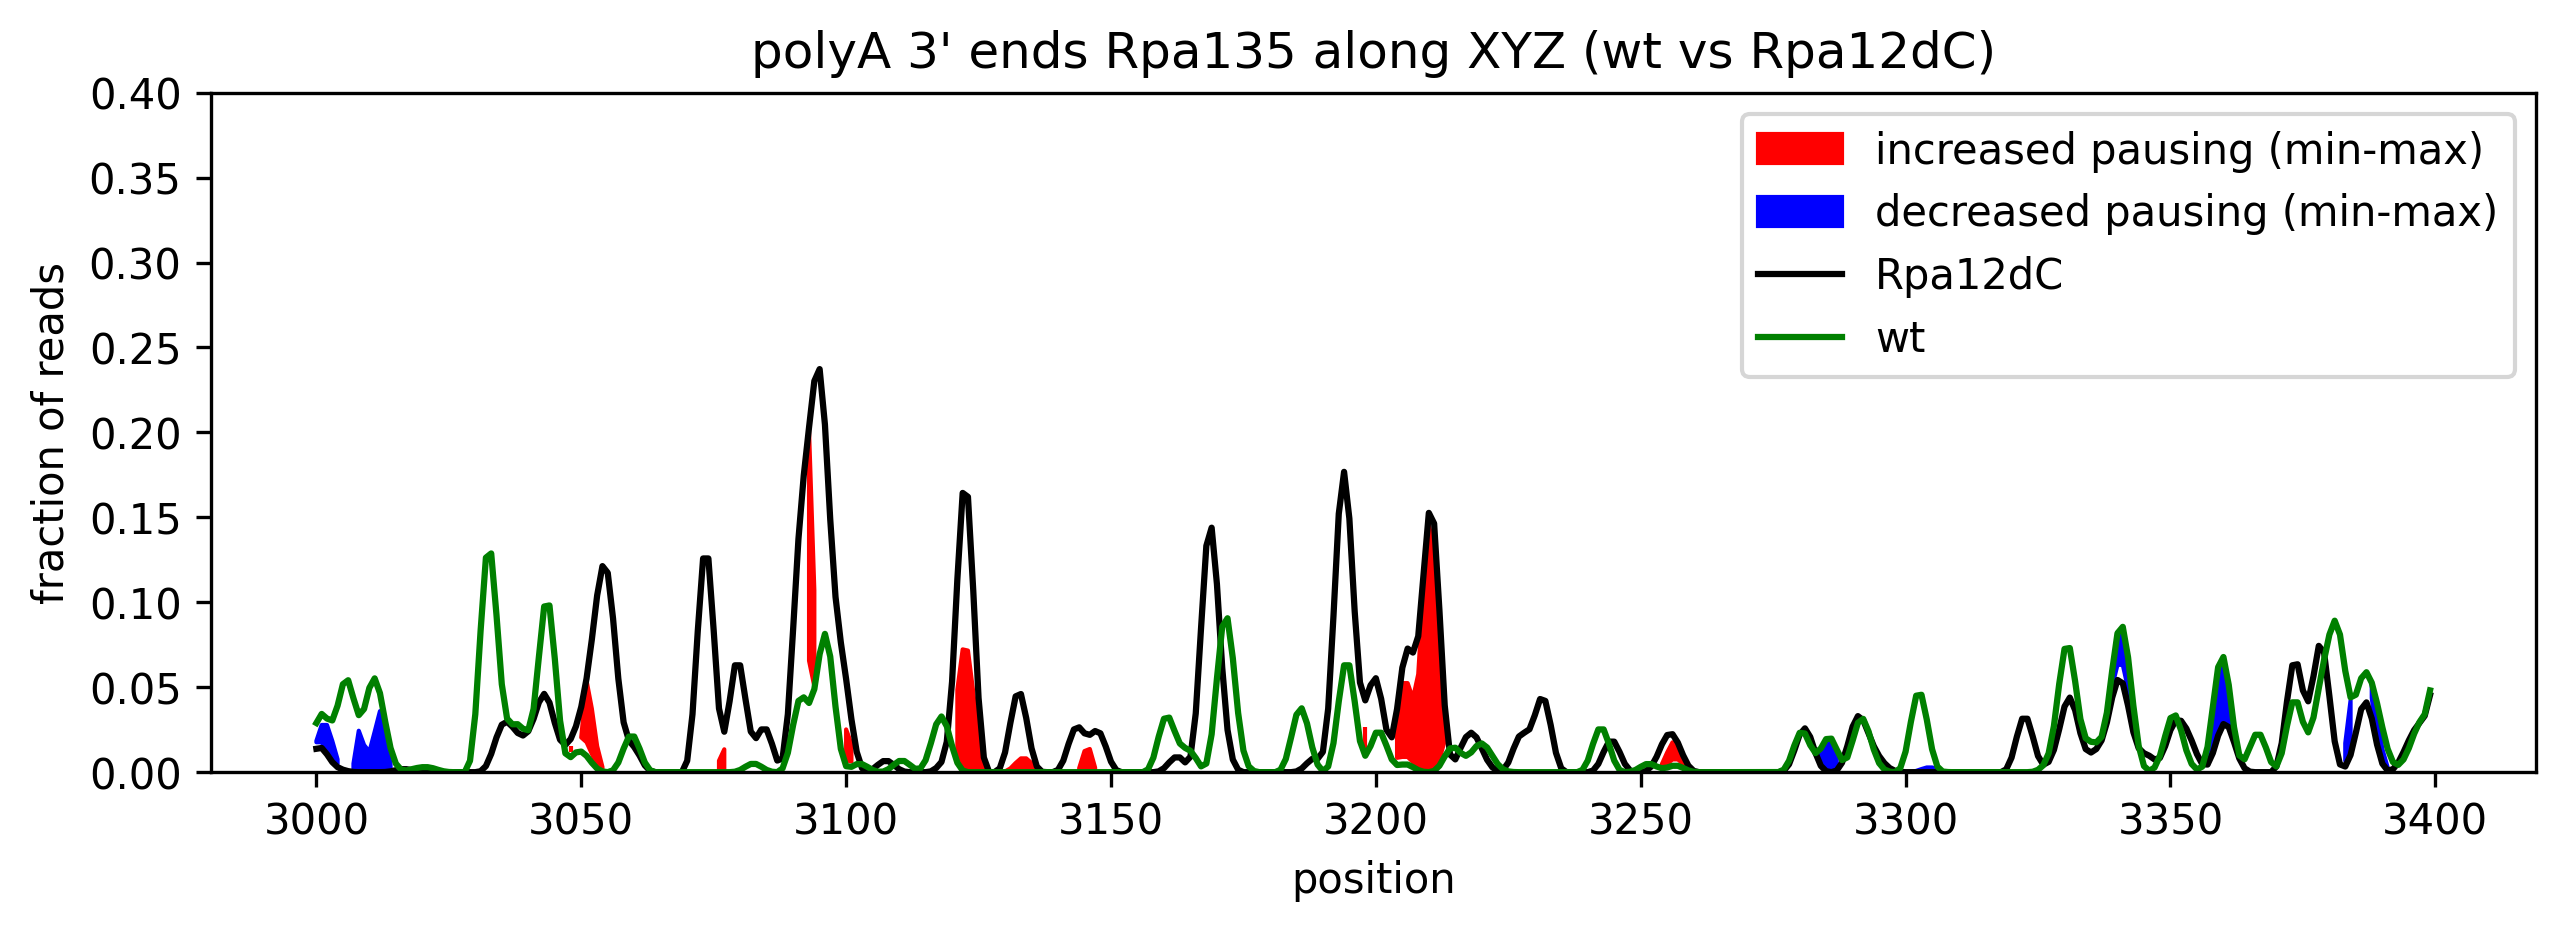

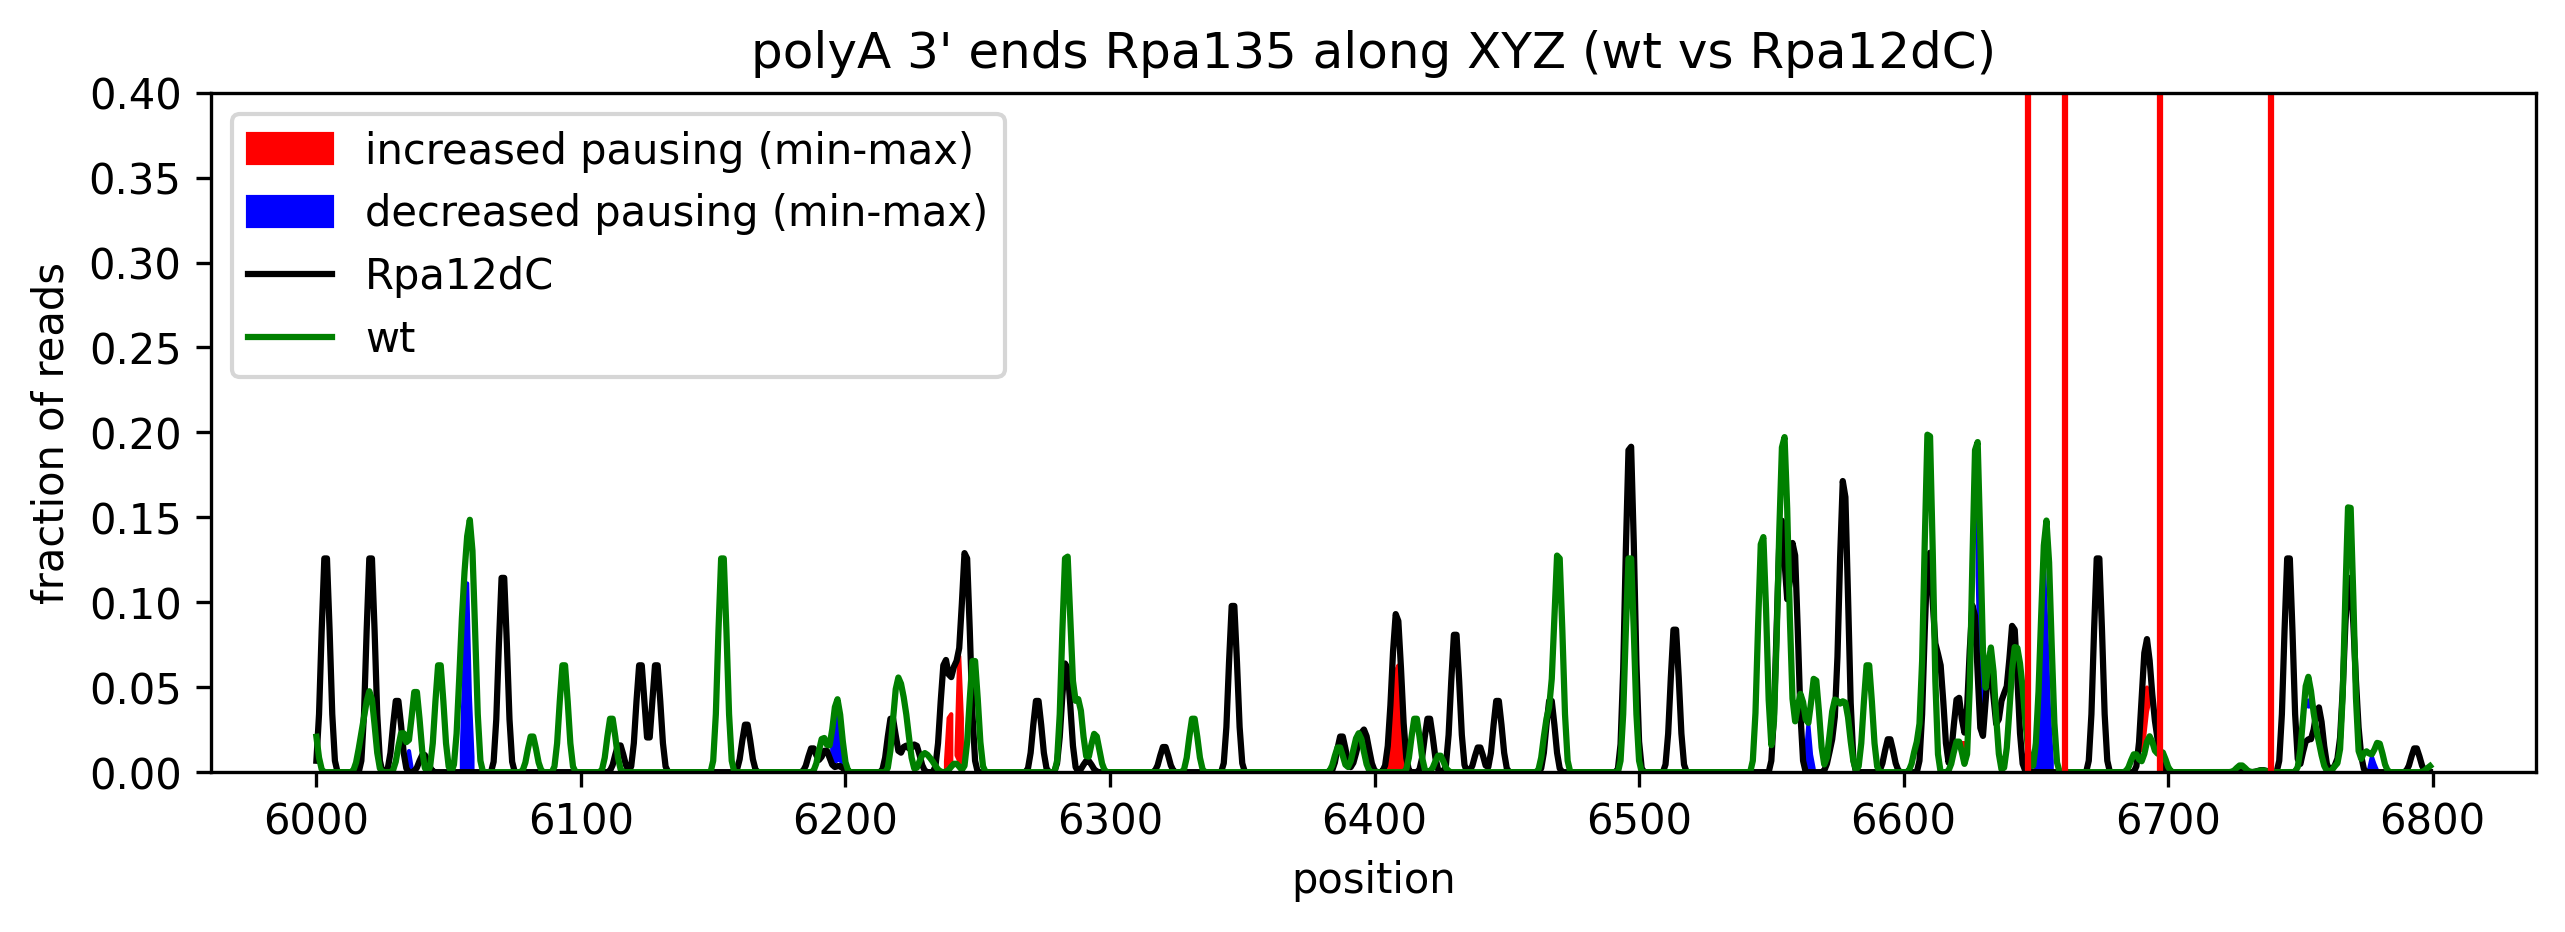

In [ ]:
# for s in [0,1,2,3,4,5,6,7]:
#     start = (s*1000)+300
#     stop = ((s+1)*1000)+300

for x,y in [(0,700),(2000,2800),(3000,3400),(6000,6800)]:
    start = x+300
    stop = y+300
    tt.plotting.plot_diff(ref=df44_polyA, dataset=df54_Rpa12dC_polyA,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="polyA 3' ends Rpa135 along XYZ (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(0,0.4),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values() if i < stop],
                           start=start, stop=stop, fname='Fig_Z_polyA_diff'+str(start)+'.png')

6.1833305139428484e-15
2.219053283000781e-06


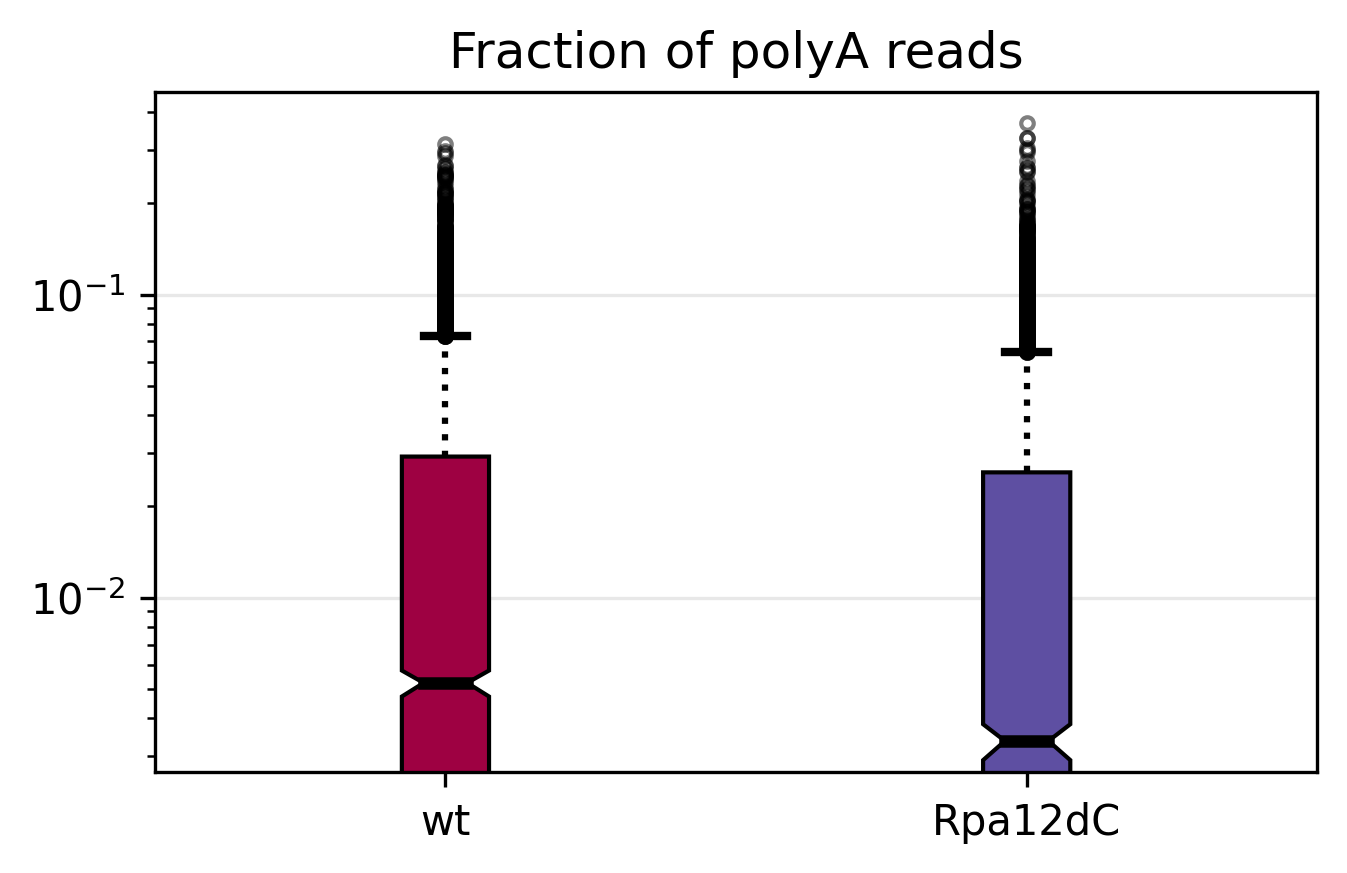

In [ ]:
wt = df44_polyA
a12dC = df54_Rpa12dC_polyA

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","Rpa12dC"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(5,3),dpi=300,fname='Fig_Z_polyA_diff_boxplot.png',
                     title="Fraction of polyA reads")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

In [ ]:
pd.DataFrame(data=data, index=labels).sum(1)

wt         170.320984
Rpa12dC    149.679494
dtype: float64

# RDN37-2

560
112
112
Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end_polyA', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end_polyA']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end_polyA', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end_polyA']
Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']


/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:38: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(bw.values(chromosome,min(coordinates)-ranges,max(coordinates)+ranges)[::-1])
/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:38: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(bw.values(chromosome,min(coordinates)-ranges,max(coordinates)+ranges)[::-1])
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = diffe

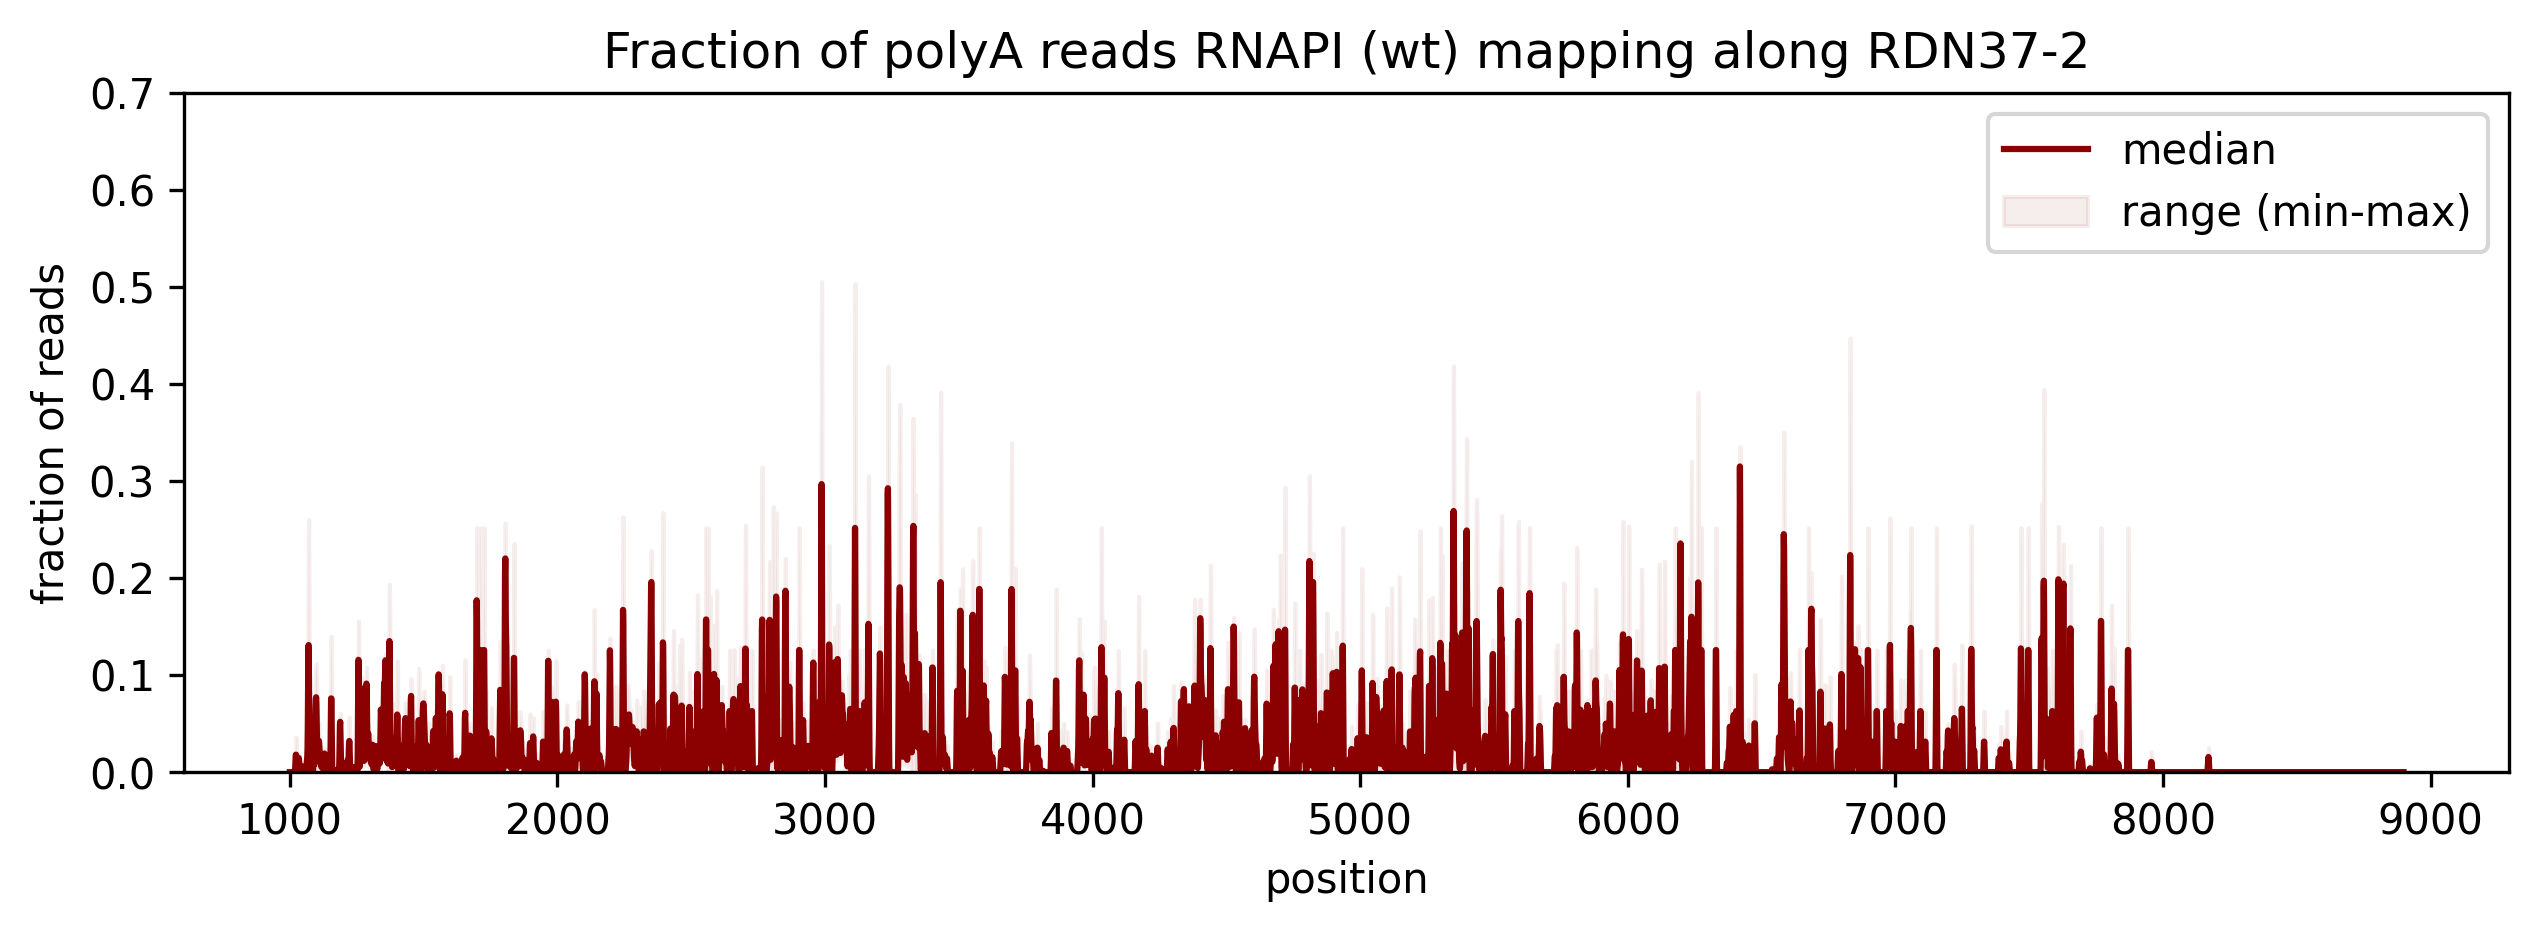

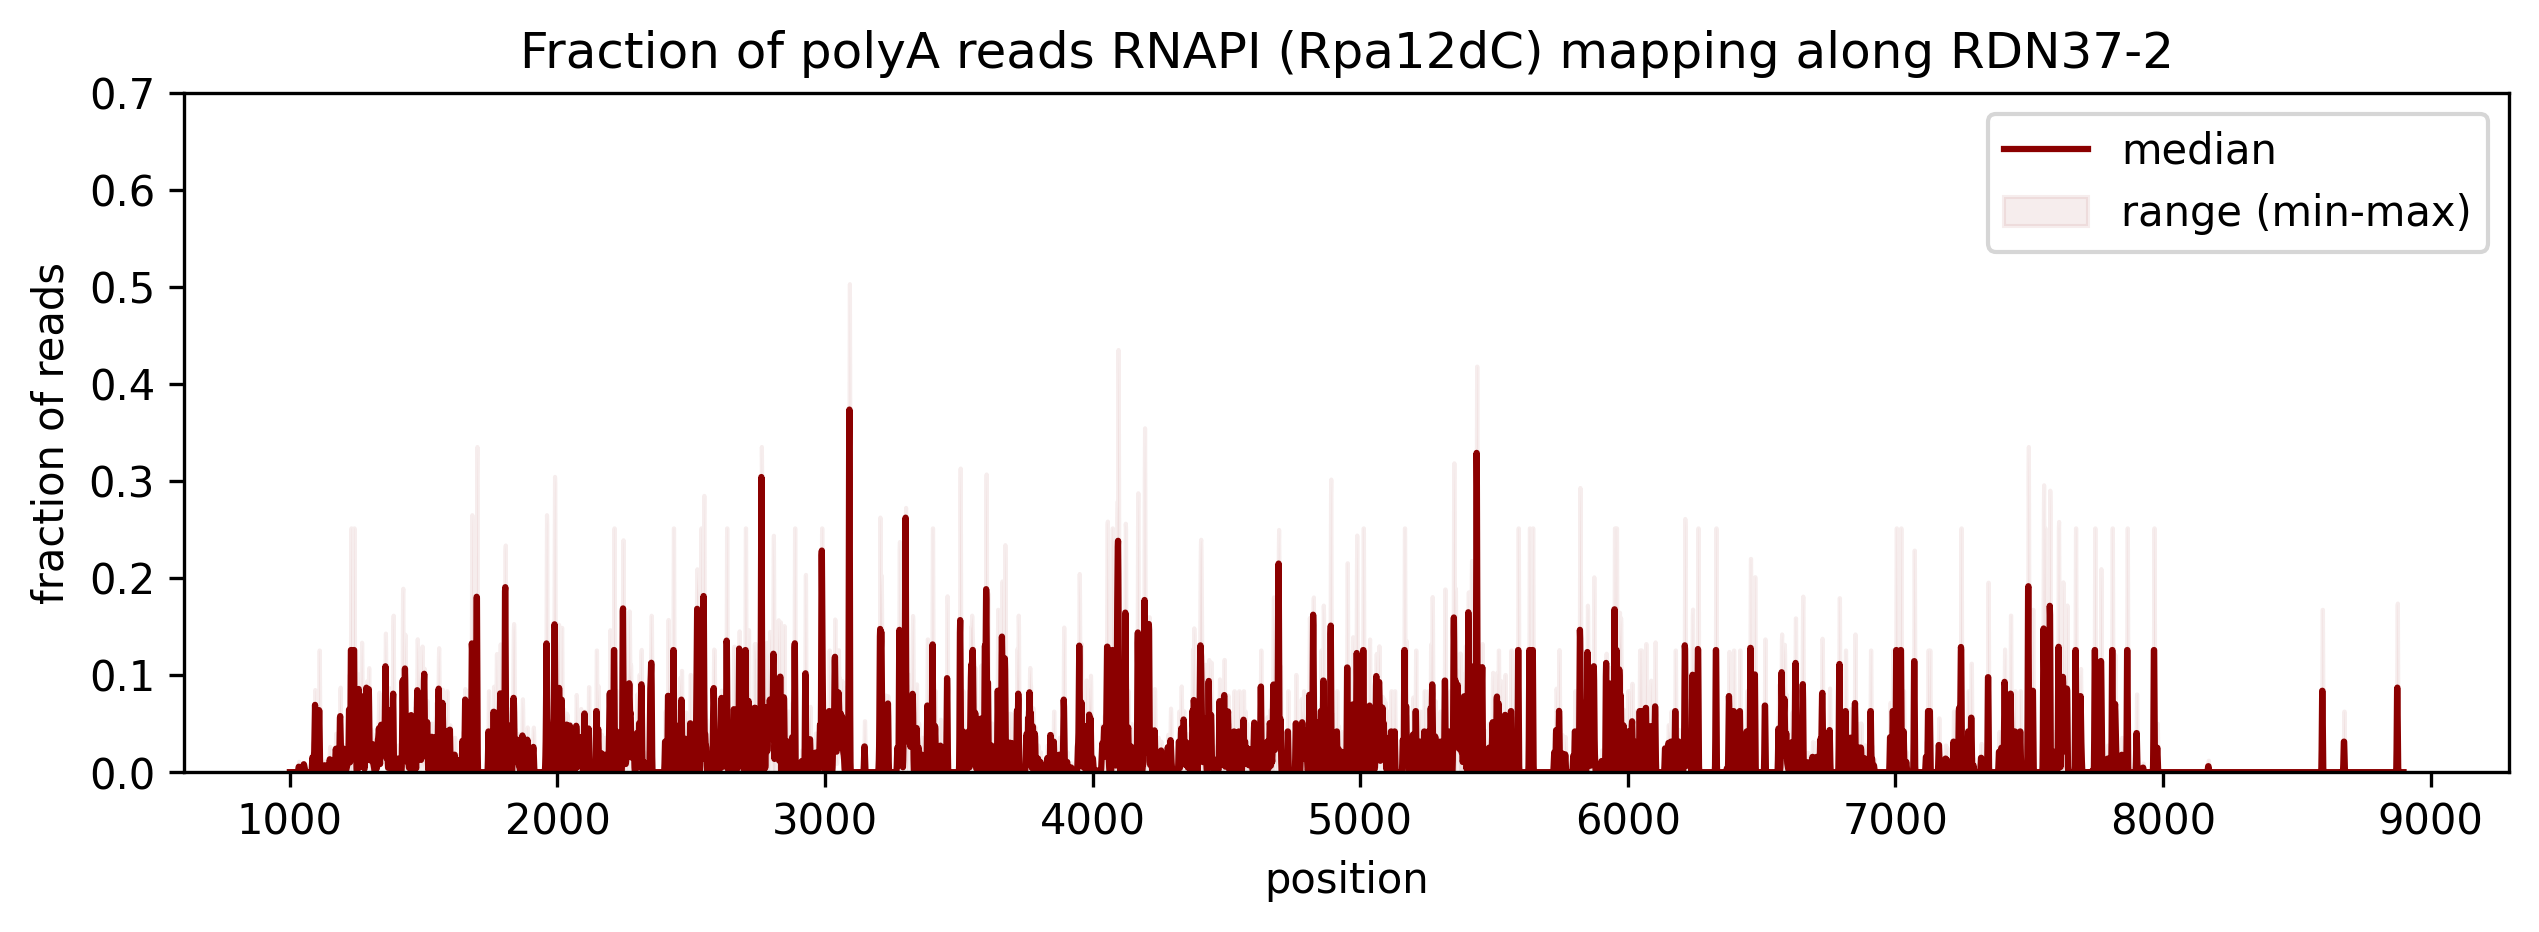

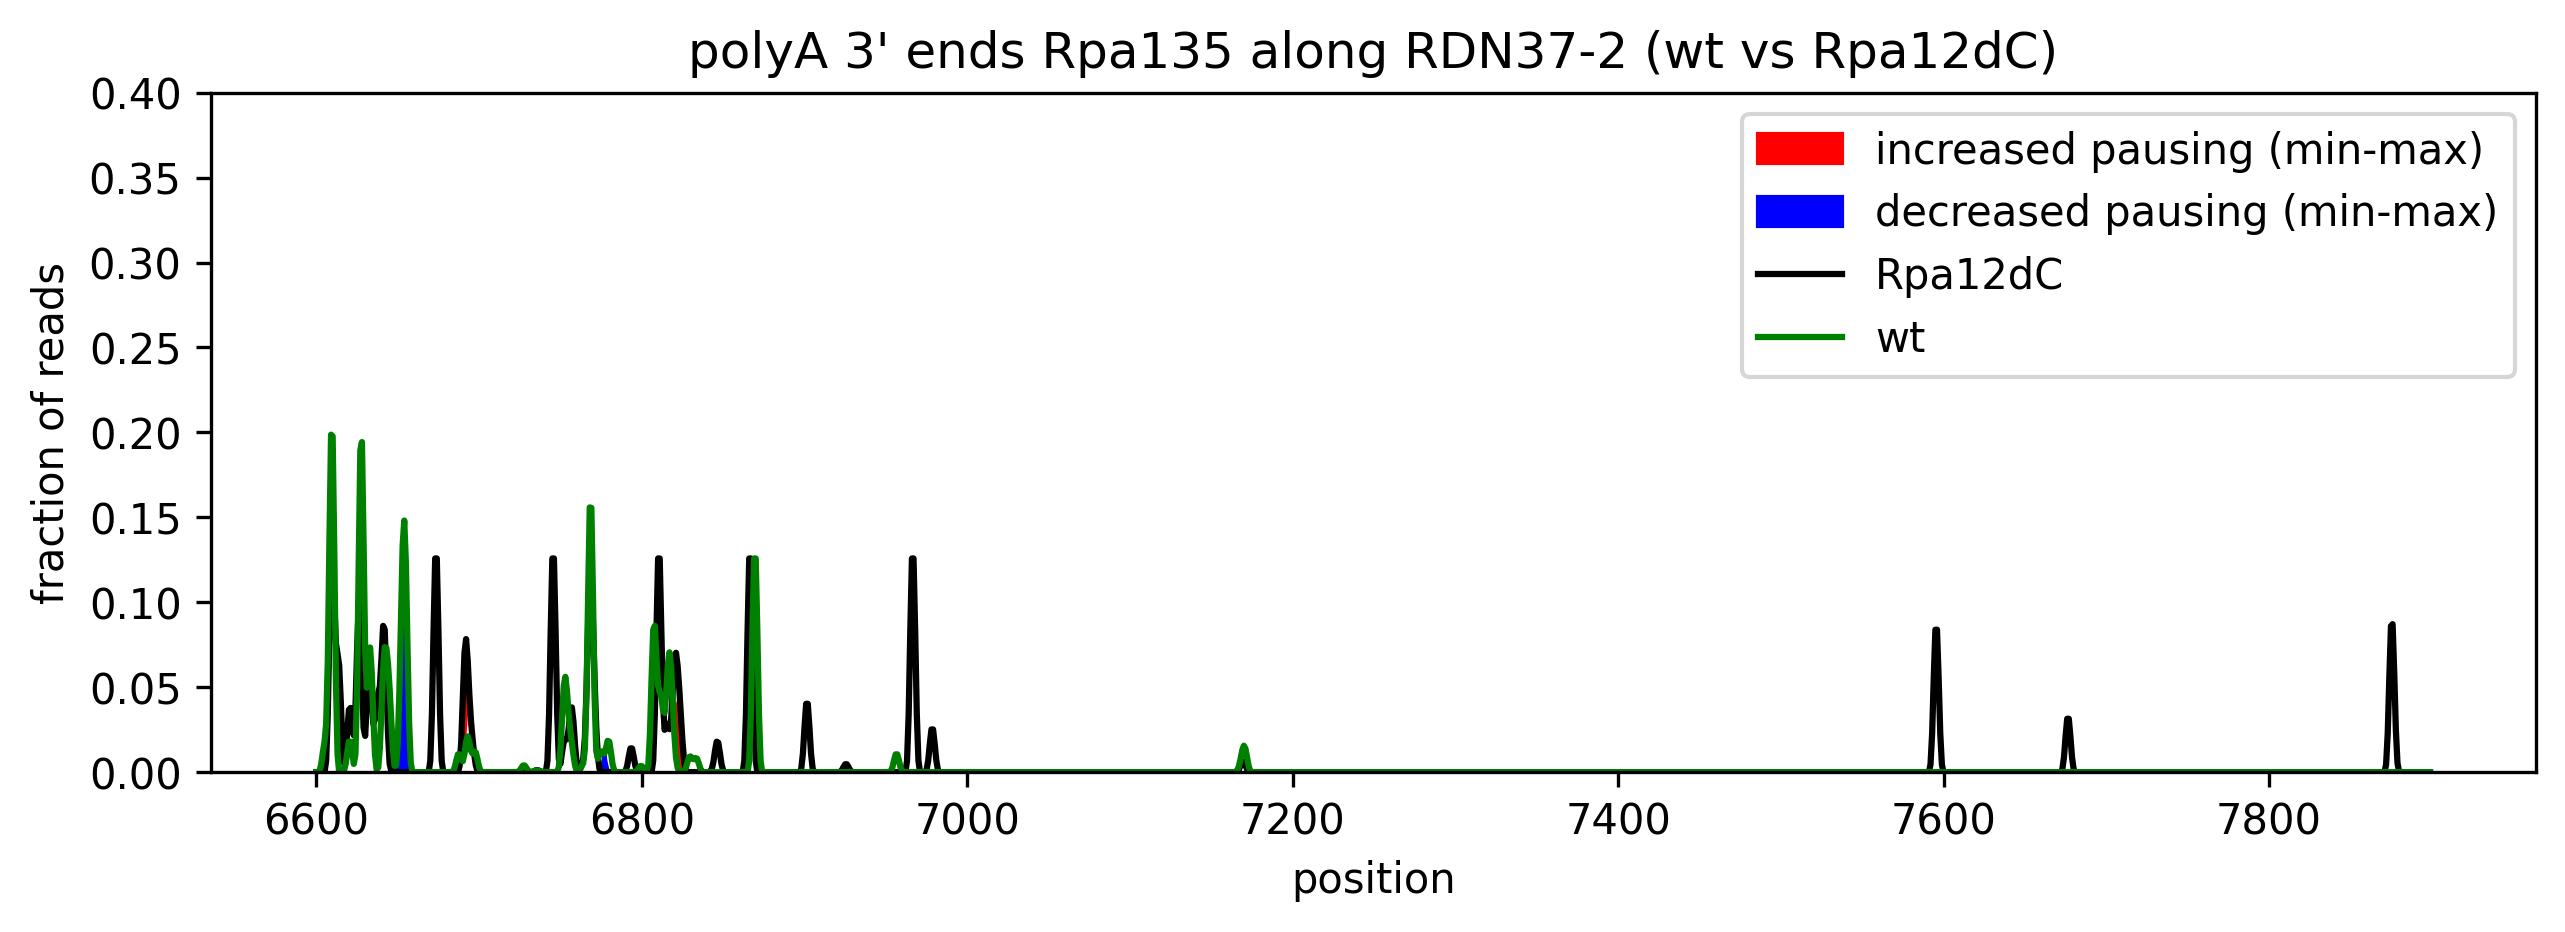

In [ ]:
flank = 2000

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]
data_files_polyA = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" in f and "bw" in f]

print(len(os.listdir(pathDir)))

print(len(data_files_3end))
print(len(data_files_polyA))

df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df03b_RDN372_datasets_polyA = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_polyA, gtf=gtf,ranges=flank)

df41_Rpa135_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA = tt.profiles.preprocess(df03b_RDN372_datasets_polyA,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df51_Rpa135_Rpa12dC_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df52_Rpa135_Rpa12dC_3end_polyA = tt.profiles.preprocess(df03b_RDN372_datasets_polyA,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA.columns = [i.replace("_polyA","") for i in df42_Rpa135_3end_polyA.columns]
df43_Rpa135_fractionPolyA = df42_Rpa135_3end_polyA / df41_Rpa135_3end

df52_Rpa135_Rpa12dC_3end_polyA.columns = [i.replace("_polyA","") for i in df52_Rpa135_Rpa12dC_3end_polyA.columns]
df53_Rpa135_Rpa12dC_fractionPolyA = df52_Rpa135_Rpa12dC_3end_polyA / df51_Rpa135_Rpa12dC_3end

df44_polyA = tt.profiles.preprocess(df43_Rpa135_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_wt'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

df54_Rpa12dC_polyA = tt.profiles.preprocess(df53_Rpa135_Rpa12dC_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_Rpa12dC'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df44_polyA, title="Fraction of polyA reads RNAPI (wt) mapping along RDN37-2",
                             dpi=300,ylim=(None,0.7), start=0+1300, stop=7900+1300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_RDN37-2_polyA_wt.png')

tt.plotting.plot_as_box_plot(df54_Rpa12dC_polyA, title="Fraction of polyA reads RNAPI (Rpa12dC) mapping along RDN37-2",
                             dpi=300,ylim=(None,0.7), start=0+1300, stop=7900+1300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_RDN37-2_polyA_a12dC.png')

start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df44_polyA, dataset=df54_Rpa12dC_polyA,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="polyA 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.4),ranges='mm',
                           h_lines=[i-1300 for i in cleavage_sites.values() if i < stop],
                           start=start, stop=stop, fname='Fig_Z_RDN37-2_readtrough_diff.png')